#Dependancies

In [1]:
pip install numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.


In [1]:
!git clone https://github.com/ShreyAgarwal11/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding.git
%cd /content/
!git clone https://github.com/facebookresearch/av_hubert.git

%cd av_hubert
!git submodule init
!git submodule update
!pip install scipy
!pip install sentencepiece
!pip install python_speech_features
!pip install scikit-video

%cd fairseq
!pip install ./

Cloning into 'Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding'...
remote: Enumerating objects: 104881, done.
remote: Counting objects: 100% (1176/1176), done.
remote: Compressing objects: 100% (1094/1094), done.
remote: Total 104881 (delta 99), reused 1136 (delta 82), pack-reused 103705
Receiving objects: 100% (104881/104881), 3.13 GiB | 33.39 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Updating files: 100% (104377/104377), done.
/content
Cloning into 'av_hubert'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 149 (delta 18), reused 22 (delta 14), pack-reused 111
Receiving objects: 100% (149/149), 4.65 MiB | 10.25 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/av_hubert
Submodule 'fairseq' (https://github.com/pytorch/fairseq) registered for path 'fairseq'
Cloning into '/content/av_hubert/fairseq'...
Submodule path 'fairseq': checked out '

In [2]:
!mkdir -p /content/data/misc/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 -O /content/data/misc/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d /content/data/misc/shape_predictor_68_face_landmarks.dat.bz2
!wget --content-disposition https://github.com/mpc001/Lipreading_using_Temporal_Convolutional_Networks/raw/master/preprocessing/20words_mean_face.npy -O /content/data/misc/20words_mean_face.npy

--2024-05-03 22:50:27--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘/content/data/misc/shape_predictor_68_face_landmarks.dat.bz2’

/content/data/misc/ 100%[===================>]  61.07M   138MB/s    in 0.4s    

2024-05-03 22:50:28 (138 MB/s) - ‘/content/data/misc/shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

--2024-05-03 22:50:37--  https://github.com/mpc001/Lipreading_using_Temporal_Convolutional_Networks/raw/master/preprocessing/20words_mean_face.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mpc001/Lipreading_using_Temporal_Convolutional_Networks/master/preprocessing/20words_mea

**Import a pre-trained model**

Fine tuned model -> Noise-Augmented AV-HuBERT Base

In [3]:
!pwd
%mkdir -p /content/data/
!wget https://dl.fbaipublicfiles.com/avhubert/model/lrs3_vox/avsr/base_noise_pt_noise_ft_433h.pt -O /content/data/finetune-model.pt

/content/av_hubert/fairseq
--2024-05-03 22:50:38--  https://dl.fbaipublicfiles.com/avhubert/model/lrs3_vox/avsr/base_noise_pt_noise_ft_433h.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.78, 13.226.210.25, 13.226.210.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1928060481 (1.8G) [binary/octet-stream]
Saving to: ‘/content/data/finetune-model.pt’

/content/data/finet 100%[===================>]   1.79G   107MB/s    in 15s     

2024-05-03 22:50:53 (121 MB/s) - ‘/content/data/finetune-model.pt’ saved [1928060481/1928060481]



#Shrey's Video frame creation

In [ ]:
import cv2
import os
import numpy as np

frame_folder = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/VidTIMIT/mwbt0/video/sa1'

output_video_path = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/output_video.mp4'

frame_rate = 25

frame_files = [f for f in os.listdir(frame_folder) if os.path.isfile(os.path.join(frame_folder, f))]

frame_files.sort()

video_resolution = (512, 384)

if video_resolution is None:
    first_frame_path = os.path.join(frame_folder, frame_files[0])
    first_frame = cv2.imread(first_frame_path)
    video_resolution = (first_frame.shape[1], first_frame.shape[0])


fourcc = cv2.VideoWriter_fourcc(*'MP4V')

out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, video_resolution)

for frame_file in frame_files:
    frame_path = os.path.join(frame_folder, frame_file)
    frame = cv2.imread(frame_path)
    if (frame.shape[1], frame.shape[0]) != video_resolution:
        frame = cv2.resize(frame, video_resolution)
    out.write(frame)

out.release()


#Frame creation and Deepfake video segregation

Video from VidTIMIT that coincide with deepfake in folder comman_data

In [ ]:
import cv2
import os
import shutil
import numpy as np

%mkdir -p /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/
%mkdir -p /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/

In [ ]:
def create_output_video(frame_folder, frame_rate=25, video_resolution=(512, 384)):
    frame_files = [f for f in os.listdir(frame_folder) if os.path.isfile(os.path.join(frame_folder, f))]
    frame_files.sort()

    if video_resolution is None:
        first_frame_path = os.path.join(frame_folder, frame_files[0])
        first_frame = cv2.imread(first_frame_path)
        video_resolution = (first_frame.shape[1], first_frame.shape[0])

    fourcc = cv2.VideoWriter_fourcc(*'MP4V')

    # Split the input path and extract the necessary components
    parts = frame_folder.split('/')
    speaker = parts[-3]  # Get the speaker ID (e.g., fadg0)
    video_name = parts[-1]  # Get the video name (e.g., sa1)

    # Define the output path
    output_video_path = os.path.join('/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/', f"{video_name}-video-{speaker}.mp4")

    out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, video_resolution)

    for frame_file in frame_files:
        frame_path = os.path.join(frame_folder, frame_file)
        frame = cv2.imread(frame_path)
        if (frame.shape[1], frame.shape[0]) != video_resolution:
            frame = cv2.resize(frame, video_resolution)
        out.write(frame)

    out.release()

In [ ]:
folder1 = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/DeepfakeTIMIT/higher_quality/'
folder2 = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/VidTIMIT/'
output_vdtimit = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/'


# Get list of files in each folder
files1 = os.listdir(folder1)
files2 = os.listdir(folder2)

# Extract filenames without extensions
file_names1 = [os.path.splitext(file)[0] for file in files1]
file_names2 = [os.path.splitext(file)[0] for file in files2]

# Find common filenames
common_file_names = set(file_names1).intersection(file_names2)

# Process files with common names
for common_name in common_file_names:

    check_folder = os.path.join(folder2, common_name)

    file_path2_audio = os.path.join(check_folder + '/audio')
    try:
        files2_in_audio = os.listdir(file_path2_audio)
        # print(files2_in_audio)
    except FileNotFoundError:
        # If directory does not exist, delete it and continue to the next directory
        shutil.rmtree(check_folder)
        print("Removed dir :",  check_folder)
        continue

    file_path1 = os.path.join(folder1, common_name)
    file_path2 = os.path.join(folder2, common_name + '/video')
    files1_in = os.listdir(file_path1)
    files2_in = os.listdir(file_path2)

    # Extract filenames without extensions
    file_names1_in = [file.split('-')[0] for file in files1_in if 'video' in file]
    # print(file_names1_in)
    file_names2_in = [file.split('-')[0] for file in files2_in]
    # print(file_names2_in)
    files2_audio_in = [file.split('.')[0] for file in files2_in_audio]
    # print(files2_audio_in)

    # # Find common filenames
    common_file_names_in = set(file_names1_in).intersection(file_names2_in)
    # print(common_file_names_in)
    common_audio_file = set(common_file_names_in).intersection(files2_audio_in)
    # print("Printed Audio -",common_audio_file)

    for filename in common_audio_file:
        # Rearrange the parts to get the desired filename
        new_filename_audio = filename + '-audio-' + common_name + '.wav'
        # print(new_filename_audio)
        file_path = os.path.join(output_vdtimit, new_filename_audio)
        # print("New file path -",file_path)
        shift_path = os.path.join(check_folder + '/audio/' + filename + '.wav')
        if os.path.exists(shift_path):
                # print("Shift_path -",shift_path)
                shutil.copy(shift_path, file_path)
                # print(f"File copied successfully! '{file_path}'")
        else:
          print("Does not exits")

    for common_name_in in common_file_names_in:

      file_path1_in1 = os.path.join(file_path1, common_name_in)
      file_path2_in2 = os.path.join(file_path2, common_name_in)

      # Check if both files exist before proceeding

      if os.path.exists(file_path2_in2):
          create_output_video(file_path2_in2)
          # Do something with the files, such as processing or using them in your code
          # print(f"Files with name '{common_name_in}' exist in both folders:")
          # print(f"File path in folder1: {file_path1_in1}")
          # print(f"File path in folder2: {file_path2_in2}")
          # Your code to process or use the files goes here
      else:
          print(f"Files with name '{common_name_in}' do not exist in both folders.")
          print(f"File path in folder1: {file_path1_in1}")
          print(f"File path in folder2: {file_path2_in2}")

Removed dir : /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/VidTIMIT/fcmh0
Removed dir : /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/VidTIMIT/mdld0
Removed dir : /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/VidTIMIT/mrgg0


Video from DeepfakeTIMIT that coincide with VidTIMIT in folder comman_data_deep

In [ ]:
frame_folder = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/DeepfakeTIMIT/higher_quality/'
output_video_path = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/'

# Get list of directories in the frame_folder
directories = [os.path.join(frame_folder, name) for name in os.listdir(frame_folder) if os.path.isdir(os.path.join(frame_folder, name))]

# Process files in each directory
for directory in directories:
    # Get list of files in each directory
    files_in_directory = os.listdir(directory)
    # print("directory -", directory)
    intial = directory.split('/')
    speaker = intial[-1]
    # print(intial[-1])

    # Process each file
    for filename in files_in_directory:

      if filename.startswith('.'):
          continue

      if 'video' not in filename:
        # print(filename)
        file_path_audio = os.path.join(directory, filename)
        # print(file_path)
        name, ext = os.path.splitext(filename)
        # print(name)

        # Rearrange the parts to get the desired filename
        new_filename_audio = name + '-audio-' + speaker + ext
        # print(new_filename_audio)

        # Construct the new path
        new_path_audio = os.path.join(output_video_path, new_filename_audio)
        # print(new_path_audio)

        # Copy the file to the new path
        shutil.copy(file_path_audio, new_path_audio)

        # print(f"File copied successfully! '{new_path_audio}'")

      if 'video' in filename:
        # print(filename)
        file_path = os.path.join(directory, filename)
        # print(file_path)
        name, ext = os.path.splitext(filename)
        # print(name)

        # Split the name into parts separated by '-'
        parts = name.split('-')
        # print("Parts -",parts)

        # Rearrange the parts to get the desired filename
        new_filename = parts[0] + '-video-' + speaker + ext
        # print(new_filename)

        # Construct the new path
        new_path = os.path.join(output_video_path, new_filename)
        print(new_path)

        # Copy the file to the new path
        shutil.copy(file_path, new_path)

        # print(f"File copied successfully! '{new_path}'")

/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si913-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sx193-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si1543-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sx103-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sa1-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sa2-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si2173-video-mdld0.avi
/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/sx373-video-mdld0.avi
/content/Privacy-Preserving-Representation

#AVHubert functions

In [4]:
%cd /content/av_hubert/avhubert
import cv2
import tempfile
import torch
import utils as avhubert_utils
from argparse import Namespace
import fairseq
from fairseq import checkpoint_utils, options, tasks, utils
from IPython.display import HTML
from python_speech_features import logfbank
from scipy.io import wavfile

/content/av_hubert/avhubert


**Feature Extraction using AV-HUBERT**

In [5]:
def stacker(feats, stack_order):
            """
            Concatenating consecutive audio frames
            Args:
            feats - numpy.ndarray of shape [T, F]
            stack_order - int (number of neighboring frames to concatenate
            Returns:
            feats - numpy.ndarray of shape [T', F']
            """
            feat_dim = feats.shape[1]
            if len(feats) % stack_order != 0:
                res = stack_order - len(feats) % stack_order
                res = np.zeros([res, feat_dim]).astype(feats.dtype)
                feats = np.concatenate([feats, res], axis=0)
            feats = feats.reshape((-1, stack_order, feat_dim)).reshape(-1, stack_order*feat_dim)
            return feats

In [6]:
def extract_visual_feature(video_path, audio_path, ckpt_path, user_dir, is_finetune_ckpt=False):
  utils.import_user_module(Namespace(user_dir=user_dir))
  models, saved_cfg, task = checkpoint_utils.load_model_ensemble_and_task([ckpt_path])
  transform = avhubert_utils.Compose([
      avhubert_utils.Normalize(0.0, 255.0),
      avhubert_utils.CenterCrop((task.cfg.image_crop_size, task.cfg.image_crop_size)),
      avhubert_utils.Normalize(task.cfg.image_mean, task.cfg.image_std)])
  frames = avhubert_utils.load_video(video_path)
  print(f"Load video {video_path}: shape {frames.shape}")
  sample_rate, wav_data = wavfile.read(audio_path)
  audio_features = logfbank(wav_data, sample_rate).astype(np.float32)
  audio_features = stacker(audio_features, 4)
  print(f"Load audio {audio_path}: shape {audio_features.shape}")
  audio_features = torch.FloatTensor(audio_features).unsqueeze(dim=0).permute(0, 2, 1).cuda()
  frames = torch.FloatTensor(frames).unsqueeze(dim=0).unsqueeze(dim=0).cuda()
  if audio_features.shape[2] < frames.shape[2]:
    # Pad features_audio
    padding_size = frames.shape[2] - audio_features.shape[2]
    padding = torch.zeros((audio_features.shape[0], audio_features.shape[1], padding_size)).cuda()
    audio_features = torch.cat([audio_features, padding], dim=2)
  print(f"Load video {video_path}: shape {frames.shape}")
  print(f"Load audio {audio_path}: shape {audio_features.shape}")
  model = models[0]
  if hasattr(models[0], 'decoder'):
    print(f"Checkpoint: fine-tuned")
    model = models[0].encoder.w2v_model
  else:
    print(f"Checkpoint: pre-trained w/o fine-tuning")
  model.cuda()
  model.eval()
  with torch.no_grad():
    # Specify output_layer if you want to extract feature of an intermediate layer
    layer_features = []
    for i in range(12):
      feature, _ = model.extract_finetune(source={'video': frames, 'audio': audio_features}, padding_mask=None, output_layer=(i+1))
      layer_features.append(feature)
    feature, _ = model.extract_finetune(source={'video': frames, 'audio': audio_features}, padding_mask=None, output_layer=None)
    feature = feature.squeeze(dim=0)
  print(f"AvHuBert Feature shape: {feature.shape}")
  return layer_features, feature


In [ ]:
folder_path_real = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/'
folder_path_deep = '/content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/'

# Initialize an empty list to store pairs of file paths
real_file_pairs = []
deep_file_pairs = []

# Get the list of files in the real folder
files_real = os.listdir(folder_path_real)

# Get the list of files in the deep folder
files_deep = os.listdir(folder_path_deep)

# Iterate over each file in the real folder
for file_real in files_real:
    # Split the filename and extension
    name, ext_real = os.path.splitext(file_real)
    # print(file_real)

    # Check if the file is an audio file
    if ext_real == '.wav':
        # Construct the expected video filename
        audio_filename_real = name
        video_filename_real = name.replace('-audio-', '-video-')
        # print(video_filename)

        # Check if the video file exists in the deep folder
        for file_deep in files_deep:
            name_deep, ext_deep = os.path.splitext(file_deep)
            # print(name_deep)
                # Check if the file is an audio file
            if ext_deep == '.wav':
                # Construct the expected video filename
                audio_filename_deep = name_deep
                video_filename_deep = name_deep.replace('-audio-', '-video-')
                if video_filename_deep == video_filename_real:
                    # Construct the paths for the audio and video files in both folders
                    audio_path_real = os.path.join(folder_path_real, audio_filename_real + ext_deep)
                    # print(audio_path_real)
                    video_path_real = os.path.join(folder_path_real, video_filename_real + '.mp4')
                    audio_path_deep = os.path.join(folder_path_deep, audio_filename_deep + ext_deep)
                    # print(audio_path_deep)
                    video_path_deep = os.path.join(folder_path_deep, video_filename_real + '.avi')

                    # Check if both audio and video files exist in both folders
                    if os.path.exists(audio_path_real) and os.path.exists(video_path_real) and \
                      os.path.exists(audio_path_deep) and os.path.exists(video_path_deep):
                        # Add the pair of paths to the list
                        real_file_pairs.append((audio_path_real, video_path_real))
                        deep_file_pairs.append((audio_path_deep, video_path_deep))

# Print the number of file pairs found
print(len(os.listdir(folder_path_real)))
print(len(os.listdir(folder_path_deep)))
print(len(real_file_pairs))
print(len(deep_file_pairs))


580
640
290
290


In [ ]:
ckpt_path = "/content/data/finetune-model.pt"
user_dir = "/content/av_hubert/avhubert"

feature_real = {}
feature_deep = {}

# Counter variables to keep track of iterations
count_real = 0
count_deep = 0

# Loop over real_file_pairs
for pair in real_file_pairs:
    # Increment the counter
    count_real += 1

    audio_path = pair[0]
    mouth_roi_path = pair[1]
    name_r, ext_r = os.path.splitext(pair[0])
    index_data_r = name_r.split('/')[-1].replace('-audio-', '')

    # Check if the index is not already in feature_real
    if index_data_r not in feature_real:
        layer_features, feature_real[index_data_r] = extract_visual_feature(mouth_roi_path, audio_path, ckpt_path, user_dir)

    # # Break after every 5 iterations
    if count_real == 50:
        break

# Loop over deep_file_pairs
for pair in deep_file_pairs:
    # Increment the counter
    count_deep += 1

    audio_path = pair[0]
    mouth_roi_path = pair[1]
    name_d, ext_d = os.path.splitext(pair[0])
    index_data_d = name_d.split('/')[-1].replace('-audio-', '')

    # Check if the index is not already in feature_deep
    if index_data_d not in feature_deep:
        layer_features, feature_deep[index_data_d] = extract_visual_feature(mouth_roi_path, audio_path, ckpt_path, user_dir)

    # Break after every 5 iterations
    if count_deep == 50:
        break

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1364-video-mrjo0.mp4: shape (138, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1364-audio-mrjo0.wav: shape (138, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1364-video-mrjo0.mp4: shape torch.Size([1, 1, 138, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1364-audio-mrjo0.wav: shape torch.Size([1, 104, 138])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([138, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si844-video-fdac1.mp4: shape (137, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si844-audio-fdac1.wav: shape (137, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si844-video-fdac1.mp4: shape torch.Size([1, 1, 137, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si844-audio-fdac1.wav: shape torch.Size([1, 104, 137])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([137, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1360-video-fram1.mp4: shape (114, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1360-audio-fram1.wav: shape (114, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1360-video-fram1.mp4: shape torch.Size([1, 1, 114, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1360-audio-fram1.wav: shape torch.Size([1, 104, 114])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([114, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-video-fkms0.mp4: shape (102, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-audio-fkms0.wav: shape (102, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-video-fkms0.mp4: shape torch.Size([1, 1, 102, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx320-audio-fkms0.wav: shape torch.Size([1, 104, 102])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([102, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-video-msjs1.mp4: shape (110, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-audio-msjs1.wav: shape (110, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-video-msjs1.mp4: shape torch.Size([1, 1, 110, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx189-audio-msjs1.wav: shape torch.Size([1, 104, 110])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([110, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-video-fjre0.mp4: shape (82, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-audio-fjre0.wav: shape (82, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-video-fjre0.mp4: shape torch.Size([1, 1, 82, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx216-audio-fjre0.wav: shape torch.Size([1, 104, 82])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([82, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mwbt0.mp4: shape (104, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mwbt0.wav: shape (104, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mwbt0.mp4: shape torch.Size([1, 1, 104, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mwbt0.wav: shape torch.Size([1, 104, 104])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([104, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjas0.mp4: shape (83, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjas0.wav: shape (83, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjas0.mp4: shape torch.Size([1, 1, 83, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjas0.wav: shape torch.Size([1, 104, 83])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([83, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1265-video-fjwb0.mp4: shape (123, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1265-audio-fjwb0.wav: shape (123, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1265-video-fjwb0.mp4: shape torch.Size([1, 1, 123, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1265-audio-fjwb0.wav: shape torch.Size([1, 104, 123])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([123, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx289-video-mpgl0.mp4: shape (98, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx289-audio-mpgl0.wav: shape (98, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx289-video-mpgl0.mp4: shape torch.Size([1, 1, 98, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx289-audio-mpgl0.wav: shape torch.Size([1, 104, 98])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([98, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1099-video-mpgl0.mp4: shape (72, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1099-audio-mpgl0.wav: shape (72, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1099-video-mpgl0.mp4: shape torch.Size([1, 1, 72, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1099-audio-mpgl0.wav: shape torch.Size([1, 104, 72])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([72, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fedw0.mp4: shape (92, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fedw0.wav: shape (92, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fedw0.mp4: shape torch.Size([1, 1, 92, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fedw0.wav: shape torch.Size([1, 104, 92])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([92, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx306-video-felc0.mp4: shape (80, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx306-audio-felc0.wav: shape (80, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx306-video-felc0.mp4: shape torch.Size([1, 1, 80, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx306-audio-felc0.wav: shape torch.Size([1, 104, 80])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([80, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx223-video-faks0.mp4: shape (89, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx223-audio-faks0.wav: shape (89, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx223-video-faks0.mp4: shape torch.Size([1, 1, 89, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx223-audio-faks0.wav: shape torch.Size([1, 104, 89])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([89, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjwb0.mp4: shape (99, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjwb0.wav: shape (99, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-fjwb0.mp4: shape torch.Size([1, 1, 99, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-fjwb0.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx200-video-mjsw0.mp4: shape (90, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx200-audio-mjsw0.wav: shape (90, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx200-video-mjsw0.mp4: shape torch.Size([1, 1, 90, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx200-audio-mjsw0.wav: shape torch.Size([1, 104, 90])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([90, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx23-video-mwbt0.mp4: shape (101, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx23-audio-mwbt0.wav: shape (101, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx23-video-mwbt0.mp4: shape torch.Size([1, 1, 101, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx23-audio-mwbt0.wav: shape torch.Size([1, 104, 101])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([101, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mstk0.mp4: shape (87, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mstk0.wav: shape (87, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-mstk0.mp4: shape torch.Size([1, 1, 87, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-mstk0.wav: shape torch.Size([1, 104, 87])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([87, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1116-video-fjre0.mp4: shape (85, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1116-audio-fjre0.wav: shape (85, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1116-video-fjre0.mp4: shape torch.Size([1, 1, 85, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1116-audio-fjre0.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx9-video-mgwt0.mp4: shape (80, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx9-audio-mgwt0.wav: shape (80, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx9-video-mgwt0.mp4: shape torch.Size([1, 1, 80, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx9-audio-mgwt0.wav: shape torch.Size([1, 104, 80])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([80, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx104-video-mrjo0.mp4: shape (86, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx104-audio-mrjo0.wav: shape (86, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx104-video-mrjo0.mp4: shape torch.Size([1, 1, 86, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx104-audio-mrjo0.wav: shape torch.Size([1, 104, 86])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([86, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2169-video-mgwt0.mp4: shape (136, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2169-audio-mgwt0.wav: shape (136, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2169-video-mgwt0.mp4: shape torch.Size([1, 1, 136, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2169-audio-mgwt0.wav: shape torch.Size([1, 104, 136])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([136, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1553-video-mwbt0.mp4: shape (150, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1553-audio-mwbt0.wav: shape (150, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1553-video-mwbt0.mp4: shape torch.Size([1, 1, 150, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1553-audio-mwbt0.wav: shape torch.Size([1, 104, 150])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([150, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-msjs1.mp4: shape (121, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-msjs1.wav: shape (121, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-msjs1.mp4: shape torch.Size([1, 1, 121, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-msjs1.wav: shape torch.Size([1, 104, 121])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([121, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx230-video-fkms0.mp4: shape (115, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx230-audio-fkms0.wav: shape (115, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx230-video-fkms0.mp4: shape torch.Size([1, 1, 115, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx230-audio-fkms0.wav: shape torch.Size([1, 104, 115])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([115, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1474-video-fdac1.mp4: shape (88, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1474-audio-fdac1.wav: shape (88, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1474-video-fdac1.mp4: shape torch.Size([1, 1, 88, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1474-audio-fdac1.wav: shape torch.Size([1, 104, 88])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([88, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mgwt0.mp4: shape (125, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mgwt0.wav: shape (125, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mgwt0.mp4: shape torch.Size([1, 1, 125, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mgwt0.wav: shape torch.Size([1, 104, 125])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([125, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-video-fkms0.mp4: shape (109, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-audio-fkms0.wav: shape (109, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-video-fkms0.mp4: shape torch.Size([1, 1, 109, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx140-audio-fkms0.wav: shape torch.Size([1, 104, 109])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([109, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx109-video-mpgl0.mp4: shape (110, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx109-audio-mpgl0.wav: shape (110, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx109-video-mpgl0.mp4: shape torch.Size([1, 1, 110, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx109-audio-mpgl0.wav: shape torch.Size([1, 104, 110])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([110, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fram1.mp4: shape (117, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fram1.wav: shape (117, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fram1.mp4: shape torch.Size([1, 1, 117, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fram1.wav: shape torch.Size([1, 104, 117])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([117, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1544-video-fdrd1.mp4: shape (87, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1544-audio-fdrd1.wav: shape (87, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1544-video-fdrd1.mp4: shape torch.Size([1, 1, 87, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1544-audio-fdrd1.wav: shape torch.Size([1, 104, 87])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([87, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx281-video-mrcz0.mp4: shape (115, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx281-audio-mrcz0.wav: shape (115, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx281-video-mrcz0.mp4: shape torch.Size([1, 1, 115, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx281-audio-mrcz0.wav: shape torch.Size([1, 104, 115])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([115, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-video-mmdm2.mp4: shape (116, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-audio-mmdm2.wav: shape (116, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-video-mmdm2.mp4: shape torch.Size([1, 1, 116, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx102-audio-mmdm2.wav: shape torch.Size([1, 104, 116])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([116, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx185-video-mmdb1.mp4: shape (97, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx185-audio-mmdb1.wav: shape (97, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx185-video-mmdb1.mp4: shape torch.Size([1, 1, 97, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx185-audio-mmdb1.wav: shape torch.Size([1, 104, 97])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([97, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-video-fjem0.mp4: shape (155, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-audio-fjem0.wav: shape (155, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-video-fjem0.mp4: shape torch.Size([1, 1, 155, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx184-audio-fjem0.wav: shape torch.Size([1, 104, 155])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([155, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-video-mmdb1.mp4: shape (128, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-audio-mmdb1.wav: shape (128, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-video-mmdb1.mp4: shape torch.Size([1, 1, 128, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx365-audio-mmdb1.wav: shape torch.Size([1, 104, 128])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([128, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fdac1.mp4: shape (95, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fdac1.wav: shape (95, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-fdac1.mp4: shape torch.Size([1, 1, 95, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-fdac1.wav: shape torch.Size([1, 104, 95])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([95, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mjar0.mp4: shape (150, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mjar0.wav: shape (150, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mjar0.mp4: shape torch.Size([1, 1, 150, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mjar0.wav: shape torch.Size([1, 104, 150])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([150, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-faks0.mp4: shape (89, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-faks0.wav: shape (89, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-faks0.mp4: shape torch.Size([1, 1, 89, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-faks0.wav: shape torch.Size([1, 104, 89])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([89, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx110-video-mjsw0.mp4: shape (83, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx110-audio-mjsw0.wav: shape (83, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx110-video-mjsw0.mp4: shape torch.Size([1, 1, 83, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx110-audio-mjsw0.wav: shape torch.Size([1, 104, 83])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([83, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-faks0.mp4: shape (81, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-faks0.wav: shape (81, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-video-faks0.mp4: shape torch.Size([1, 1, 81, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa2-audio-faks0.wav: shape torch.Size([1, 104, 81])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([81, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si992-video-fjwb0.mp4: shape (182, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si992-audio-fjwb0.wav: shape (182, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si992-video-fjwb0.mp4: shape torch.Size([1, 1, 182, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si992-audio-fjwb0.wav: shape torch.Size([1, 104, 182])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([182, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx280-video-fram1.mp4: shape (85, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx280-audio-fram1.wav: shape (85, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx280-video-fram1.mp4: shape torch.Size([1, 1, 85, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx280-audio-fram1.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2120-video-fkms0.mp4: shape (106, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2120-audio-fkms0.wav: shape (106, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2120-video-fkms0.mp4: shape torch.Size([1, 1, 106, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2120-audio-fkms0.wav: shape torch.Size([1, 104, 106])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([106, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1808-video-fcft0.mp4: shape (112, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1808-audio-fcft0.wav: shape (112, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1808-video-fcft0.mp4: shape torch.Size([1, 1, 112, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1808-audio-fcft0.wav: shape torch.Size([1, 104, 112])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([112, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1178-video-fcft0.mp4: shape (136, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1178-audio-fcft0.wav: shape (136, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1178-video-fcft0.mp4: shape torch.Size([1, 1, 136, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si1178-audio-fcft0.wav: shape torch.Size([1, 104, 136])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([136, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mdab0.mp4: shape (149, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mdab0.wav: shape (149, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mdab0.mp4: shape torch.Size([1, 1, 149, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mdab0.wav: shape torch.Size([1, 104, 149])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([149, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mstk0.mp4: shape (93, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mstk0.wav: shape (93, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-video-mstk0.mp4: shape torch.Size([1, 1, 93, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sa1-audio-mstk0.wav: shape torch.Size([1, 104, 93])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([93, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2284-video-mstk0.mp4: shape (69, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2284-audio-mstk0.wav: shape (69, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2284-video-mstk0.mp4: shape torch.Size([1, 1, 69, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/si2284-audio-mstk0.wav: shape torch.Size([1, 104, 69])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([69, 768])


Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-video-fkms0.mp4: shape (109, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-audio-fkms0.wav: shape (109, 104)
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-video-fkms0.mp4: shape torch.Size([1, 1, 109, 384, 512])
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data/sx50-audio-fkms0.wav: shape torch.Size([1, 104, 109])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([109, 768])
Load video /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si1364-video-mrjo0.avi: shape (138, 384, 512)
Load audio /content/Privacy-Preserving-Representation-for-Audio-Visual-Speech-Understanding/comman_data_deep/si1364-audio-mrjo0.wav: shape (138, 104)
Load video

In [ ]:
feature_real

{'si1364mrjo0': tensor([[ 0.0337, -0.1497, -0.0243,  ...,  0.2315,  0.0290,  0.1629],
         [ 0.1824, -0.0650, -0.0055,  ..., -0.1429,  0.1406,  0.1006],
         [ 0.1506, -0.0165,  0.0294,  ..., -0.2116,  0.1907, -0.0434],
         ...,
         [-0.0669,  0.0628,  0.3312,  ..., -0.1542, -0.0586, -0.0743],
         [-0.1628,  0.0195,  0.3841,  ..., -0.0440,  0.0142, -0.0896],
         [-0.1855,  0.0034,  0.3307,  ...,  0.1063,  0.0212, -0.1072]],
        device='cuda:0'),
 'si844fdac1': tensor([[ 0.0372, -0.1600, -0.0227,  ...,  0.2216,  0.0322,  0.1591],
         [ 0.1889, -0.0792, -0.0043,  ..., -0.1479,  0.1435,  0.0944],
         [ 0.1673, -0.0344,  0.0250,  ..., -0.2216,  0.1901, -0.0467],
         ...,
         [-0.0475,  0.0446,  0.3250,  ..., -0.1681, -0.0527, -0.0792],
         [-0.1483,  0.0048,  0.3779,  ..., -0.0552,  0.0187, -0.0937],
         [-0.1741, -0.0109,  0.3278,  ...,  0.0910,  0.0260, -0.1122]],
        device='cuda:0'),
 'si1360fram1': tensor([[ 0.0072, -0.

In [ ]:
feature_deep

{'si1364mrjo0': tensor([[ 0.0321, -0.1495, -0.0234,  ...,  0.2316,  0.0286,  0.1641],
         [ 0.1767, -0.0651, -0.0033,  ..., -0.1411,  0.1404,  0.0989],
         [ 0.1460, -0.0175,  0.0306,  ..., -0.2103,  0.1939, -0.0450],
         ...,
         [-0.0735,  0.0599,  0.3316,  ..., -0.1554, -0.0606, -0.0764],
         [-0.1686,  0.0165,  0.3847,  ..., -0.0434,  0.0144, -0.0920],
         [-0.1892,  0.0049,  0.3314,  ...,  0.1092,  0.0190, -0.1077]],
        device='cuda:0'),
 'si844fdac1': tensor([[ 0.0344, -0.1576, -0.0225,  ...,  0.2241,  0.0302,  0.1604],
         [ 0.1824, -0.0761, -0.0015,  ..., -0.1453,  0.1417,  0.0947],
         [ 0.1597, -0.0310,  0.0280,  ..., -0.2187,  0.1911, -0.0478],
         ...,
         [-0.0572,  0.0468,  0.3266,  ..., -0.1675, -0.0557, -0.0794],
         [-0.1559,  0.0062,  0.3804,  ..., -0.0533,  0.0173, -0.0945],
         [-0.1803, -0.0074,  0.3302,  ...,  0.0945,  0.0230, -0.1122]],
        device='cuda:0'),
 'si1360fram1': tensor([[-0.0308, -0.

#Diffrential Privacy filter

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.dataset import random_split
from itertools import chain
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Define training parameters
input_size = 768  # Size of input features
hidden_size = 384  # Size of hidden layer
output_size = 768  # Size of output features (deepfake-like features)
batch_size = 24
num_layers = 2
noise_multiplier = 0.1
max_grad_norm = 1.0
num_epochs = 1000
learning_rate = 0.0001

In [ ]:
# Define custom dataset
class MyDataset(Dataset):
    def __init__(self, real_features, deepfake_features):
        self.real_features = real_features
        self.deepfake_features = deepfake_features

    def __len__(self):
        return len(self.real_features)

    def __getitem__(self, idx):
        return self.real_features[idx], self.deepfake_features[idx]

In [ ]:
# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def dict_to_tensor(feature_real, feature_deep, desired_size, device):
  """
  Processes dictionaries of real and deepfake feature sequences into tensors.

  Args:
      feature_real: A dictionary of real feature sequences (tensors).
      feature_deep: A dictionary of deepfake feature sequences (tensors).
      desired_size: The desired size for the output tensors.
      device: The device to move the tensors to (e.g., 'cuda:0' for GPU).

  Returns:
      A tuple of tensors representing the processed real and deepfake features.
  """

  # Combine keys from both dictionaries
  all_keys = set(feature_real.keys()) | set(feature_deep.keys())

  # Find minimum sequence length across all features (using chain)
  min_length = min(len(seq) for seq in chain(feature_real.values(), feature_deep.values()))

  # Process each feature sequence, considering minimum length
  tensor_list_real = {key: None for key in all_keys}  # Initialize empty dict
  tensor_list_deep = {key: None for key in all_keys}  # Initialize empty dict
  for key in all_keys:
    real_seq = feature_real.get(key)
    deep_seq = feature_deep.get(key)
    if real_seq is not None:
      tensor_list_real[key] = F.interpolate(
          real_seq[:min_length].unsqueeze(0), size=(desired_size,), mode='nearest').squeeze(0)
    if deep_seq is not None:
      tensor_list_deep[key] = F.interpolate(
          deep_seq[:min_length].unsqueeze(0), size=(desired_size,), mode='nearest').squeeze(0)

  # Stack and move to desired device
  real_features_tensor = torch.stack([tensor_list_real[key] for key in feature_real.keys()]).to(device)
  deepfake_features_tensor = torch.stack([tensor_list_deep[key] for key in feature_deep.keys()]).to(device)
  return real_features_tensor, deepfake_features_tensor

In [ ]:
# Synthetic dataset
# Convert dictionary to tensor and resize features
real_features, deepfake_features = dict_to_tensor(feature_real, feature_deep, input_size, device)

In [ ]:
real_features

tensor([[[ 0.0337, -0.1497, -0.0243,  ...,  0.2315,  0.0290,  0.1629],
         [ 0.1824, -0.0650, -0.0055,  ..., -0.1429,  0.1406,  0.1006],
         [ 0.1506, -0.0165,  0.0294,  ..., -0.2116,  0.1907, -0.0434],
         ...,
         [ 0.2791,  0.0735,  0.0227,  ..., -0.1190, -0.4003,  0.0074],
         [ 0.2787,  0.0734,  0.0228,  ..., -0.1215, -0.4004,  0.0088],
         [ 0.2786,  0.0735,  0.0229,  ..., -0.1232, -0.4015,  0.0099]],

        [[ 0.0372, -0.1600, -0.0227,  ...,  0.2216,  0.0322,  0.1591],
         [ 0.1889, -0.0792, -0.0043,  ..., -0.1479,  0.1435,  0.0944],
         [ 0.1673, -0.0344,  0.0250,  ..., -0.2216,  0.1901, -0.0467],
         ...,
         [ 0.2975,  0.0570,  0.0192,  ..., -0.1471, -0.3939, -0.0063],
         [ 0.2970,  0.0565,  0.0197,  ..., -0.1460, -0.3938, -0.0063],
         [ 0.2970,  0.0560,  0.0199,  ..., -0.1455, -0.3936, -0.0058]],

        [[ 0.0072, -0.1443, -0.0176,  ...,  0.2343,  0.0249,  0.1746],
         [ 0.1128, -0.0520,  0.0250,  ..., -0

In [ ]:
deepfake_features

tensor([[[ 3.2117e-02, -1.4953e-01, -2.3393e-02,  ...,  2.3164e-01,
           2.8560e-02,  1.6406e-01],
         [ 1.7674e-01, -6.5082e-02, -3.2546e-03,  ..., -1.4112e-01,
           1.4044e-01,  9.8912e-02],
         [ 1.4602e-01, -1.7526e-02,  3.0644e-02,  ..., -2.1033e-01,
           1.9388e-01, -4.4958e-02],
         ...,
         [ 2.7445e-01,  7.3909e-02,  1.9542e-02,  ..., -1.1725e-01,
          -4.0546e-01,  6.8320e-03],
         [ 2.7438e-01,  7.4162e-02,  1.9759e-02,  ..., -1.1950e-01,
          -4.0531e-01,  7.9358e-03],
         [ 2.7426e-01,  7.4530e-02,  2.0117e-02,  ..., -1.2073e-01,
          -4.0587e-01,  9.0176e-03]],

        [[ 3.4436e-02, -1.5756e-01, -2.2521e-02,  ...,  2.2409e-01,
           3.0163e-02,  1.6043e-01],
         [ 1.8238e-01, -7.6064e-02, -1.5109e-03,  ..., -1.4532e-01,
           1.4173e-01,  9.4654e-02],
         [ 1.5974e-01, -3.0997e-02,  2.7993e-02,  ..., -2.1875e-01,
           1.9105e-01, -4.7759e-02],
         ...,
         [ 2.8726e-01,  6

In [ ]:
# Split dataset into training and validation sets
train_size = int(0.8 * len(real_features))
val_size = len(real_features) - train_size
train_real, val_real = random_split(real_features, [train_size, val_size])
train_deepfake, val_deepfake = random_split(deepfake_features, [train_size, val_size])


In [ ]:
# Create DataLoader for training and validation sets
train_dataset = MyDataset(train_real, train_deepfake)
val_dataset = MyDataset(val_real, val_deepfake)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
# Define evaluation metrics function
def evaluate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

def adjust_learning_rate(optimizer, epoch, initial_lr=0.001, lr_decay_epoch=3):
    """Sets the learning rate to the initial LR decayed by 10 every lr_decay_epoch epochs"""
    lr = initial_lr * (0.1**(epoch // lr_decay_epoch))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Define a function to calculate moving averages
def moving_average(data, window_size):
    """Calculate the moving average of data using a window size."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

TEST 1

In [ ]:
# Define the neural network architecture for feature generation
class Generator(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, num_layers):
    super(Generator, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.num_layers = num_layers

    # Define the layers
    self.layers = nn.ModuleList()
    self.layers.append(nn.Linear(input_size, hidden_size))
    for _ in range(num_layers - 2):
      self.layers.append(nn.Linear(hidden_size, hidden_size))
    self.layers.append(nn.Linear(hidden_size, output_size))

  def forward(self, x):
    for layer in self.layers[:-1]:
      x = F.relu(layer(x))
    x = self.layers[-1](x)
    return x

# Define the differential privacy mechanism
class DPGenerator(Generator):
  def __init__(self, input_size, hidden_size, output_size, num_layers, noise_multiplier, max_grad_norm):
        super(DPGenerator, self).__init__(input_size, hidden_size, output_size, num_layers)
        self.max_grad_norm = max_grad_norm
        self.noise_multiplier = noise_multiplier

  def forward(self, x):
      return super(DPGenerator, self).forward(x)

  def backward(self, loss):
      loss.backward()
      for param in self.parameters():
          if param.grad is not None:
              param.grad += torch.randn_like(param.grad) * self.noise_multiplier
              param.grad = torch.clamp(param.grad, -self.max_grad_norm, self.max_grad_norm)

In [ ]:
# Initialize the model
model = DPGenerator(input_size, hidden_size, output_size, num_layers, noise_multiplier, max_grad_norm).to(device)

# Define the loss function
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [ ]:
# Initialize empty list to store generated features
generated_features = []
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


In [ ]:
# Train the model
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
        optimizer.zero_grad()
        real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
        output = model(real_features)
        loss = criterion(output, deepfake_features)
        model.backward(loss)
        optimizer.step()
        train_loss += loss.item()
        train_losses.append(loss.item())

        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {train_losses[-1]:.4f}")

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            output = model(real_features)
            loss = criterion(output, deepfake_features)
            val_loss += loss.item()

            # # Visualize some outputs
            # if batch_idx == 0:  # Only visualize for the first batch of each epoch
            #     visualize_output(real_features, output, deepfake_features)  # Implement visualize_output function

        val_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}")

# Define the window size for smoothing
window_size = 10

# Smooth the train and validation losses
smooth_train_losses = moving_average(train_losses, window_size)
smooth_val_losses = moving_average(val_losses, window_size)

# Plot the smoothed losses
plt.plot(smooth_train_losses, label='Smoothed Train Loss')
plt.plot(smooth_val_losses, label='Smoothed Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

TEST 2

In [ ]:
# Define the neural network architecture for feature generation
class Generator2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
      super(Generator2, self).__init__()
      self.input_size = input_size
      self.hidden_size = hidden_size
      self.output_size = output_size
      self.num_layers = num_layers

      # Define the layers
      self.layers = nn.ModuleList()
      self.layers.append(nn.Linear(input_size, hidden_size))
      for _ in range(num_layers - 2):
        self.layers.append(nn.Linear(hidden_size, hidden_size))
      self.layers.append(nn.Linear(hidden_size, output_size))

    def forward(self, x):
      for layer in self.layers[:-1]:
        x = F.relu(layer(x))
      x = self.layers[-1](x)
      return x

# Define the differential privacy mechanism
class DPGenerator2(Generator2):
    def __init__(self, input_size, hidden_size, output_size, num_layers, max_grad_norm):
          super(DPGenerator2, self).__init__(input_size, hidden_size, output_size, num_layers)
          self.noise_log_std = nn.Parameter(torch.zeros(1))  # Trainable log std for noise
          self.max_grad_norm = max_grad_norm

    def forward(self, x):
      return super(DPGenerator2, self).forward(x)

    def backward(self, loss):
      loss.backward()
      for param in self.parameters():
        if param.grad is not None:
          noise = torch.randn_like(param.grad) * torch.exp(self.noise_log_std)
          param.grad += noise
          param.grad = torch.clamp(param.grad, -self.max_grad_norm, self.max_grad_norm)

In [ ]:
# Initialize the model
model2 = DPGenerator2(input_size, hidden_size, output_size, num_layers, max_grad_norm).to(device)

# Define the loss function
optimizer2 = optim.Adam(model.parameters(), lr=learning_rate)
criterion2 = nn.MSELoss()

In [ ]:
# Initialize empty list to store generated features
generated_features = []
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


Epoch [1/1000], Batch [1/2], Train Loss: 0.0299
Epoch [1/1000], Batch [2/2], Train Loss: 0.0286
Epoch [1/1000], Validation Loss: 0.0297
Epoch [2/1000], Batch [1/2], Train Loss: 0.0292
Epoch [2/1000], Batch [2/2], Train Loss: 0.0296
Epoch [2/1000], Validation Loss: 0.0297
Epoch [3/1000], Batch [1/2], Train Loss: 0.0296
Epoch [3/1000], Batch [2/2], Train Loss: 0.0291
Epoch [3/1000], Validation Loss: 0.0297
Epoch [4/1000], Batch [1/2], Train Loss: 0.0294
Epoch [4/1000], Batch [2/2], Train Loss: 0.0293
Epoch [4/1000], Validation Loss: 0.0297
Epoch [5/1000], Batch [1/2], Train Loss: 0.0291
Epoch [5/1000], Batch [2/2], Train Loss: 0.0297
Epoch [5/1000], Validation Loss: 0.0297
Epoch [6/1000], Batch [1/2], Train Loss: 0.0295
Epoch [6/1000], Batch [2/2], Train Loss: 0.0291
Epoch [6/1000], Validation Loss: 0.0297
Epoch [7/1000], Batch [1/2], Train Loss: 0.0291
Epoch [7/1000], Batch [2/2], Train Loss: 0.0297
Epoch [7/1000], Validation Loss: 0.0297
Epoch [8/1000], Batch [1/2], Train Loss: 0.0298


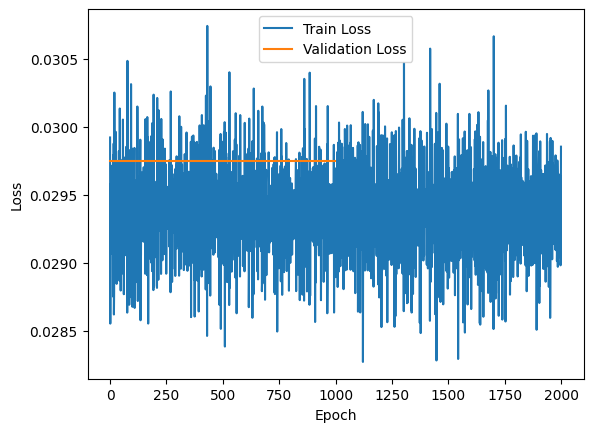

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model2.train()
    train_loss = 0.0
    for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
        optimizer2.zero_grad()
        real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
        output = model2(real_features)
        loss = criterion2(output, deepfake_features)
        loss.backward()
        optimizer2.step()
        train_loss += loss.item()
        train_losses.append(loss.item())

        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {train_losses[-1]:.4f}")

    # Validation
    model2.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            output = model2(real_features)
            loss = criterion2(output, deepfake_features)
            val_loss += loss.item()

            # # Visualize some outputs
            # if batch_idx == 0:  # Only visualize for the first batch of each epoch
            #     visualize_output(real_features, output, deepfake_features)  # Implement visualize_output function

        val_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}")

# Define the window size for smoothing
window_size = 10

# Smooth the train and validation losses
smooth_train_losses = moving_average(train_losses, window_size)
smooth_val_losses = moving_average(val_losses, window_size)

# Plot the smoothed losses
plt.plot(smooth_train_losses, label='Smoothed Train Loss')
plt.plot(smooth_val_losses, label='Smoothed Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

TEST 3

In [ ]:
# Define the neural network architecture for feature generation
class Generator3(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
      super(Generator3, self).__init__()
      self.input_size = input_size
      self.hidden_size = hidden_size
      self.output_size = output_size
      self.num_layers = num_layers

      # Define the layers
      self.layers = nn.ModuleList()
      self.layers.append(nn.Linear(input_size, hidden_size))
      for _ in range(num_layers - 2):
        self.layers.append(nn.Linear(hidden_size, hidden_size))
      self.layers.append(nn.Linear(hidden_size, output_size))

    def forward(self, x):
      for layer in self.layers[:-1]:
        x = F.relu(layer(x))
      x = self.layers[-1](x)
      return x

# Define the differential privacy mechanism
class DPGenerator3(Generator3):
    def __init__(self, input_size, hidden_size, output_size, num_layers, max_grad_norm):
          super(DPGenerator3, self).__init__(input_size, hidden_size, output_size, num_layers)
          self.max_grad_norm = max_grad_norm
          self.noise_multiplier = nn.Parameter(torch.tensor(1.0))

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
            # Add noise proportional to the noise multiplier
            noise = torch.randn_like(x) * self.noise_multiplier
            x = x + noise  # Use x = x + noise instead of inplace operation x += noise
        x = self.layers[-1](x)
        return x

In [ ]:
# Initialize the model
model3 = DPGenerator3(input_size, hidden_size, output_size, num_layers, max_grad_norm).to(device)
model3.noise_multiplier.data.fill_(noise_multiplier)


# Define the loss function
optimizer3 = optim.Adam(model.parameters(), lr=learning_rate)
criterion3 = nn.MSELoss()

In [ ]:
# Initialize empty list to store generated features
generated_features = []
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

Epoch [1/1000], Batch [1/2], Train Loss: 0.0312
Epoch [1/1000], Batch [2/2], Train Loss: 0.0303
Epoch [1/1000], Validation Loss: 0.0315
Epoch [2/1000], Batch [1/2], Train Loss: 0.0301
Epoch [2/1000], Batch [2/2], Train Loss: 0.0319
Epoch [2/1000], Validation Loss: 0.0314
Epoch [3/1000], Batch [1/2], Train Loss: 0.0304
Epoch [3/1000], Batch [2/2], Train Loss: 0.0315
Epoch [3/1000], Validation Loss: 0.0315
Epoch [4/1000], Batch [1/2], Train Loss: 0.0308
Epoch [4/1000], Batch [2/2], Train Loss: 0.0308
Epoch [4/1000], Validation Loss: 0.0314
Epoch [5/1000], Batch [1/2], Train Loss: 0.0312
Epoch [5/1000], Batch [2/2], Train Loss: 0.0303
Epoch [5/1000], Validation Loss: 0.0314
Epoch [6/1000], Batch [1/2], Train Loss: 0.0311
Epoch [6/1000], Batch [2/2], Train Loss: 0.0304
Epoch [6/1000], Validation Loss: 0.0315
Epoch [7/1000], Batch [1/2], Train Loss: 0.0305
Epoch [7/1000], Batch [2/2], Train Loss: 0.0313
Epoch [7/1000], Validation Loss: 0.0315
Epoch [8/1000], Batch [1/2], Train Loss: 0.0309


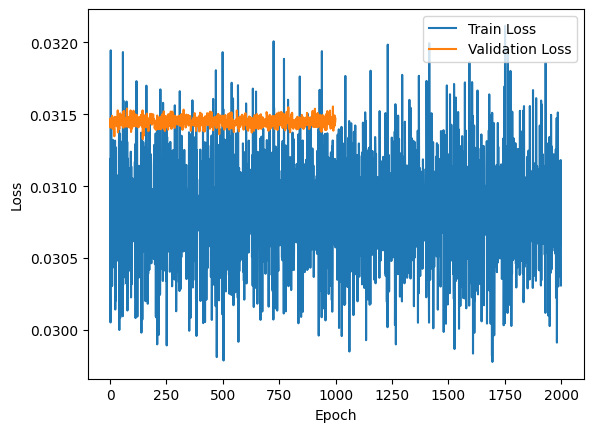

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model3.train()
    train_loss = 0.0
    for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
        optimizer3.zero_grad()
        real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
        output = model3(real_features)
        loss = criterion3(output, deepfake_features)
        loss.backward()
        optimizer3.step()
        train_loss += loss.item()
        train_losses.append(loss.item())

        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {train_losses[-1]:.4f}")

    # Validation
    model3.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            output = model3(real_features)
            loss = criterion3(output, deepfake_features)
            val_loss += loss.item()

            # # Visualize some outputs
            # if batch_idx == 0:  # Only visualize for the first batch of each epoch
            #     visualize_output(real_features, output, deepfake_features)  # Implement visualize_output function

        val_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}")

# Define the window size for smoothing
window_size = 10

# Smooth the train and validation losses
smooth_train_losses = moving_average(train_losses, window_size)
smooth_val_losses = moving_average(val_losses, window_size)

# Plot the smoothed losses
plt.plot(smooth_train_losses, label='Smoothed Train Loss')
plt.plot(smooth_val_losses, label='Smoothed Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

TEST 4

In [ ]:
# Define the neural network architecture for feature generation
class Generator4(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
      super(Generator4, self).__init__()
      self.input_size = input_size
      self.hidden_size = hidden_size
      self.output_size = output_size
      self.num_layers = num_layers

      # Define the layers
      self.layers = nn.ModuleList()
      self.layers.append(nn.Linear(input_size, hidden_size))
      for _ in range(num_layers - 2):
        self.layers.append(nn.Linear(hidden_size, hidden_size))
      self.layers.append(nn.Linear(hidden_size, output_size))

    def forward(self, x):
      for layer in self.layers[:-1]:
        x = F.relu(layer(x))
      x = self.layers[-1](x)
      return x

# Define the differential privacy mechanism
class DPGenerator4(Generator4):
    def __init__(self, input_size, hidden_size, output_size, num_layers, noise_multiplier, max_grad_norm):
          super(DPGenerator4, self).__init__(input_size, hidden_size, output_size, num_layers)
          self.noise_multiplier = noise_multiplier
          self.max_grad_norm = max_grad_norm

          # Ensure all parameters have requires_grad=True
          for param in self.parameters():
              param.requires_grad = True

    def forward(self, x):
        # Add noise during forward pass for privacy
        with torch.no_grad():
            x = super().forward(x)
            x += torch.randn_like(x) * self.noise_multiplier
        return x

In [ ]:
# Initialize the model
model4 = DPGenerator4(input_size, hidden_size, output_size, num_layers, noise_multiplier, max_grad_norm).to(device)

# Define the loss function
optimizer4 = optim.Adam(model.parameters(), lr=learning_rate)
criterion4 = nn.MSELoss()

In [ ]:
# Initialize empty list to store generated features
generated_features = []
# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []


Epoch [1/1000], Batch [1/2], Train Loss: 0.0379
Epoch [1/1000], Batch [2/2], Train Loss: 0.0372
Epoch [1/1000], Validation Loss: 0.0382
Epoch [2/1000], Batch [1/2], Train Loss: 0.0376
Epoch [2/1000], Batch [2/2], Train Loss: 0.0377
Epoch [2/1000], Validation Loss: 0.0383
Epoch [3/1000], Batch [1/2], Train Loss: 0.0379
Epoch [3/1000], Batch [2/2], Train Loss: 0.0372
Epoch [3/1000], Validation Loss: 0.0383
Epoch [4/1000], Batch [1/2], Train Loss: 0.0378
Epoch [4/1000], Batch [2/2], Train Loss: 0.0373
Epoch [4/1000], Validation Loss: 0.0382
Epoch [5/1000], Batch [1/2], Train Loss: 0.0378
Epoch [5/1000], Batch [2/2], Train Loss: 0.0374
Epoch [5/1000], Validation Loss: 0.0382
Epoch [6/1000], Batch [1/2], Train Loss: 0.0377
Epoch [6/1000], Batch [2/2], Train Loss: 0.0375
Epoch [6/1000], Validation Loss: 0.0382
Epoch [7/1000], Batch [1/2], Train Loss: 0.0379
Epoch [7/1000], Batch [2/2], Train Loss: 0.0373
Epoch [7/1000], Validation Loss: 0.0382
Epoch [8/1000], Batch [1/2], Train Loss: 0.0377


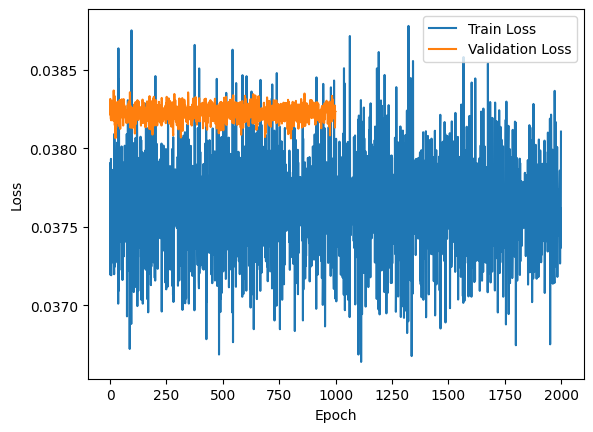

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model4.train()
    train_loss = 0.0
    for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
        optimizer4.zero_grad()
        real_features, deepfake_features = real_features.to(device).float(), deepfake_features.to(device).float()
        real_features.requires_grad = True  # Ensure gradients are tracked for inputs
        deepfake_features.requires_grad = True
        output = model4(real_features)
        loss = criterion4(output, deepfake_features)
        train_loss += loss.item()
        loss.backward()
        optimizer4.step()
        train_losses.append(loss.item())

        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {train_losses[-1]:.4f}")

    # Validation
    model4.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            output = model4(real_features)
            loss = criterion4(output, deepfake_features)
            val_loss += loss.item()

            # # Visualize some outputs
            # if batch_idx == 0:  # Only visualize for the first batch of each epoch
            #     visualize_output(real_features, output, deepfake_features)  # Implement visualize_output function

        val_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}")

# Define the window size for smoothing
window_size = 10

# Smooth the train and validation losses
smooth_train_losses = moving_average(train_losses, window_size)
smooth_val_losses = moving_average(val_losses, window_size)

# Plot the smoothed losses
plt.plot(smooth_train_losses, label='Smoothed Train Loss')
plt.plot(smooth_val_losses, label='Smoothed Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
train_losses

[0.037904392927885056,
 0.037195563316345215,
 0.03758431226015091,
 0.03771628439426422,
 0.03793232515454292,
 0.03719206154346466,
 0.037802327424287796,
 0.03734620288014412,
 0.03778769075870514,
 0.037410397082567215,
 0.03770967572927475,
 0.03752969577908516,
 0.03786255419254303,
 0.03727363795042038,
 0.03767665475606918,
 0.0376417450606823,
 0.03785935789346695,
 0.03729652985930443,
 0.03719864413142204,
 0.0380912646651268,
 0.03798770159482956,
 0.03724668174982071,
 0.03755659982562065,
 0.03776998817920685,
 0.0375327467918396,
 0.037792056798934937,
 0.03748596832156181,
 0.03795449063181877,
 0.03781898319721222,
 0.0373639352619648,
 0.03734074532985687,
 0.03803573176264763,
 0.037850067019462585,
 0.037272557616233826,
 0.03770868107676506,
 0.0375395193696022,
 0.037011295557022095,
 0.03863564878702164,
 0.03709288686513901,
 0.03843695670366287,
 0.037963394075632095,
 0.03722498193383217,
 0.03755880892276764,
 0.03769954293966293,
 0.03772813081741333,
 0.037

TEST 5

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model1.train()
    train_loss = 0.0
    for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
        optimizer.zero_grad()
        real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
        output = model1(real_features)
        loss = criterion(output, deepfake_features)
        loss.backward()
        optimizer.step()
        train_loss += loss.item
        train_losses.append(loss.item())

        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {val_losses[-1]:.4f}")

    # Validation
    model1.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            output = model1(real_features)
            loss = criterion(output, deepfake_features)
            val_loss += loss.item()

            # # Visualize some outputs
            # if batch_idx == 0:  # Only visualize for the first batch of each epoch
            #     visualize_output(real_features, output, deepfake_features)  # Implement visualize_output function

        val_losses.append(loss.item())
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_losses[-1]:.4f}")

# Plot losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

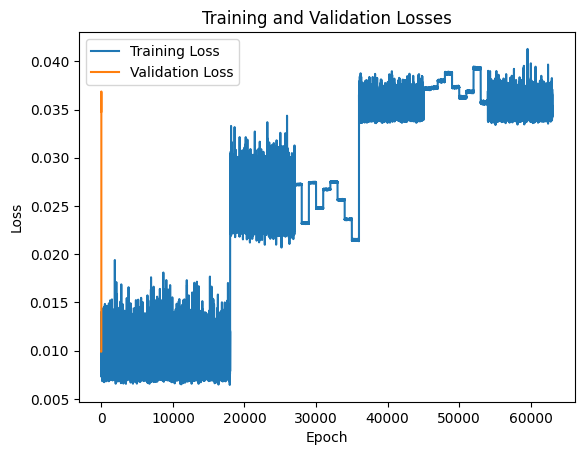

In [ ]:
len(generated_features)

21

In [ ]:
generated_features

[array([[[-0.1050486 ,  0.0592591 , -0.04588313, ...,  0.0681432 ,
           0.05616908, -0.07822345],
         [-0.09180458,  0.10368504, -0.02269186, ...,  0.080788  ,
           0.09603249, -0.21644062],
         [-0.10137026,  0.10495242, -0.0299967 , ...,  0.05484535,
           0.10793833, -0.20948854],
         ...,
         [-0.01912401,  0.0277293 , -0.000632  , ...,  0.00333114,
           0.02780168,  0.05257608],
         [-0.01912401,  0.0277293 , -0.000632  , ...,  0.00333114,
           0.02780168,  0.05257608],
         [-0.01912401,  0.0277293 , -0.000632  , ...,  0.00333114,
           0.02780168,  0.05257608]],
 
        [[-0.10067847,  0.06771937, -0.04842731, ...,  0.06707394,
           0.06730863, -0.09654537],
         [-0.09655349,  0.09838504, -0.02307442, ...,  0.08135854,
           0.08672763, -0.19937101],
         [-0.10654895,  0.09703689, -0.01857823, ...,  0.06867893,
           0.08792984, -0.19429311],
         ...,
         [-0.01912401,  0.0277293

In [ ]:
def adjust_learning_rate(optimizer, epoch, initial_lr, lr_decay_epoch):
    """Adjusts the learning rate of the optimizer."""
    lr = initial_lr * (0.1 ** (epoch // lr_decay_epoch))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

def train_model(model, train_loader, val_loader, num_epochs, initial_lr=0.001, lr_decay_epoch=3, device='cuda'):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=initial_lr)
    criterion = nn.MSELoss()
    scheduler = StepLR(optimizer, step_size=lr_decay_epoch, gamma=0.1)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        adjust_learning_rate(optimizer, epoch, initial_lr, lr_decay_epoch)
        for batch_idx, (real_features, deepfake_features) in enumerate(train_loader):
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            optimizer.zero_grad()
            output = model(real_features)
            loss = criterion(output, deepfake_features)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Train Loss: {loss.item():.4f}")

        train_losses.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_idx, (real_features, deepfake_features) in enumerate(val_loader):
                real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
                output = model(real_features)
                val_loss += criterion(output, deepfake_features).item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}")

    return train_losses, val_losses

def evaluate_model(model, loader, device='cuda'):
    model.eval()
    criterion = nn.MSELoss()
    total_loss = 0.0
    with torch.no_grad():
        for real_features, deepfake_features in loader:
            real_features, deepfake_features = real_features.to(device), deepfake_features.to(device)
            output = model(real_features)
            total_loss += criterion(output, deepfake_features).item()

    avg_loss = total_loss / len(loader)
    return avg_loss

In [ ]:
train_model(model, train_loader, val_loader, 1000)
evaluate_model(model, val_loader)

#Emotion Recognition

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip /content/drive/MyDrive/session1.zip
!unzip /content/drive/MyDrive/session1_video.zip

Archive:  /content/drive/MyDrive/session1.zip
   creating: session1/
   creating: session1/S01A/
   creating: session1/S01A/P/
  inflating: session1/S01A/P/MSP-IMPROV-S01A-F01-P-FM01.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-F01-P-FM02.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-F01-P-MF01.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-FM01.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-FM02.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-MF01.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-MF02.wav  
  inflating: session1/S01A/P/MSP-IMPROV-S01A-M01-P-MF03.wav  
   creating: session1/S01A/R/
  inflating: session1/S01A/R/MSP-IMPROV-S01A-M01-R-MM01.wav  
   creating: session1/S01A/S/
  inflating: session1/S01A/S/MSP-IMPROV-S01A-F01-S-FM01.wav  
  inflating: session1/S01A/S/MSP-IMPROV-S01A-F01-S-FM02.wav  
  inflating: session1/S01A/S/MSP-IMPROV-S01A-F01-S-FM03.wav  
  inflating: session1/S01A/S/MSP-IMPROV-S01A-F01-S-FM04.wav  
  infla

In [9]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
torch.cuda.empty_cache()

In [10]:
final_features = []

In [11]:
import os

# Define the directory containing video and audio files
directory = "session1"

# Initialize an empty dictionary to store video-audio pairs
video_audio_mapping = {}

# Iterate through the directory and its subdirectories
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".avi"):
            video_path = os.path.join(root, file)
            # Replace .avi with .wav to get corresponding audio path
            audio_path = os.path.join(root, file[:-4] + ".wav")
            # Check if corresponding audio file exists
            if os.path.exists(audio_path):
                video_audio_mapping[video_path] = audio_path

# Print the video-audio mapping
for video_path, audio_path in video_audio_mapping.items():
    print(f"Video: {video_path}, Audio: {audio_path}")

Video: session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM02.avi, Audio: session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM02.wav
Video: session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM03.avi, Audio: session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM03.wav
Video: session1/S07A/S/MSP-IMPROV-S07A-M01-S-MF03.avi, Audio: session1/S07A/S/MSP-IMPROV-S07A-M01-S-MF03.wav
Video: session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM02.avi, Audio: session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM02.wav
Video: session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM01.avi, Audio: session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM01.wav
Video: session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM03.avi, Audio: session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM03.wav
Video: session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM01.avi, Audio: session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM01.wav
Video: session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF01.avi, Audio: session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF01.wav
Video: session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF02.avi, Audio: session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF02.wav
Video: session1/S07

In [12]:
import cv2

def resize_video(video_path, output_path, width=320, height=240):
    # Open the video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error opening video file")
        return

    # Get original video properties
    original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can change this to match your video codec

    # Create a VideoWriter object to write the resized video
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Resize the frame to the specified dimensions
        resized_frame = cv2.resize(frame, (width, height))
        out.write(resized_frame)

    # Release resources
    cap.release()
    out.release()

In [13]:
import numpy as np
ckpt_path = "/content/data/finetune-model.pt"
user_dir = "/content/av_hubert/avhubert"
for video_path, audio_path in video_audio_mapping.items():
  label = video_path.split("/")[-3][-1]  # Extract the last character from the third last part of the path
  if label == 'A':
    label = 0
  elif label == 'H':
    label = 1
  elif label == 'S':
    label = 2
  else:
    label = 3
  # Resize the video
  output_path = "resized_video.avi"
  resize_video(video_path, output_path, width=320, height=240)

  # Extract visual features
  layer_features, feature = extract_visual_feature(output_path, audio_path, ckpt_path, user_dir)

  # Create a tensor for the label
  label_tensor = torch.tensor([label] * feature.size(0), dtype=torch.float).unsqueeze(1)  # Repeat the label for each row in feature

  # Concatenate the label tensor with the feature tensor along the second dimension (columns)
  label_tensor = label_tensor.to(feature.device)
  feature_with_label = torch.cat((feature, label_tensor), dim=1)
  final_features.append(feature_with_label)


/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Load video resized_video.avi: shape (112, 240, 320)
Load audio session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM02.wav: shape (94, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 112, 240, 320])
Load audio session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM02.wav: shape torch.Size([1, 104, 112])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([112, 768])


Load video resized_video.avi: shape (48, 240, 320)
Load audio session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM03.wav: shape (40, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 48, 240, 320])
Load audio session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM03.wav: shape torch.Size([1, 104, 48])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([48, 768])


Load video resized_video.avi: shape (47, 240, 320)
Load audio session1/S07A/S/MSP-IMPROV-S07A-M01-S-MF03.wav: shape (40, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 47, 240, 320])
Load audio session1/S07A/S/MSP-IMPROV-S07A-M01-S-MF03.wav: shape torch.Size([1, 104, 47])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([47, 768])


Load video resized_video.avi: shape (126, 240, 320)
Load audio session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM02.wav: shape (105, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 126, 240, 320])
Load audio session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM02.wav: shape torch.Size([1, 104, 126])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([126, 768])


Load video resized_video.avi: shape (131, 240, 320)
Load audio session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM01.wav: shape (109, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 131, 240, 320])
Load audio session1/S07A/S/MSP-IMPROV-S07A-M01-S-FM01.wav: shape torch.Size([1, 104, 131])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([131, 768])


Load video resized_video.avi: shape (46, 240, 320)
Load audio session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM03.wav: shape (39, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 46, 240, 320])
Load audio session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM03.wav: shape torch.Size([1, 104, 46])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([46, 768])


Load video resized_video.avi: shape (139, 240, 320)
Load audio session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM01.wav: shape (116, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 139, 240, 320])
Load audio session1/S07A/S/MSP-IMPROV-S07A-F01-S-FM01.wav: shape torch.Size([1, 104, 139])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([139, 768])


Load video resized_video.avi: shape (121, 240, 320)
Load audio session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF01.wav: shape (102, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 121, 240, 320])
Load audio session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF01.wav: shape torch.Size([1, 104, 121])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([121, 768])


Load video resized_video.avi: shape (159, 240, 320)
Load audio session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF02.wav: shape (133, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 159, 240, 320])
Load audio session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF02.wav: shape torch.Size([1, 104, 159])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([159, 768])


Load video resized_video.avi: shape (83, 240, 320)
Load audio session1/S07A/S/MSP-IMPROV-S07A-M01-S-MF01.wav: shape (70, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 83, 240, 320])
Load audio session1/S07A/S/MSP-IMPROV-S07A-M01-S-MF01.wav: shape torch.Size([1, 104, 83])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([83, 768])


Load video resized_video.avi: shape (126, 240, 320)
Load audio session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF03.wav: shape (106, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 126, 240, 320])
Load audio session1/S07A/S/MSP-IMPROV-S07A-F01-S-MF03.wav: shape torch.Size([1, 104, 126])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([126, 768])


Load video resized_video.avi: shape (66, 240, 320)
Load audio session1/S07A/S/MSP-IMPROV-S07A-M01-S-MF02.wav: shape (56, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 66, 240, 320])
Load audio session1/S07A/S/MSP-IMPROV-S07A-M01-S-MF02.wav: shape torch.Size([1, 104, 66])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([66, 768])


Load video resized_video.avi: shape (123, 240, 320)
Load audio session1/S07A/R/MSP-IMPROV-S07A-M01-R-MM02.wav: shape (103, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 123, 240, 320])
Load audio session1/S07A/R/MSP-IMPROV-S07A-M01-R-MM02.wav: shape torch.Size([1, 104, 123])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([123, 768])


Load video resized_video.avi: shape (146, 240, 320)
Load audio session1/S07A/R/MSP-IMPROV-S07A-M01-R-MM01.wav: shape (122, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 146, 240, 320])
Load audio session1/S07A/R/MSP-IMPROV-S07A-M01-R-MM01.wav: shape torch.Size([1, 104, 146])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([146, 768])


Load video resized_video.avi: shape (56, 240, 320)
Load audio session1/S07A/T/MSP-IMPROV-S07A-F01-T-FM01.wav: shape (47, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 56, 240, 320])
Load audio session1/S07A/T/MSP-IMPROV-S07A-F01-T-FM01.wav: shape torch.Size([1, 104, 56])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([56, 768])


Load video resized_video.avi: shape (42, 240, 320)
Load audio session1/S07A/T/MSP-IMPROV-S07A-M01-T-MF01.wav: shape (36, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 42, 240, 320])
Load audio session1/S07A/T/MSP-IMPROV-S07A-M01-T-MF01.wav: shape torch.Size([1, 104, 42])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([42, 768])


Load video resized_video.avi: shape (68, 240, 320)
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-FM04.wav: shape (57, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 68, 240, 320])
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-FM04.wav: shape torch.Size([1, 104, 68])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([68, 768])


Load video resized_video.avi: shape (152, 240, 320)
Load audio session1/S07A/P/MSP-IMPROV-S07A-F01-P-FM01.wav: shape (127, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 152, 240, 320])
Load audio session1/S07A/P/MSP-IMPROV-S07A-F01-P-FM01.wav: shape torch.Size([1, 104, 152])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([152, 768])


Load video resized_video.avi: shape (79, 240, 320)
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-MF01.wav: shape (67, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 79, 240, 320])
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-MF01.wav: shape torch.Size([1, 104, 79])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([79, 768])


Load video resized_video.avi: shape (148, 240, 320)
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-MF03.wav: shape (124, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 148, 240, 320])
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-MF03.wav: shape torch.Size([1, 104, 148])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([148, 768])


Load video resized_video.avi: shape (92, 240, 320)
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-MF02.wav: shape (77, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 92, 240, 320])
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-MF02.wav: shape torch.Size([1, 104, 92])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([92, 768])


Load video resized_video.avi: shape (126, 240, 320)
Load audio session1/S07A/P/MSP-IMPROV-S07A-F01-P-MF01.wav: shape (105, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 126, 240, 320])
Load audio session1/S07A/P/MSP-IMPROV-S07A-F01-P-MF01.wav: shape torch.Size([1, 104, 126])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([126, 768])


Load video resized_video.avi: shape (148, 240, 320)
Load audio session1/S07A/P/MSP-IMPROV-S07A-F01-P-FM02.wav: shape (124, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 148, 240, 320])
Load audio session1/S07A/P/MSP-IMPROV-S07A-F01-P-FM02.wav: shape torch.Size([1, 104, 148])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([148, 768])


Load video resized_video.avi: shape (242, 240, 320)
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-FM02.wav: shape (203, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 242, 240, 320])
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-FM02.wav: shape torch.Size([1, 104, 242])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([242, 768])


Load video resized_video.avi: shape (230, 240, 320)
Load audio session1/S07A/P/MSP-IMPROV-S07A-F01-P-MF02.wav: shape (192, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 230, 240, 320])
Load audio session1/S07A/P/MSP-IMPROV-S07A-F01-P-MF02.wav: shape torch.Size([1, 104, 230])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([230, 768])


Load video resized_video.avi: shape (100, 240, 320)
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-FM01.wav: shape (84, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 100, 240, 320])
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-FM01.wav: shape torch.Size([1, 104, 100])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([100, 768])


Load video resized_video.avi: shape (110, 240, 320)
Load audio session1/S07A/P/MSP-IMPROV-S07A-F01-P-FM03.wav: shape (92, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 110, 240, 320])
Load audio session1/S07A/P/MSP-IMPROV-S07A-F01-P-FM03.wav: shape torch.Size([1, 104, 110])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([110, 768])


Load video resized_video.avi: shape (223, 240, 320)
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-FM03.wav: shape (186, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 223, 240, 320])
Load audio session1/S07A/P/MSP-IMPROV-S07A-M01-P-FM03.wav: shape torch.Size([1, 104, 223])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([223, 768])


Load video resized_video.avi: shape (43, 240, 320)
Load audio session1/S08H/S/MSP-IMPROV-S08H-M01-S-MF01.wav: shape (36, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 43, 240, 320])
Load audio session1/S08H/S/MSP-IMPROV-S08H-M01-S-MF01.wav: shape torch.Size([1, 104, 43])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([43, 768])


Load video resized_video.avi: shape (89, 240, 320)
Load audio session1/S08H/S/MSP-IMPROV-S08H-M01-S-FM02.wav: shape (74, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 89, 240, 320])
Load audio session1/S08H/S/MSP-IMPROV-S08H-M01-S-FM02.wav: shape torch.Size([1, 104, 89])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([89, 768])


Load video resized_video.avi: shape (140, 240, 320)
Load audio session1/S08H/S/MSP-IMPROV-S08H-F01-S-MF02.wav: shape (117, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 140, 240, 320])
Load audio session1/S08H/S/MSP-IMPROV-S08H-F01-S-MF02.wav: shape torch.Size([1, 104, 140])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([140, 768])


Load video resized_video.avi: shape (159, 240, 320)
Load audio session1/S08H/S/MSP-IMPROV-S08H-F01-S-FM02.wav: shape (133, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 159, 240, 320])
Load audio session1/S08H/S/MSP-IMPROV-S08H-F01-S-FM02.wav: shape torch.Size([1, 104, 159])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([159, 768])


Load video resized_video.avi: shape (130, 240, 320)
Load audio session1/S08H/S/MSP-IMPROV-S08H-M01-S-FM01.wav: shape (109, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 130, 240, 320])
Load audio session1/S08H/S/MSP-IMPROV-S08H-M01-S-FM01.wav: shape torch.Size([1, 104, 130])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([130, 768])


Load video resized_video.avi: shape (68, 240, 320)
Load audio session1/S08H/S/MSP-IMPROV-S08H-M01-S-MF02.wav: shape (57, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 68, 240, 320])
Load audio session1/S08H/S/MSP-IMPROV-S08H-M01-S-MF02.wav: shape torch.Size([1, 104, 68])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([68, 768])


Load video resized_video.avi: shape (82, 240, 320)
Load audio session1/S08H/S/MSP-IMPROV-S08H-F01-S-FM01.wav: shape (69, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 82, 240, 320])
Load audio session1/S08H/S/MSP-IMPROV-S08H-F01-S-FM01.wav: shape torch.Size([1, 104, 82])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([82, 768])


Load video resized_video.avi: shape (76, 240, 320)
Load audio session1/S08H/S/MSP-IMPROV-S08H-F01-S-MF01.wav: shape (64, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 76, 240, 320])
Load audio session1/S08H/S/MSP-IMPROV-S08H-F01-S-MF01.wav: shape torch.Size([1, 104, 76])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([76, 768])


Load video resized_video.avi: shape (225, 240, 320)
Load audio session1/S08H/R/MSP-IMPROV-S08H-M01-R-MM01.wav: shape (188, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 225, 240, 320])
Load audio session1/S08H/R/MSP-IMPROV-S08H-M01-R-MM01.wav: shape torch.Size([1, 104, 225])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([225, 768])


Load video resized_video.avi: shape (172, 240, 320)
Load audio session1/S08H/R/MSP-IMPROV-S08H-M01-R-MM02.wav: shape (144, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 172, 240, 320])
Load audio session1/S08H/R/MSP-IMPROV-S08H-M01-R-MM02.wav: shape torch.Size([1, 104, 172])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([172, 768])


Load video resized_video.avi: shape (124, 240, 320)
Load audio session1/S08H/T/MSP-IMPROV-S08H-F01-T-FM01.wav: shape (104, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 124, 240, 320])
Load audio session1/S08H/T/MSP-IMPROV-S08H-F01-T-FM01.wav: shape torch.Size([1, 104, 124])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([124, 768])


Load video resized_video.avi: shape (101, 240, 320)
Load audio session1/S08H/T/MSP-IMPROV-S08H-M01-T-MF01.wav: shape (85, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 101, 240, 320])
Load audio session1/S08H/T/MSP-IMPROV-S08H-M01-T-MF01.wav: shape torch.Size([1, 104, 101])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([101, 768])


Load video resized_video.avi: shape (186, 240, 320)
Load audio session1/S08H/P/MSP-IMPROV-S08H-F01-P-MF02.wav: shape (155, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 186, 240, 320])
Load audio session1/S08H/P/MSP-IMPROV-S08H-F01-P-MF02.wav: shape torch.Size([1, 104, 186])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([186, 768])


Load video resized_video.avi: shape (40, 240, 320)
Load audio session1/S08H/P/MSP-IMPROV-S08H-M01-P-MF03.wav: shape (34, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 40, 240, 320])
Load audio session1/S08H/P/MSP-IMPROV-S08H-M01-P-MF03.wav: shape torch.Size([1, 104, 40])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([40, 768])


Load video resized_video.avi: shape (118, 240, 320)
Load audio session1/S08H/P/MSP-IMPROV-S08H-M01-P-MF01.wav: shape (99, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 118, 240, 320])
Load audio session1/S08H/P/MSP-IMPROV-S08H-M01-P-MF01.wav: shape torch.Size([1, 104, 118])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([118, 768])


Load video resized_video.avi: shape (247, 240, 320)
Load audio session1/S08H/P/MSP-IMPROV-S08H-F01-P-FM01.wav: shape (206, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 247, 240, 320])
Load audio session1/S08H/P/MSP-IMPROV-S08H-F01-P-FM01.wav: shape torch.Size([1, 104, 247])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([247, 768])


Load video resized_video.avi: shape (117, 240, 320)
Load audio session1/S08H/P/MSP-IMPROV-S08H-F01-P-FM02.wav: shape (98, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 117, 240, 320])
Load audio session1/S08H/P/MSP-IMPROV-S08H-F01-P-FM02.wav: shape torch.Size([1, 104, 117])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([117, 768])


Load video resized_video.avi: shape (148, 240, 320)
Load audio session1/S08H/P/MSP-IMPROV-S08H-F01-P-MF01.wav: shape (124, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 148, 240, 320])
Load audio session1/S08H/P/MSP-IMPROV-S08H-F01-P-MF01.wav: shape torch.Size([1, 104, 148])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([148, 768])


Load video resized_video.avi: shape (355, 240, 320)
Load audio session1/S08H/P/MSP-IMPROV-S08H-M01-P-FM01.wav: shape (296, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 355, 240, 320])
Load audio session1/S08H/P/MSP-IMPROV-S08H-M01-P-FM01.wav: shape torch.Size([1, 104, 355])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([355, 768])


Load video resized_video.avi: shape (165, 240, 320)
Load audio session1/S08H/P/MSP-IMPROV-S08H-M01-P-MF02.wav: shape (138, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 165, 240, 320])
Load audio session1/S08H/P/MSP-IMPROV-S08H-M01-P-MF02.wav: shape torch.Size([1, 104, 165])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([165, 768])


Load video resized_video.avi: shape (118, 240, 320)
Load audio session1/S12A/R/MSP-IMPROV-S12A-M01-R-MM01.wav: shape (99, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 118, 240, 320])
Load audio session1/S12A/R/MSP-IMPROV-S12A-M01-R-MM01.wav: shape torch.Size([1, 104, 118])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([118, 768])


Load video resized_video.avi: shape (101, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-MF02.wav: shape (85, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 101, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-MF02.wav: shape torch.Size([1, 104, 101])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([101, 768])


Load video resized_video.avi: shape (104, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-M01-S-MF01.wav: shape (87, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 104, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-M01-S-MF01.wav: shape torch.Size([1, 104, 104])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([104, 768])


Load video resized_video.avi: shape (143, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-M01-S-FM02.wav: shape (120, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 143, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-M01-S-FM02.wav: shape torch.Size([1, 104, 143])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([143, 768])


Load video resized_video.avi: shape (126, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-FM01.wav: shape (106, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 126, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-FM01.wav: shape torch.Size([1, 104, 126])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([126, 768])


Load video resized_video.avi: shape (134, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-MF01.wav: shape (113, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 134, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-MF01.wav: shape torch.Size([1, 104, 134])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([134, 768])


Load video resized_video.avi: shape (162, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-MF03.wav: shape (136, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 162, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-MF03.wav: shape torch.Size([1, 104, 162])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([162, 768])


Load video resized_video.avi: shape (193, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-FM02.wav: shape (162, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 193, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-FM02.wav: shape torch.Size([1, 104, 193])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([193, 768])


Load video resized_video.avi: shape (158, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-FM03.wav: shape (133, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 158, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-FM03.wav: shape torch.Size([1, 104, 158])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([158, 768])


Load video resized_video.avi: shape (163, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-M01-S-FM01.wav: shape (136, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 163, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-M01-S-FM01.wav: shape torch.Size([1, 104, 163])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([163, 768])


Load video resized_video.avi: shape (128, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-FM04.wav: shape (107, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 128, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-F01-S-FM04.wav: shape torch.Size([1, 104, 128])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([128, 768])


Load video resized_video.avi: shape (112, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-M01-S-FM04.wav: shape (94, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 112, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-M01-S-FM04.wav: shape torch.Size([1, 104, 112])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([112, 768])


Load video resized_video.avi: shape (152, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-M01-S-FM03.wav: shape (128, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 152, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-M01-S-FM03.wav: shape torch.Size([1, 104, 152])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([152, 768])


Load video resized_video.avi: shape (79, 240, 320)
Load audio session1/S08S/S/MSP-IMPROV-S08S-M01-S-FM05.wav: shape (67, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 79, 240, 320])
Load audio session1/S08S/S/MSP-IMPROV-S08S-M01-S-FM05.wav: shape torch.Size([1, 104, 79])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([79, 768])


Load video resized_video.avi: shape (193, 240, 320)
Load audio session1/S08S/R/MSP-IMPROV-S08S-M01-R-MM01.wav: shape (162, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 193, 240, 320])
Load audio session1/S08S/R/MSP-IMPROV-S08S-M01-R-MM01.wav: shape torch.Size([1, 104, 193])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([193, 768])


Load video resized_video.avi: shape (169, 240, 320)
Load audio session1/S08S/R/MSP-IMPROV-S08S-M01-R-MM02.wav: shape (141, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 169, 240, 320])
Load audio session1/S08S/R/MSP-IMPROV-S08S-M01-R-MM02.wav: shape torch.Size([1, 104, 169])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([169, 768])


Load video resized_video.avi: shape (114, 240, 320)
Load audio session1/S08S/T/MSP-IMPROV-S08S-M01-T-MF01.wav: shape (95, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 114, 240, 320])
Load audio session1/S08S/T/MSP-IMPROV-S08S-M01-T-MF01.wav: shape torch.Size([1, 104, 114])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([114, 768])


Load video resized_video.avi: shape (146, 240, 320)
Load audio session1/S08S/T/MSP-IMPROV-S08S-F01-T-FM01.wav: shape (123, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 146, 240, 320])
Load audio session1/S08S/T/MSP-IMPROV-S08S-F01-T-FM01.wav: shape torch.Size([1, 104, 146])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([146, 768])


Load video resized_video.avi: shape (116, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-MF02.wav: shape (97, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 116, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-MF02.wav: shape torch.Size([1, 104, 116])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([116, 768])


Load video resized_video.avi: shape (100, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-FM04.wav: shape (84, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 100, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-FM04.wav: shape torch.Size([1, 104, 100])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([100, 768])


Load video resized_video.avi: shape (207, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-MF01.wav: shape (173, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 207, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-MF01.wav: shape torch.Size([1, 104, 207])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([207, 768])


Load video resized_video.avi: shape (53, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-FM03.wav: shape (45, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 53, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-FM03.wav: shape torch.Size([1, 104, 53])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([53, 768])


Load video resized_video.avi: shape (136, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-FM04.wav: shape (114, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 136, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-FM04.wav: shape torch.Size([1, 104, 136])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([136, 768])


Load video resized_video.avi: shape (265, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-FM05.wav: shape (221, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 265, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-FM05.wav: shape torch.Size([1, 104, 265])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([265, 768])


Load video resized_video.avi: shape (184, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-FM02.wav: shape (154, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 184, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-FM02.wav: shape torch.Size([1, 104, 184])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([184, 768])


Load video resized_video.avi: shape (280, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-MF03.wav: shape (234, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 280, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-MF03.wav: shape torch.Size([1, 104, 280])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([280, 768])


Load video resized_video.avi: shape (102, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-MF02.wav: shape (85, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 102, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-MF02.wav: shape torch.Size([1, 104, 102])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([102, 768])


Load video resized_video.avi: shape (168, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-FM02.wav: shape (140, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 168, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-FM02.wav: shape torch.Size([1, 104, 168])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([168, 768])


Load video resized_video.avi: shape (128, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-MF01.wav: shape (108, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 128, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-MF01.wav: shape torch.Size([1, 104, 128])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([128, 768])


Load video resized_video.avi: shape (70, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-FM01.wav: shape (59, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 70, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-M01-P-FM01.wav: shape torch.Size([1, 104, 70])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([70, 768])


Load video resized_video.avi: shape (189, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-FM01.wav: shape (158, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 189, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-FM01.wav: shape torch.Size([1, 104, 189])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([189, 768])


Load video resized_video.avi: shape (378, 240, 320)
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-FM03.wav: shape (315, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 378, 240, 320])
Load audio session1/S08S/P/MSP-IMPROV-S08S-F01-P-FM03.wav: shape torch.Size([1, 104, 378])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([378, 768])


Load video resized_video.avi: shape (240, 240, 320)
Load audio session1/S20N/R/MSP-IMPROV-S20N-M01-R-MM01.wav: shape (201, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 240, 240, 320])
Load audio session1/S20N/R/MSP-IMPROV-S20N-M01-R-MM01.wav: shape torch.Size([1, 104, 240])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([240, 768])


Load video resized_video.avi: shape (196, 240, 320)
Load audio session1/S20S/R/MSP-IMPROV-S20S-M01-R-MM01.wav: shape (164, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 196, 240, 320])
Load audio session1/S20S/R/MSP-IMPROV-S20S-M01-R-MM01.wav: shape torch.Size([1, 104, 196])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([196, 768])


Load video resized_video.avi: shape (145, 240, 320)
Load audio session1/S14S/R/MSP-IMPROV-S14S-M01-R-MM01.wav: shape (122, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 145, 240, 320])
Load audio session1/S14S/R/MSP-IMPROV-S14S-M01-R-MM01.wav: shape torch.Size([1, 104, 145])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([145, 768])


Load video resized_video.avi: shape (161, 240, 320)
Load audio session1/S16H/R/MSP-IMPROV-S16H-M01-R-MM01.wav: shape (135, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 161, 240, 320])
Load audio session1/S16H/R/MSP-IMPROV-S16H-M01-R-MM01.wav: shape torch.Size([1, 104, 161])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([161, 768])


Load video resized_video.avi: shape (115, 240, 320)
Load audio session1/S10H/S/MSP-IMPROV-S10H-M01-S-MF02.wav: shape (96, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 115, 240, 320])
Load audio session1/S10H/S/MSP-IMPROV-S10H-M01-S-MF02.wav: shape torch.Size([1, 104, 115])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([115, 768])


Load video resized_video.avi: shape (70, 240, 320)
Load audio session1/S10H/S/MSP-IMPROV-S10H-F01-S-FM02.wav: shape (59, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 70, 240, 320])
Load audio session1/S10H/S/MSP-IMPROV-S10H-F01-S-FM02.wav: shape torch.Size([1, 104, 70])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([70, 768])


Load video resized_video.avi: shape (122, 240, 320)
Load audio session1/S10H/S/MSP-IMPROV-S10H-F01-S-MF02.wav: shape (102, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 122, 240, 320])
Load audio session1/S10H/S/MSP-IMPROV-S10H-F01-S-MF02.wav: shape torch.Size([1, 104, 122])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([122, 768])


Load video resized_video.avi: shape (101, 240, 320)
Load audio session1/S10H/S/MSP-IMPROV-S10H-M01-S-MF01.wav: shape (85, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 101, 240, 320])
Load audio session1/S10H/S/MSP-IMPROV-S10H-M01-S-MF01.wav: shape torch.Size([1, 104, 101])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([101, 768])


Load video resized_video.avi: shape (100, 240, 320)
Load audio session1/S10H/S/MSP-IMPROV-S10H-F01-S-FM01.wav: shape (84, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 100, 240, 320])
Load audio session1/S10H/S/MSP-IMPROV-S10H-F01-S-FM01.wav: shape torch.Size([1, 104, 100])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([100, 768])


Load video resized_video.avi: shape (132, 240, 320)
Load audio session1/S10H/S/MSP-IMPROV-S10H-M01-S-FM01.wav: shape (111, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 132, 240, 320])
Load audio session1/S10H/S/MSP-IMPROV-S10H-M01-S-FM01.wav: shape torch.Size([1, 104, 132])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([132, 768])


Load video resized_video.avi: shape (45, 240, 320)
Load audio session1/S10H/S/MSP-IMPROV-S10H-F01-S-MF03.wav: shape (38, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 45, 240, 320])
Load audio session1/S10H/S/MSP-IMPROV-S10H-F01-S-MF03.wav: shape torch.Size([1, 104, 45])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([45, 768])


Load video resized_video.avi: shape (36, 240, 320)
Load audio session1/S10H/S/MSP-IMPROV-S10H-M01-S-FM02.wav: shape (30, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 36, 240, 320])
Load audio session1/S10H/S/MSP-IMPROV-S10H-M01-S-FM02.wav: shape torch.Size([1, 104, 36])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([36, 768])


Load video resized_video.avi: shape (179, 240, 320)
Load audio session1/S10H/S/MSP-IMPROV-S10H-F01-S-MF01.wav: shape (150, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 179, 240, 320])
Load audio session1/S10H/S/MSP-IMPROV-S10H-F01-S-MF01.wav: shape torch.Size([1, 104, 179])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([179, 768])


Load video resized_video.avi: shape (224, 240, 320)
Load audio session1/S10H/R/MSP-IMPROV-S10H-M01-R-MM01.wav: shape (187, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 224, 240, 320])
Load audio session1/S10H/R/MSP-IMPROV-S10H-M01-R-MM01.wav: shape torch.Size([1, 104, 224])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([224, 768])


Load video resized_video.avi: shape (176, 240, 320)
Load audio session1/S10H/R/MSP-IMPROV-S10H-M01-R-MM02.wav: shape (147, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 176, 240, 320])
Load audio session1/S10H/R/MSP-IMPROV-S10H-M01-R-MM02.wav: shape torch.Size([1, 104, 176])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([176, 768])


Load video resized_video.avi: shape (98, 240, 320)
Load audio session1/S10H/T/MSP-IMPROV-S10H-M01-T-MF01.wav: shape (83, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 98, 240, 320])
Load audio session1/S10H/T/MSP-IMPROV-S10H-M01-T-MF01.wav: shape torch.Size([1, 104, 98])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([98, 768])


Load video resized_video.avi: shape (71, 240, 320)
Load audio session1/S10H/T/MSP-IMPROV-S10H-F01-T-FM01.wav: shape (59, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 71, 240, 320])
Load audio session1/S10H/T/MSP-IMPROV-S10H-F01-T-FM01.wav: shape torch.Size([1, 104, 71])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([71, 768])


Load video resized_video.avi: shape (135, 240, 320)
Load audio session1/S10H/P/MSP-IMPROV-S10H-M01-P-MF03.wav: shape (113, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 135, 240, 320])
Load audio session1/S10H/P/MSP-IMPROV-S10H-M01-P-MF03.wav: shape torch.Size([1, 104, 135])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([135, 768])


Load video resized_video.avi: shape (117, 240, 320)
Load audio session1/S10H/P/MSP-IMPROV-S10H-M01-P-MF02.wav: shape (98, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 117, 240, 320])
Load audio session1/S10H/P/MSP-IMPROV-S10H-M01-P-MF02.wav: shape torch.Size([1, 104, 117])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([117, 768])


Load video resized_video.avi: shape (124, 240, 320)
Load audio session1/S10H/P/MSP-IMPROV-S10H-F01-P-FM01.wav: shape (104, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 124, 240, 320])
Load audio session1/S10H/P/MSP-IMPROV-S10H-F01-P-FM01.wav: shape torch.Size([1, 104, 124])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([124, 768])


Load video resized_video.avi: shape (127, 240, 320)
Load audio session1/S10H/P/MSP-IMPROV-S10H-M01-P-MF01.wav: shape (106, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 127, 240, 320])
Load audio session1/S10H/P/MSP-IMPROV-S10H-M01-P-MF01.wav: shape torch.Size([1, 104, 127])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([127, 768])


Load video resized_video.avi: shape (335, 240, 320)
Load audio session1/S10H/P/MSP-IMPROV-S10H-F01-P-MF01.wav: shape (280, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 335, 240, 320])
Load audio session1/S10H/P/MSP-IMPROV-S10H-F01-P-MF01.wav: shape torch.Size([1, 104, 335])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([335, 768])


Load video resized_video.avi: shape (155, 240, 320)
Load audio session1/S10H/P/MSP-IMPROV-S10H-F01-P-FM03.wav: shape (130, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 155, 240, 320])
Load audio session1/S10H/P/MSP-IMPROV-S10H-F01-P-FM03.wav: shape torch.Size([1, 104, 155])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([155, 768])


Load video resized_video.avi: shape (160, 240, 320)
Load audio session1/S10H/P/MSP-IMPROV-S10H-M01-P-FM01.wav: shape (134, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 160, 240, 320])
Load audio session1/S10H/P/MSP-IMPROV-S10H-M01-P-FM01.wav: shape torch.Size([1, 104, 160])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([160, 768])


Load video resized_video.avi: shape (82, 240, 320)
Load audio session1/S10H/P/MSP-IMPROV-S10H-F01-P-MF02.wav: shape (69, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 82, 240, 320])
Load audio session1/S10H/P/MSP-IMPROV-S10H-F01-P-MF02.wav: shape torch.Size([1, 104, 82])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([82, 768])


Load video resized_video.avi: shape (220, 240, 320)
Load audio session1/S10H/P/MSP-IMPROV-S10H-F01-P-FM02.wav: shape (184, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 220, 240, 320])
Load audio session1/S10H/P/MSP-IMPROV-S10H-F01-P-FM02.wav: shape torch.Size([1, 104, 220])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([220, 768])


Load video resized_video.avi: shape (137, 240, 320)
Load audio session1/S18S/R/MSP-IMPROV-S18S-M01-R-MM01.wav: shape (115, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 137, 240, 320])
Load audio session1/S18S/R/MSP-IMPROV-S18S-M01-R-MM01.wav: shape torch.Size([1, 104, 137])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([137, 768])


Load video resized_video.avi: shape (65, 240, 320)
Load audio session1/S10N/S/MSP-IMPROV-S10N-F01-S-MF05.wav: shape (55, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 65, 240, 320])
Load audio session1/S10N/S/MSP-IMPROV-S10N-F01-S-MF05.wav: shape torch.Size([1, 104, 65])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([65, 768])


Load video resized_video.avi: shape (94, 240, 320)
Load audio session1/S10N/S/MSP-IMPROV-S10N-F01-S-MF02.wav: shape (79, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 94, 240, 320])
Load audio session1/S10N/S/MSP-IMPROV-S10N-F01-S-MF02.wav: shape torch.Size([1, 104, 94])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([94, 768])


Load video resized_video.avi: shape (163, 240, 320)
Load audio session1/S10N/S/MSP-IMPROV-S10N-F01-S-FM01.wav: shape (137, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 163, 240, 320])
Load audio session1/S10N/S/MSP-IMPROV-S10N-F01-S-FM01.wav: shape torch.Size([1, 104, 163])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([163, 768])


Load video resized_video.avi: shape (239, 240, 320)
Load audio session1/S10N/S/MSP-IMPROV-S10N-M01-S-MF01.wav: shape (200, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 239, 240, 320])
Load audio session1/S10N/S/MSP-IMPROV-S10N-M01-S-MF01.wav: shape torch.Size([1, 104, 239])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([239, 768])


Load video resized_video.avi: shape (112, 240, 320)
Load audio session1/S10N/S/MSP-IMPROV-S10N-F01-S-MF01.wav: shape (94, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 112, 240, 320])
Load audio session1/S10N/S/MSP-IMPROV-S10N-F01-S-MF01.wav: shape torch.Size([1, 104, 112])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([112, 768])


Load video resized_video.avi: shape (91, 240, 320)
Load audio session1/S10N/S/MSP-IMPROV-S10N-M01-S-FM01.wav: shape (76, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 91, 240, 320])
Load audio session1/S10N/S/MSP-IMPROV-S10N-M01-S-FM01.wav: shape torch.Size([1, 104, 91])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([91, 768])


Load video resized_video.avi: shape (79, 240, 320)
Load audio session1/S10N/S/MSP-IMPROV-S10N-F01-S-MF03.wav: shape (67, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 79, 240, 320])
Load audio session1/S10N/S/MSP-IMPROV-S10N-F01-S-MF03.wav: shape torch.Size([1, 104, 79])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([79, 768])


Load video resized_video.avi: shape (100, 240, 320)
Load audio session1/S10N/S/MSP-IMPROV-S10N-M01-S-FM02.wav: shape (84, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 100, 240, 320])
Load audio session1/S10N/S/MSP-IMPROV-S10N-M01-S-FM02.wav: shape torch.Size([1, 104, 100])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([100, 768])


Load video resized_video.avi: shape (102, 240, 320)
Load audio session1/S10N/S/MSP-IMPROV-S10N-F01-S-MF04.wav: shape (85, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 102, 240, 320])
Load audio session1/S10N/S/MSP-IMPROV-S10N-F01-S-MF04.wav: shape torch.Size([1, 104, 102])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([102, 768])


Load video resized_video.avi: shape (139, 240, 320)
Load audio session1/S10N/S/MSP-IMPROV-S10N-M01-S-MF02.wav: shape (117, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 139, 240, 320])
Load audio session1/S10N/S/MSP-IMPROV-S10N-M01-S-MF02.wav: shape torch.Size([1, 104, 139])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([139, 768])


Load video resized_video.avi: shape (183, 240, 320)
Load audio session1/S10N/R/MSP-IMPROV-S10N-M01-R-MM01.wav: shape (153, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 183, 240, 320])
Load audio session1/S10N/R/MSP-IMPROV-S10N-M01-R-MM01.wav: shape torch.Size([1, 104, 183])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([183, 768])


Load video resized_video.avi: shape (95, 240, 320)
Load audio session1/S10N/T/MSP-IMPROV-S10N-M01-T-MF01.wav: shape (80, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 95, 240, 320])
Load audio session1/S10N/T/MSP-IMPROV-S10N-M01-T-MF01.wav: shape torch.Size([1, 104, 95])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([95, 768])


Load video resized_video.avi: shape (57, 240, 320)
Load audio session1/S10N/T/MSP-IMPROV-S10N-F01-T-FM01.wav: shape (48, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 57, 240, 320])
Load audio session1/S10N/T/MSP-IMPROV-S10N-F01-T-FM01.wav: shape torch.Size([1, 104, 57])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([57, 768])


Load video resized_video.avi: shape (102, 240, 320)
Load audio session1/S10N/P/MSP-IMPROV-S10N-F01-P-MF02.wav: shape (86, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 102, 240, 320])
Load audio session1/S10N/P/MSP-IMPROV-S10N-F01-P-MF02.wav: shape torch.Size([1, 104, 102])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([102, 768])


Load video resized_video.avi: shape (160, 240, 320)
Load audio session1/S10N/P/MSP-IMPROV-S10N-F01-P-FM02.wav: shape (134, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 160, 240, 320])
Load audio session1/S10N/P/MSP-IMPROV-S10N-F01-P-FM02.wav: shape torch.Size([1, 104, 160])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([160, 768])


Load video resized_video.avi: shape (144, 240, 320)
Load audio session1/S10N/P/MSP-IMPROV-S10N-F01-P-FM01.wav: shape (121, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 144, 240, 320])
Load audio session1/S10N/P/MSP-IMPROV-S10N-F01-P-FM01.wav: shape torch.Size([1, 104, 144])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([144, 768])


Load video resized_video.avi: shape (62, 240, 320)
Load audio session1/S10N/P/MSP-IMPROV-S10N-F01-P-MF01.wav: shape (53, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 62, 240, 320])
Load audio session1/S10N/P/MSP-IMPROV-S10N-F01-P-MF01.wav: shape torch.Size([1, 104, 62])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([62, 768])


Load video resized_video.avi: shape (71, 240, 320)
Load audio session1/S10N/P/MSP-IMPROV-S10N-M01-P-MF01.wav: shape (60, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 71, 240, 320])
Load audio session1/S10N/P/MSP-IMPROV-S10N-M01-P-MF01.wav: shape torch.Size([1, 104, 71])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([71, 768])


Load video resized_video.avi: shape (32, 240, 320)
Load audio session1/S10N/P/MSP-IMPROV-S10N-M01-P-MF04.wav: shape (27, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 32, 240, 320])
Load audio session1/S10N/P/MSP-IMPROV-S10N-M01-P-MF04.wav: shape torch.Size([1, 104, 32])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([32, 768])


Load video resized_video.avi: shape (91, 240, 320)
Load audio session1/S10N/P/MSP-IMPROV-S10N-M01-P-FM02.wav: shape (76, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 91, 240, 320])
Load audio session1/S10N/P/MSP-IMPROV-S10N-M01-P-FM02.wav: shape torch.Size([1, 104, 91])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([91, 768])


Load video resized_video.avi: shape (355, 240, 320)
Load audio session1/S10N/P/MSP-IMPROV-S10N-M01-P-MF02.wav: shape (297, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 355, 240, 320])
Load audio session1/S10N/P/MSP-IMPROV-S10N-M01-P-MF02.wav: shape torch.Size([1, 104, 355])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([355, 768])


Load video resized_video.avi: shape (79, 240, 320)
Load audio session1/S10N/P/MSP-IMPROV-S10N-F01-P-MF03.wav: shape (66, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 79, 240, 320])
Load audio session1/S10N/P/MSP-IMPROV-S10N-F01-P-MF03.wav: shape torch.Size([1, 104, 79])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([79, 768])


Load video resized_video.avi: shape (121, 240, 320)
Load audio session1/S10N/P/MSP-IMPROV-S10N-M01-P-FM01.wav: shape (102, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 121, 240, 320])
Load audio session1/S10N/P/MSP-IMPROV-S10N-M01-P-FM01.wav: shape torch.Size([1, 104, 121])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([121, 768])


Load video resized_video.avi: shape (109, 240, 320)
Load audio session1/S10N/P/MSP-IMPROV-S10N-M01-P-MF03.wav: shape (91, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 109, 240, 320])
Load audio session1/S10N/P/MSP-IMPROV-S10N-M01-P-MF03.wav: shape torch.Size([1, 104, 109])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([109, 768])


Load video resized_video.avi: shape (132, 240, 320)
Load audio session1/S13H/R/MSP-IMPROV-S13H-M01-R-MM01.wav: shape (111, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 132, 240, 320])
Load audio session1/S13H/R/MSP-IMPROV-S13H-M01-R-MM01.wav: shape torch.Size([1, 104, 132])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([132, 768])


Load video resized_video.avi: shape (171, 240, 320)
Load audio session1/S04S/S/MSP-IMPROV-S04S-M01-S-MF02.wav: shape (144, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 171, 240, 320])
Load audio session1/S04S/S/MSP-IMPROV-S04S-M01-S-MF02.wav: shape torch.Size([1, 104, 171])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([171, 768])


Load video resized_video.avi: shape (344, 240, 320)
Load audio session1/S04S/S/MSP-IMPROV-S04S-F01-S-MF03.wav: shape (287, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 344, 240, 320])
Load audio session1/S04S/S/MSP-IMPROV-S04S-F01-S-MF03.wav: shape torch.Size([1, 104, 344])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([344, 768])


Load video resized_video.avi: shape (109, 240, 320)
Load audio session1/S04S/S/MSP-IMPROV-S04S-M01-S-MF01.wav: shape (92, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 109, 240, 320])
Load audio session1/S04S/S/MSP-IMPROV-S04S-M01-S-MF01.wav: shape torch.Size([1, 104, 109])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([109, 768])


Load video resized_video.avi: shape (106, 240, 320)
Load audio session1/S04S/S/MSP-IMPROV-S04S-M01-S-FM02.wav: shape (89, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 106, 240, 320])
Load audio session1/S04S/S/MSP-IMPROV-S04S-M01-S-FM02.wav: shape torch.Size([1, 104, 106])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([106, 768])


Load video resized_video.avi: shape (141, 240, 320)
Load audio session1/S04S/S/MSP-IMPROV-S04S-F01-S-FM02.wav: shape (118, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 141, 240, 320])
Load audio session1/S04S/S/MSP-IMPROV-S04S-F01-S-FM02.wav: shape torch.Size([1, 104, 141])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([141, 768])


Load video resized_video.avi: shape (90, 240, 320)
Load audio session1/S04S/S/MSP-IMPROV-S04S-M01-S-FM01.wav: shape (76, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 90, 240, 320])
Load audio session1/S04S/S/MSP-IMPROV-S04S-M01-S-FM01.wav: shape torch.Size([1, 104, 90])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([90, 768])


Load video resized_video.avi: shape (145, 240, 320)
Load audio session1/S04S/S/MSP-IMPROV-S04S-M01-S-FM03.wav: shape (121, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 145, 240, 320])
Load audio session1/S04S/S/MSP-IMPROV-S04S-M01-S-FM03.wav: shape torch.Size([1, 104, 145])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([145, 768])


Load video resized_video.avi: shape (150, 240, 320)
Load audio session1/S04S/S/MSP-IMPROV-S04S-F01-S-FM03.wav: shape (125, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 150, 240, 320])
Load audio session1/S04S/S/MSP-IMPROV-S04S-F01-S-FM03.wav: shape torch.Size([1, 104, 150])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([150, 768])


Load video resized_video.avi: shape (342, 240, 320)
Load audio session1/S04S/S/MSP-IMPROV-S04S-F01-S-FM01.wav: shape (286, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 342, 240, 320])
Load audio session1/S04S/S/MSP-IMPROV-S04S-F01-S-FM01.wav: shape torch.Size([1, 104, 342])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([342, 768])


Load video resized_video.avi: shape (150, 240, 320)
Load audio session1/S04S/S/MSP-IMPROV-S04S-M01-S-MF03.wav: shape (126, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 150, 240, 320])
Load audio session1/S04S/S/MSP-IMPROV-S04S-M01-S-MF03.wav: shape torch.Size([1, 104, 150])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([150, 768])


Load video resized_video.avi: shape (288, 240, 320)
Load audio session1/S04S/S/MSP-IMPROV-S04S-F01-S-MF02.wav: shape (241, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 288, 240, 320])
Load audio session1/S04S/S/MSP-IMPROV-S04S-F01-S-MF02.wav: shape torch.Size([1, 104, 288])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([288, 768])


Load video resized_video.avi: shape (165, 240, 320)
Load audio session1/S04S/S/MSP-IMPROV-S04S-F01-S-MF01.wav: shape (138, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 165, 240, 320])
Load audio session1/S04S/S/MSP-IMPROV-S04S-F01-S-MF01.wav: shape torch.Size([1, 104, 165])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([165, 768])


Load video resized_video.avi: shape (158, 240, 320)
Load audio session1/S04S/R/MSP-IMPROV-S04S-M01-R-MM01.wav: shape (133, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 158, 240, 320])
Load audio session1/S04S/R/MSP-IMPROV-S04S-M01-R-MM01.wav: shape torch.Size([1, 104, 158])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([158, 768])


Load video resized_video.avi: shape (80, 240, 320)
Load audio session1/S04S/T/MSP-IMPROV-S04S-M01-T-MF01.wav: shape (67, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 80, 240, 320])
Load audio session1/S04S/T/MSP-IMPROV-S04S-M01-T-MF01.wav: shape torch.Size([1, 104, 80])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([80, 768])


Load video resized_video.avi: shape (74, 240, 320)
Load audio session1/S04S/T/MSP-IMPROV-S04S-F01-T-FM01.wav: shape (62, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 74, 240, 320])
Load audio session1/S04S/T/MSP-IMPROV-S04S-F01-T-FM01.wav: shape torch.Size([1, 104, 74])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([74, 768])


Load video resized_video.avi: shape (118, 240, 320)
Load audio session1/S04S/P/MSP-IMPROV-S04S-F01-P-FM01.wav: shape (99, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 118, 240, 320])
Load audio session1/S04S/P/MSP-IMPROV-S04S-F01-P-FM01.wav: shape torch.Size([1, 104, 118])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([118, 768])


Load video resized_video.avi: shape (120, 240, 320)
Load audio session1/S04S/P/MSP-IMPROV-S04S-M01-P-MF01.wav: shape (101, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 120, 240, 320])
Load audio session1/S04S/P/MSP-IMPROV-S04S-M01-P-MF01.wav: shape torch.Size([1, 104, 120])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([120, 768])


Load video resized_video.avi: shape (178, 240, 320)
Load audio session1/S04S/P/MSP-IMPROV-S04S-F01-P-MF01.wav: shape (149, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 178, 240, 320])
Load audio session1/S04S/P/MSP-IMPROV-S04S-F01-P-MF01.wav: shape torch.Size([1, 104, 178])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([178, 768])


Load video resized_video.avi: shape (124, 240, 320)
Load audio session1/S12H/R/MSP-IMPROV-S12H-M01-R-MM01.wav: shape (104, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 124, 240, 320])
Load audio session1/S12H/R/MSP-IMPROV-S12H-M01-R-MM01.wav: shape torch.Size([1, 104, 124])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([124, 768])


Load video resized_video.avi: shape (226, 240, 320)
Load audio session1/S19A/R/MSP-IMPROV-S19A-M01-R-MM01.wav: shape (189, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 226, 240, 320])
Load audio session1/S19A/R/MSP-IMPROV-S19A-M01-R-MM01.wav: shape torch.Size([1, 104, 226])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([226, 768])


Load video resized_video.avi: shape (129, 240, 320)
Load audio session1/S16S/R/MSP-IMPROV-S16S-M01-R-MM01.wav: shape (108, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 129, 240, 320])
Load audio session1/S16S/R/MSP-IMPROV-S16S-M01-R-MM01.wav: shape torch.Size([1, 104, 129])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([129, 768])


Load video resized_video.avi: shape (93, 240, 320)
Load audio session1/S07H/S/MSP-IMPROV-S07H-F01-S-MF02.wav: shape (78, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 93, 240, 320])
Load audio session1/S07H/S/MSP-IMPROV-S07H-F01-S-MF02.wav: shape torch.Size([1, 104, 93])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([93, 768])


Load video resized_video.avi: shape (87, 240, 320)
Load audio session1/S07H/S/MSP-IMPROV-S07H-F01-S-MF01.wav: shape (73, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 87, 240, 320])
Load audio session1/S07H/S/MSP-IMPROV-S07H-F01-S-MF01.wav: shape torch.Size([1, 104, 87])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([87, 768])


Load video resized_video.avi: shape (54, 240, 320)
Load audio session1/S07H/S/MSP-IMPROV-S07H-F01-S-MF04.wav: shape (46, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 54, 240, 320])
Load audio session1/S07H/S/MSP-IMPROV-S07H-F01-S-MF04.wav: shape torch.Size([1, 104, 54])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([54, 768])


Load video resized_video.avi: shape (37, 240, 320)
Load audio session1/S07H/S/MSP-IMPROV-S07H-M01-S-MF03.wav: shape (32, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 37, 240, 320])
Load audio session1/S07H/S/MSP-IMPROV-S07H-M01-S-MF03.wav: shape torch.Size([1, 104, 37])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([37, 768])


Load video resized_video.avi: shape (57, 240, 320)
Load audio session1/S07H/S/MSP-IMPROV-S07H-F01-S-MF03.wav: shape (48, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 57, 240, 320])
Load audio session1/S07H/S/MSP-IMPROV-S07H-F01-S-MF03.wav: shape torch.Size([1, 104, 57])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([57, 768])


Load video resized_video.avi: shape (97, 240, 320)
Load audio session1/S07H/S/MSP-IMPROV-S07H-M01-S-MF02.wav: shape (82, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 97, 240, 320])
Load audio session1/S07H/S/MSP-IMPROV-S07H-M01-S-MF02.wav: shape torch.Size([1, 104, 97])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([97, 768])


Load video resized_video.avi: shape (73, 240, 320)
Load audio session1/S07H/S/MSP-IMPROV-S07H-M01-S-FM02.wav: shape (62, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 73, 240, 320])
Load audio session1/S07H/S/MSP-IMPROV-S07H-M01-S-FM02.wav: shape torch.Size([1, 104, 73])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([73, 768])


Load video resized_video.avi: shape (67, 240, 320)
Load audio session1/S07H/S/MSP-IMPROV-S07H-M01-S-MF01.wav: shape (56, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 67, 240, 320])
Load audio session1/S07H/S/MSP-IMPROV-S07H-M01-S-MF01.wav: shape torch.Size([1, 104, 67])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([67, 768])


Load video resized_video.avi: shape (121, 240, 320)
Load audio session1/S07H/S/MSP-IMPROV-S07H-F01-S-FM01.wav: shape (101, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 121, 240, 320])
Load audio session1/S07H/S/MSP-IMPROV-S07H-F01-S-FM01.wav: shape torch.Size([1, 104, 121])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([121, 768])


Load video resized_video.avi: shape (153, 240, 320)
Load audio session1/S07H/S/MSP-IMPROV-S07H-F01-S-FM02.wav: shape (128, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 153, 240, 320])
Load audio session1/S07H/S/MSP-IMPROV-S07H-F01-S-FM02.wav: shape torch.Size([1, 104, 153])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([153, 768])


Load video resized_video.avi: shape (68, 240, 320)
Load audio session1/S07H/S/MSP-IMPROV-S07H-M01-S-FM01.wav: shape (58, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 68, 240, 320])
Load audio session1/S07H/S/MSP-IMPROV-S07H-M01-S-FM01.wav: shape torch.Size([1, 104, 68])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([68, 768])


Load video resized_video.avi: shape (100, 240, 320)
Load audio session1/S07H/R/MSP-IMPROV-S07H-M01-R-MM02.wav: shape (84, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 100, 240, 320])
Load audio session1/S07H/R/MSP-IMPROV-S07H-M01-R-MM02.wav: shape torch.Size([1, 104, 100])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([100, 768])


Load video resized_video.avi: shape (120, 240, 320)
Load audio session1/S07H/R/MSP-IMPROV-S07H-M01-R-MM01.wav: shape (101, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 120, 240, 320])
Load audio session1/S07H/R/MSP-IMPROV-S07H-M01-R-MM01.wav: shape torch.Size([1, 104, 120])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([120, 768])


Load video resized_video.avi: shape (79, 240, 320)
Load audio session1/S07H/T/MSP-IMPROV-S07H-F01-T-FM01.wav: shape (67, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 79, 240, 320])
Load audio session1/S07H/T/MSP-IMPROV-S07H-F01-T-FM01.wav: shape torch.Size([1, 104, 79])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([79, 768])


Load video resized_video.avi: shape (41, 240, 320)
Load audio session1/S07H/T/MSP-IMPROV-S07H-M01-T-MF01.wav: shape (35, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 41, 240, 320])
Load audio session1/S07H/T/MSP-IMPROV-S07H-M01-T-MF01.wav: shape torch.Size([1, 104, 41])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([41, 768])


Load video resized_video.avi: shape (167, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-FM01.wav: shape (140, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 167, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-FM01.wav: shape torch.Size([1, 104, 167])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([167, 768])


Load video resized_video.avi: shape (45, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-MF04.wav: shape (38, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 45, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-MF04.wav: shape torch.Size([1, 104, 45])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([45, 768])


Load video resized_video.avi: shape (65, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-MF03.wav: shape (55, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 65, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-MF03.wav: shape torch.Size([1, 104, 65])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([65, 768])


Load video resized_video.avi: shape (193, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-FM02.wav: shape (162, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 193, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-FM02.wav: shape torch.Size([1, 104, 193])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([193, 768])


Load video resized_video.avi: shape (118, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-FM04.wav: shape (99, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 118, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-FM04.wav: shape torch.Size([1, 104, 118])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([118, 768])


Load video resized_video.avi: shape (64, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-FM02.wav: shape (54, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 64, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-FM02.wav: shape torch.Size([1, 104, 64])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([64, 768])


Load video resized_video.avi: shape (196, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-MF01.wav: shape (164, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 196, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-MF01.wav: shape torch.Size([1, 104, 196])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([196, 768])


Load video resized_video.avi: shape (111, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-MF03.wav: shape (93, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 111, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-MF03.wav: shape torch.Size([1, 104, 111])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([111, 768])


Load video resized_video.avi: shape (85, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-MF02.wav: shape (71, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 85, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-MF02.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])


Load video resized_video.avi: shape (178, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-FM03.wav: shape (149, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 178, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-F01-P-FM03.wav: shape torch.Size([1, 104, 178])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([178, 768])


Load video resized_video.avi: shape (47, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-MF01.wav: shape (40, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 47, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-MF01.wav: shape torch.Size([1, 104, 47])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([47, 768])


Load video resized_video.avi: shape (173, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-FM01.wav: shape (145, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 173, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-FM01.wav: shape torch.Size([1, 104, 173])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([173, 768])


Load video resized_video.avi: shape (58, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-MF02.wav: shape (49, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 58, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-MF02.wav: shape torch.Size([1, 104, 58])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([58, 768])


Load video resized_video.avi: shape (112, 240, 320)
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-FM03.wav: shape (94, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 112, 240, 320])
Load audio session1/S07H/P/MSP-IMPROV-S07H-M01-P-FM03.wav: shape torch.Size([1, 104, 112])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([112, 768])


Load video resized_video.avi: shape (178, 240, 320)
Load audio session1/S15S/R/MSP-IMPROV-S15S-M01-R-MM01.wav: shape (149, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 178, 240, 320])
Load audio session1/S15S/R/MSP-IMPROV-S15S-M01-R-MM01.wav: shape torch.Size([1, 104, 178])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([178, 768])


Load video resized_video.avi: shape (162, 240, 320)
Load audio session1/S07S/S/MSP-IMPROV-S07S-M01-S-MF01.wav: shape (136, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 162, 240, 320])
Load audio session1/S07S/S/MSP-IMPROV-S07S-M01-S-MF01.wav: shape torch.Size([1, 104, 162])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([162, 768])


Load video resized_video.avi: shape (41, 240, 320)
Load audio session1/S07S/S/MSP-IMPROV-S07S-M01-S-FM02.wav: shape (35, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 41, 240, 320])
Load audio session1/S07S/S/MSP-IMPROV-S07S-M01-S-FM02.wav: shape torch.Size([1, 104, 41])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([41, 768])


Load video resized_video.avi: shape (150, 240, 320)
Load audio session1/S07S/S/MSP-IMPROV-S07S-M01-S-FM01.wav: shape (126, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 150, 240, 320])
Load audio session1/S07S/S/MSP-IMPROV-S07S-M01-S-FM01.wav: shape torch.Size([1, 104, 150])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([150, 768])


Load video resized_video.avi: shape (40, 240, 320)
Load audio session1/S07S/S/MSP-IMPROV-S07S-M01-S-MF02.wav: shape (34, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 40, 240, 320])
Load audio session1/S07S/S/MSP-IMPROV-S07S-M01-S-MF02.wav: shape torch.Size([1, 104, 40])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([40, 768])


Load video resized_video.avi: shape (79, 240, 320)
Load audio session1/S07S/S/MSP-IMPROV-S07S-F01-S-MF01.wav: shape (66, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 79, 240, 320])
Load audio session1/S07S/S/MSP-IMPROV-S07S-F01-S-MF01.wav: shape torch.Size([1, 104, 79])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([79, 768])


Load video resized_video.avi: shape (342, 240, 320)
Load audio session1/S07S/S/MSP-IMPROV-S07S-F01-S-FM01.wav: shape (286, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 342, 240, 320])
Load audio session1/S07S/S/MSP-IMPROV-S07S-F01-S-FM01.wav: shape torch.Size([1, 104, 342])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([342, 768])


Load video resized_video.avi: shape (91, 240, 320)
Load audio session1/S07S/S/MSP-IMPROV-S07S-F01-S-FM02.wav: shape (76, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 91, 240, 320])
Load audio session1/S07S/S/MSP-IMPROV-S07S-F01-S-FM02.wav: shape torch.Size([1, 104, 91])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([91, 768])


Load video resized_video.avi: shape (39, 240, 320)
Load audio session1/S07S/S/MSP-IMPROV-S07S-F01-S-FM03.wav: shape (33, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 39, 240, 320])
Load audio session1/S07S/S/MSP-IMPROV-S07S-F01-S-FM03.wav: shape torch.Size([1, 104, 39])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([39, 768])


Load video resized_video.avi: shape (177, 240, 320)
Load audio session1/S07S/S/MSP-IMPROV-S07S-F01-S-MF02.wav: shape (148, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 177, 240, 320])
Load audio session1/S07S/S/MSP-IMPROV-S07S-F01-S-MF02.wav: shape torch.Size([1, 104, 177])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([177, 768])


Load video resized_video.avi: shape (163, 240, 320)
Load audio session1/S07S/R/MSP-IMPROV-S07S-M01-R-MM01.wav: shape (136, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 163, 240, 320])
Load audio session1/S07S/R/MSP-IMPROV-S07S-M01-R-MM01.wav: shape torch.Size([1, 104, 163])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([163, 768])


Load video resized_video.avi: shape (153, 240, 320)
Load audio session1/S07S/R/MSP-IMPROV-S07S-M01-R-MM02.wav: shape (128, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 153, 240, 320])
Load audio session1/S07S/R/MSP-IMPROV-S07S-M01-R-MM02.wav: shape torch.Size([1, 104, 153])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([153, 768])


Load video resized_video.avi: shape (90, 240, 320)
Load audio session1/S07S/T/MSP-IMPROV-S07S-M01-T-MF01.wav: shape (76, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 90, 240, 320])
Load audio session1/S07S/T/MSP-IMPROV-S07S-M01-T-MF01.wav: shape torch.Size([1, 104, 90])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([90, 768])


Load video resized_video.avi: shape (81, 240, 320)
Load audio session1/S07S/T/MSP-IMPROV-S07S-F01-T-FM01.wav: shape (68, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 81, 240, 320])
Load audio session1/S07S/T/MSP-IMPROV-S07S-F01-T-FM01.wav: shape torch.Size([1, 104, 81])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([81, 768])


Load video resized_video.avi: shape (80, 240, 320)
Load audio session1/S07S/P/MSP-IMPROV-S07S-M01-P-MF01.wav: shape (67, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 80, 240, 320])
Load audio session1/S07S/P/MSP-IMPROV-S07S-M01-P-MF01.wav: shape torch.Size([1, 104, 80])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([80, 768])


Load video resized_video.avi: shape (180, 240, 320)
Load audio session1/S07S/P/MSP-IMPROV-S07S-M01-P-FM01.wav: shape (151, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 180, 240, 320])
Load audio session1/S07S/P/MSP-IMPROV-S07S-M01-P-FM01.wav: shape torch.Size([1, 104, 180])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([180, 768])


Load video resized_video.avi: shape (164, 240, 320)
Load audio session1/S07S/P/MSP-IMPROV-S07S-F01-P-MF02.wav: shape (138, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 164, 240, 320])
Load audio session1/S07S/P/MSP-IMPROV-S07S-F01-P-MF02.wav: shape torch.Size([1, 104, 164])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([164, 768])


Load video resized_video.avi: shape (220, 240, 320)
Load audio session1/S07S/P/MSP-IMPROV-S07S-F01-P-FM02.wav: shape (184, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 220, 240, 320])
Load audio session1/S07S/P/MSP-IMPROV-S07S-F01-P-FM02.wav: shape torch.Size([1, 104, 220])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([220, 768])


Load video resized_video.avi: shape (135, 240, 320)
Load audio session1/S07S/P/MSP-IMPROV-S07S-F01-P-FM03.wav: shape (113, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 135, 240, 320])
Load audio session1/S07S/P/MSP-IMPROV-S07S-F01-P-FM03.wav: shape torch.Size([1, 104, 135])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([135, 768])


Load video resized_video.avi: shape (100, 240, 320)
Load audio session1/S07S/P/MSP-IMPROV-S07S-F01-P-FM01.wav: shape (84, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 100, 240, 320])
Load audio session1/S07S/P/MSP-IMPROV-S07S-F01-P-FM01.wav: shape torch.Size([1, 104, 100])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([100, 768])


Load video resized_video.avi: shape (172, 240, 320)
Load audio session1/S07S/P/MSP-IMPROV-S07S-M01-P-MF03.wav: shape (144, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 172, 240, 320])
Load audio session1/S07S/P/MSP-IMPROV-S07S-M01-P-MF03.wav: shape torch.Size([1, 104, 172])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([172, 768])


Load video resized_video.avi: shape (228, 240, 320)
Load audio session1/S07S/P/MSP-IMPROV-S07S-M01-P-MF02.wav: shape (190, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 228, 240, 320])
Load audio session1/S07S/P/MSP-IMPROV-S07S-M01-P-MF02.wav: shape torch.Size([1, 104, 228])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([228, 768])


Load video resized_video.avi: shape (121, 240, 320)
Load audio session1/S07S/P/MSP-IMPROV-S07S-F01-P-MF01.wav: shape (102, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 121, 240, 320])
Load audio session1/S07S/P/MSP-IMPROV-S07S-F01-P-MF01.wav: shape torch.Size([1, 104, 121])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([121, 768])


Load video resized_video.avi: shape (142, 240, 320)
Load audio session1/S03A/S/MSP-IMPROV-S03A-F01-S-MF03.wav: shape (119, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 142, 240, 320])
Load audio session1/S03A/S/MSP-IMPROV-S03A-F01-S-MF03.wav: shape torch.Size([1, 104, 142])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([142, 768])


Load video resized_video.avi: shape (39, 240, 320)
Load audio session1/S03A/S/MSP-IMPROV-S03A-F01-S-MF01.wav: shape (33, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 39, 240, 320])
Load audio session1/S03A/S/MSP-IMPROV-S03A-F01-S-MF01.wav: shape torch.Size([1, 104, 39])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([39, 768])


Load video resized_video.avi: shape (140, 240, 320)
Load audio session1/S03A/S/MSP-IMPROV-S03A-M01-S-MF02.wav: shape (118, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 140, 240, 320])
Load audio session1/S03A/S/MSP-IMPROV-S03A-M01-S-MF02.wav: shape torch.Size([1, 104, 140])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([140, 768])


Load video resized_video.avi: shape (48, 240, 320)
Load audio session1/S03A/S/MSP-IMPROV-S03A-M01-S-FM01.wav: shape (40, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 48, 240, 320])
Load audio session1/S03A/S/MSP-IMPROV-S03A-M01-S-FM01.wav: shape torch.Size([1, 104, 48])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([48, 768])


Load video resized_video.avi: shape (111, 240, 320)
Load audio session1/S03A/S/MSP-IMPROV-S03A-F01-S-FM02.wav: shape (94, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 111, 240, 320])
Load audio session1/S03A/S/MSP-IMPROV-S03A-F01-S-FM02.wav: shape torch.Size([1, 104, 111])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([111, 768])


Load video resized_video.avi: shape (188, 240, 320)
Load audio session1/S03A/S/MSP-IMPROV-S03A-F01-S-MF02.wav: shape (158, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 188, 240, 320])
Load audio session1/S03A/S/MSP-IMPROV-S03A-F01-S-MF02.wav: shape torch.Size([1, 104, 188])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([188, 768])


Load video resized_video.avi: shape (83, 240, 320)
Load audio session1/S03A/S/MSP-IMPROV-S03A-M01-S-MF01.wav: shape (70, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 83, 240, 320])
Load audio session1/S03A/S/MSP-IMPROV-S03A-M01-S-MF01.wav: shape torch.Size([1, 104, 83])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([83, 768])


Load video resized_video.avi: shape (62, 240, 320)
Load audio session1/S03A/S/MSP-IMPROV-S03A-M01-S-FM02.wav: shape (53, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 62, 240, 320])
Load audio session1/S03A/S/MSP-IMPROV-S03A-M01-S-FM02.wav: shape torch.Size([1, 104, 62])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([62, 768])


Load video resized_video.avi: shape (94, 240, 320)
Load audio session1/S03A/S/MSP-IMPROV-S03A-M01-S-MF03.wav: shape (79, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 94, 240, 320])
Load audio session1/S03A/S/MSP-IMPROV-S03A-M01-S-MF03.wav: shape torch.Size([1, 104, 94])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([94, 768])


Load video resized_video.avi: shape (236, 240, 320)
Load audio session1/S03A/S/MSP-IMPROV-S03A-F01-S-MF04.wav: shape (198, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 236, 240, 320])
Load audio session1/S03A/S/MSP-IMPROV-S03A-F01-S-MF04.wav: shape torch.Size([1, 104, 236])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([236, 768])


Load video resized_video.avi: shape (64, 240, 320)
Load audio session1/S03A/S/MSP-IMPROV-S03A-F01-S-FM01.wav: shape (54, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 64, 240, 320])
Load audio session1/S03A/S/MSP-IMPROV-S03A-F01-S-FM01.wav: shape torch.Size([1, 104, 64])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([64, 768])


Load video resized_video.avi: shape (78, 240, 320)
Load audio session1/S03A/S/MSP-IMPROV-S03A-M01-S-MF04.wav: shape (65, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 78, 240, 320])
Load audio session1/S03A/S/MSP-IMPROV-S03A-M01-S-MF04.wav: shape torch.Size([1, 104, 78])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([78, 768])


Load video resized_video.avi: shape (190, 240, 320)
Load audio session1/S03A/R/MSP-IMPROV-S03A-M01-R-MM01.wav: shape (159, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 190, 240, 320])
Load audio session1/S03A/R/MSP-IMPROV-S03A-M01-R-MM01.wav: shape torch.Size([1, 104, 190])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([190, 768])


Load video resized_video.avi: shape (73, 240, 320)
Load audio session1/S03A/T/MSP-IMPROV-S03A-F01-T-FM01.wav: shape (62, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 73, 240, 320])
Load audio session1/S03A/T/MSP-IMPROV-S03A-F01-T-FM01.wav: shape torch.Size([1, 104, 73])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([73, 768])


Load video resized_video.avi: shape (78, 240, 320)
Load audio session1/S03A/T/MSP-IMPROV-S03A-M01-T-MF01.wav: shape (66, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 78, 240, 320])
Load audio session1/S03A/T/MSP-IMPROV-S03A-M01-T-MF01.wav: shape torch.Size([1, 104, 78])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([78, 768])


Load video resized_video.avi: shape (594, 240, 320)
Load audio session1/S03A/P/MSP-IMPROV-S03A-M01-P-MF02.wav: shape (496, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 594, 240, 320])
Load audio session1/S03A/P/MSP-IMPROV-S03A-M01-P-MF02.wav: shape torch.Size([1, 104, 594])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([594, 768])


Load video resized_video.avi: shape (241, 240, 320)
Load audio session1/S03A/P/MSP-IMPROV-S03A-M01-P-FM01.wav: shape (201, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 241, 240, 320])
Load audio session1/S03A/P/MSP-IMPROV-S03A-M01-P-FM01.wav: shape torch.Size([1, 104, 241])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([241, 768])


Load video resized_video.avi: shape (145, 240, 320)
Load audio session1/S03A/P/MSP-IMPROV-S03A-F01-P-FM01.wav: shape (121, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 145, 240, 320])
Load audio session1/S03A/P/MSP-IMPROV-S03A-F01-P-FM01.wav: shape torch.Size([1, 104, 145])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([145, 768])


Load video resized_video.avi: shape (108, 240, 320)
Load audio session1/S03A/P/MSP-IMPROV-S03A-M01-P-MF01.wav: shape (90, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 108, 240, 320])
Load audio session1/S03A/P/MSP-IMPROV-S03A-M01-P-MF01.wav: shape torch.Size([1, 104, 108])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([108, 768])


Load video resized_video.avi: shape (191, 240, 320)
Load audio session1/S17H/R/MSP-IMPROV-S17H-M01-R-MM01.wav: shape (160, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 191, 240, 320])
Load audio session1/S17H/R/MSP-IMPROV-S17H-M01-R-MM01.wav: shape torch.Size([1, 104, 191])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([191, 768])
Load video resized_video.avi: shape (40, 240, 320)
Load audio session1/S04H/S/MSP-IMPROV-S04H-M01-S-MF03.wav: shape (34, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 40, 240, 320])
Load audio session1/S04H/S/MSP-IMPROV-S04H-M01-S-MF03.wav: shape torch.Size([1, 104, 40])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([40, 768])


Load video resized_video.avi: shape (73, 240, 320)
Load audio session1/S04H/S/MSP-IMPROV-S04H-F01-S-MF01.wav: shape (61, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 73, 240, 320])
Load audio session1/S04H/S/MSP-IMPROV-S04H-F01-S-MF01.wav: shape torch.Size([1, 104, 73])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([73, 768])
Load video resized_video.avi: shape (79, 240, 320)
Load audio session1/S04H/S/MSP-IMPROV-S04H-M01-S-MF01.wav: shape (67, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 79, 240, 320])
Load audio session1/S04H/S/MSP-IMPROV-S04H-M01-S-MF01.wav: shape torch.Size([1, 104, 79])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([79, 768])


Load video resized_video.avi: shape (85, 240, 320)
Load audio session1/S04H/S/MSP-IMPROV-S04H-F01-S-FM01.wav: shape (71, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 85, 240, 320])
Load audio session1/S04H/S/MSP-IMPROV-S04H-F01-S-FM01.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])


Load video resized_video.avi: shape (65, 240, 320)
Load audio session1/S04H/S/MSP-IMPROV-S04H-M01-S-FM02.wav: shape (55, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 65, 240, 320])
Load audio session1/S04H/S/MSP-IMPROV-S04H-M01-S-FM02.wav: shape torch.Size([1, 104, 65])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([65, 768])


Load video resized_video.avi: shape (113, 240, 320)
Load audio session1/S04H/S/MSP-IMPROV-S04H-F01-S-FM02.wav: shape (95, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 113, 240, 320])
Load audio session1/S04H/S/MSP-IMPROV-S04H-F01-S-FM02.wav: shape torch.Size([1, 104, 113])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([113, 768])
Load video resized_video.avi: shape (55, 240, 320)
Load audio session1/S04H/S/MSP-IMPROV-S04H-M01-S-MF02.wav: shape (47, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 55, 240, 320])
Load audio session1/S04H/S/MSP-IMPROV-S04H-M01-S-MF02.wav: shape torch.Size([1, 104, 55])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([55, 768])


Load video resized_video.avi: shape (102, 240, 320)
Load audio session1/S04H/S/MSP-IMPROV-S04H-M01-S-FM01.wav: shape (86, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 102, 240, 320])
Load audio session1/S04H/S/MSP-IMPROV-S04H-M01-S-FM01.wav: shape torch.Size([1, 104, 102])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([102, 768])


Load video resized_video.avi: shape (121, 240, 320)
Load audio session1/S04H/S/MSP-IMPROV-S04H-F01-S-MF02.wav: shape (101, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 121, 240, 320])
Load audio session1/S04H/S/MSP-IMPROV-S04H-F01-S-MF02.wav: shape torch.Size([1, 104, 121])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([121, 768])


Load video resized_video.avi: shape (136, 240, 320)
Load audio session1/S04H/R/MSP-IMPROV-S04H-M01-R-MM01.wav: shape (114, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 136, 240, 320])
Load audio session1/S04H/R/MSP-IMPROV-S04H-M01-R-MM01.wav: shape torch.Size([1, 104, 136])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([136, 768])


Load video resized_video.avi: shape (34, 240, 320)
Load audio session1/S04H/T/MSP-IMPROV-S04H-M01-T-MF01.wav: shape (29, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 34, 240, 320])
Load audio session1/S04H/T/MSP-IMPROV-S04H-M01-T-MF01.wav: shape torch.Size([1, 104, 34])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([34, 768])


Load video resized_video.avi: shape (45, 240, 320)
Load audio session1/S04H/T/MSP-IMPROV-S04H-F01-T-FM01.wav: shape (38, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 45, 240, 320])
Load audio session1/S04H/T/MSP-IMPROV-S04H-F01-T-FM01.wav: shape torch.Size([1, 104, 45])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([45, 768])
Load video resized_video.avi: shape (235, 240, 320)
Load audio session1/S04H/P/MSP-IMPROV-S04H-M01-P-MF01.wav: shape (196, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 235, 240, 320])
Load audio session1/S04H/P/MSP-IMPROV-S04H-M01-P-MF01.wav: shape torch.Size([1, 104, 235])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([235, 768])


Load video resized_video.avi: shape (51, 240, 320)
Load audio session1/S04H/P/MSP-IMPROV-S04H-M01-P-FM01.wav: shape (43, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 51, 240, 320])
Load audio session1/S04H/P/MSP-IMPROV-S04H-M01-P-FM01.wav: shape torch.Size([1, 104, 51])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([51, 768])


Load video resized_video.avi: shape (206, 240, 320)
Load audio session1/S04H/P/MSP-IMPROV-S04H-F01-P-FM01.wav: shape (173, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 206, 240, 320])
Load audio session1/S04H/P/MSP-IMPROV-S04H-F01-P-FM01.wav: shape torch.Size([1, 104, 206])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([206, 768])


Load video resized_video.avi: shape (89, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-MF03.wav: shape (74, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 89, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-MF03.wav: shape torch.Size([1, 104, 89])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([89, 768])


Load video resized_video.avi: shape (68, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-M01-S-MF01.wav: shape (57, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 68, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-M01-S-MF01.wav: shape torch.Size([1, 104, 68])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([68, 768])


Load video resized_video.avi: shape (49, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-M01-S-MF03.wav: shape (41, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 49, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-M01-S-MF03.wav: shape torch.Size([1, 104, 49])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([49, 768])


Load video resized_video.avi: shape (84, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-M01-S-FM01.wav: shape (70, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 84, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-M01-S-FM01.wav: shape torch.Size([1, 104, 84])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([84, 768])


Load video resized_video.avi: shape (40, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-FM02.wav: shape (34, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 40, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-FM02.wav: shape torch.Size([1, 104, 40])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([40, 768])


Load video resized_video.avi: shape (128, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-MF05.wav: shape (107, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 128, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-MF05.wav: shape torch.Size([1, 104, 128])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([128, 768])


Load video resized_video.avi: shape (127, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-MF01.wav: shape (107, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 127, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-MF01.wav: shape torch.Size([1, 104, 127])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([127, 768])


Load video resized_video.avi: shape (99, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-MF04.wav: shape (83, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 99, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-MF04.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])


Load video resized_video.avi: shape (55, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-MF02.wav: shape (46, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 55, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-MF02.wav: shape torch.Size([1, 104, 55])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([55, 768])


Load video resized_video.avi: shape (64, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-M01-S-MF02.wav: shape (54, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 64, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-M01-S-MF02.wav: shape torch.Size([1, 104, 64])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([64, 768])


Load video resized_video.avi: shape (75, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-M01-S-FM02.wav: shape (63, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 75, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-M01-S-FM02.wav: shape torch.Size([1, 104, 75])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([75, 768])


Load video resized_video.avi: shape (93, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-M01-S-MF04.wav: shape (78, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 93, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-M01-S-MF04.wav: shape torch.Size([1, 104, 93])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([93, 768])


Load video resized_video.avi: shape (99, 240, 320)
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-FM01.wav: shape (83, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 99, 240, 320])
Load audio session1/S01H/S/MSP-IMPROV-S01H-F01-S-FM01.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])


Load video resized_video.avi: shape (122, 240, 320)
Load audio session1/S01H/R/MSP-IMPROV-S01H-M01-R-MM01.wav: shape (102, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 122, 240, 320])
Load audio session1/S01H/R/MSP-IMPROV-S01H-M01-R-MM01.wav: shape torch.Size([1, 104, 122])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([122, 768])


Load video resized_video.avi: shape (23, 240, 320)
Load audio session1/S01H/T/MSP-IMPROV-S01H-M01-T-MF01.wav: shape (20, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 23, 240, 320])
Load audio session1/S01H/T/MSP-IMPROV-S01H-M01-T-MF01.wav: shape torch.Size([1, 104, 23])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([23, 768])


Load video resized_video.avi: shape (30, 240, 320)
Load audio session1/S01H/T/MSP-IMPROV-S01H-F01-T-FM01.wav: shape (26, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 30, 240, 320])
Load audio session1/S01H/T/MSP-IMPROV-S01H-F01-T-FM01.wav: shape torch.Size([1, 104, 30])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([30, 768])


Load video resized_video.avi: shape (68, 240, 320)
Load audio session1/S01H/P/MSP-IMPROV-S01H-F01-P-FM03.wav: shape (57, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 68, 240, 320])
Load audio session1/S01H/P/MSP-IMPROV-S01H-F01-P-FM03.wav: shape torch.Size([1, 104, 68])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([68, 768])


Load video resized_video.avi: shape (111, 240, 320)
Load audio session1/S01H/P/MSP-IMPROV-S01H-M01-P-FM01.wav: shape (93, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 111, 240, 320])
Load audio session1/S01H/P/MSP-IMPROV-S01H-M01-P-FM01.wav: shape torch.Size([1, 104, 111])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([111, 768])


Load video resized_video.avi: shape (158, 240, 320)
Load audio session1/S01H/P/MSP-IMPROV-S01H-F01-P-MF01.wav: shape (132, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 158, 240, 320])
Load audio session1/S01H/P/MSP-IMPROV-S01H-F01-P-MF01.wav: shape torch.Size([1, 104, 158])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([158, 768])


Load video resized_video.avi: shape (98, 240, 320)
Load audio session1/S01H/P/MSP-IMPROV-S01H-F01-P-FM01.wav: shape (83, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 98, 240, 320])
Load audio session1/S01H/P/MSP-IMPROV-S01H-F01-P-FM01.wav: shape torch.Size([1, 104, 98])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([98, 768])


Load video resized_video.avi: shape (66, 240, 320)
Load audio session1/S01H/P/MSP-IMPROV-S01H-F01-P-FM02.wav: shape (55, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 66, 240, 320])
Load audio session1/S01H/P/MSP-IMPROV-S01H-F01-P-FM02.wav: shape torch.Size([1, 104, 66])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([66, 768])


Load video resized_video.avi: shape (153, 240, 320)
Load audio session1/S13S/R/MSP-IMPROV-S13S-M01-R-MM01.wav: shape (128, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 153, 240, 320])
Load audio session1/S13S/R/MSP-IMPROV-S13S-M01-R-MM01.wav: shape torch.Size([1, 104, 153])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([153, 768])


Load video resized_video.avi: shape (36, 240, 320)
Load audio session1/S06S/S/MSP-IMPROV-S06S-M01-S-FM02.wav: shape (30, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 36, 240, 320])
Load audio session1/S06S/S/MSP-IMPROV-S06S-M01-S-FM02.wav: shape torch.Size([1, 104, 36])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([36, 768])


Load video resized_video.avi: shape (54, 240, 320)
Load audio session1/S06S/S/MSP-IMPROV-S06S-F01-S-MF02.wav: shape (46, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 54, 240, 320])
Load audio session1/S06S/S/MSP-IMPROV-S06S-F01-S-MF02.wav: shape torch.Size([1, 104, 54])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([54, 768])


Load video resized_video.avi: shape (104, 240, 320)
Load audio session1/S06S/S/MSP-IMPROV-S06S-M01-S-MF01.wav: shape (87, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 104, 240, 320])
Load audio session1/S06S/S/MSP-IMPROV-S06S-M01-S-MF01.wav: shape torch.Size([1, 104, 104])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([104, 768])


Load video resized_video.avi: shape (99, 240, 320)
Load audio session1/S06S/S/MSP-IMPROV-S06S-F01-S-FM01.wav: shape (83, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 99, 240, 320])
Load audio session1/S06S/S/MSP-IMPROV-S06S-F01-S-FM01.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])


Load video resized_video.avi: shape (147, 240, 320)
Load audio session1/S06S/S/MSP-IMPROV-S06S-M01-S-FM01.wav: shape (123, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 147, 240, 320])
Load audio session1/S06S/S/MSP-IMPROV-S06S-M01-S-FM01.wav: shape torch.Size([1, 104, 147])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([147, 768])


Load video resized_video.avi: shape (173, 240, 320)
Load audio session1/S06S/S/MSP-IMPROV-S06S-F01-S-MF01.wav: shape (145, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 173, 240, 320])
Load audio session1/S06S/S/MSP-IMPROV-S06S-F01-S-MF01.wav: shape torch.Size([1, 104, 173])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([173, 768])


Load video resized_video.avi: shape (76, 240, 320)
Load audio session1/S06S/S/MSP-IMPROV-S06S-F01-S-FM02.wav: shape (64, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 76, 240, 320])
Load audio session1/S06S/S/MSP-IMPROV-S06S-F01-S-FM02.wav: shape torch.Size([1, 104, 76])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([76, 768])


Load video resized_video.avi: shape (262, 240, 320)
Load audio session1/S06S/R/MSP-IMPROV-S06S-M01-R-MM01.wav: shape (219, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 262, 240, 320])
Load audio session1/S06S/R/MSP-IMPROV-S06S-M01-R-MM01.wav: shape torch.Size([1, 104, 262])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([262, 768])


Load video resized_video.avi: shape (160, 240, 320)
Load audio session1/S06S/R/MSP-IMPROV-S06S-M01-R-MM02.wav: shape (134, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 160, 240, 320])
Load audio session1/S06S/R/MSP-IMPROV-S06S-M01-R-MM02.wav: shape torch.Size([1, 104, 160])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([160, 768])


Load video resized_video.avi: shape (85, 240, 320)
Load audio session1/S06S/T/MSP-IMPROV-S06S-F01-T-FM01.wav: shape (71, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 85, 240, 320])
Load audio session1/S06S/T/MSP-IMPROV-S06S-F01-T-FM01.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])


Load video resized_video.avi: shape (92, 240, 320)
Load audio session1/S06S/T/MSP-IMPROV-S06S-M01-T-MF01.wav: shape (77, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 92, 240, 320])
Load audio session1/S06S/T/MSP-IMPROV-S06S-M01-T-MF01.wav: shape torch.Size([1, 104, 92])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([92, 768])


Load video resized_video.avi: shape (209, 240, 320)
Load audio session1/S06S/P/MSP-IMPROV-S06S-F01-P-MF01.wav: shape (175, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 209, 240, 320])
Load audio session1/S06S/P/MSP-IMPROV-S06S-F01-P-MF01.wav: shape torch.Size([1, 104, 209])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([209, 768])


Load video resized_video.avi: shape (157, 240, 320)
Load audio session1/S06S/P/MSP-IMPROV-S06S-M01-P-FM01.wav: shape (132, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 157, 240, 320])
Load audio session1/S06S/P/MSP-IMPROV-S06S-M01-P-FM01.wav: shape torch.Size([1, 104, 157])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([157, 768])


Load video resized_video.avi: shape (118, 240, 320)
Load audio session1/S06S/P/MSP-IMPROV-S06S-M01-P-MF02.wav: shape (99, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 118, 240, 320])
Load audio session1/S06S/P/MSP-IMPROV-S06S-M01-P-MF02.wav: shape torch.Size([1, 104, 118])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([118, 768])


Load video resized_video.avi: shape (86, 240, 320)
Load audio session1/S06S/P/MSP-IMPROV-S06S-M01-P-MF01.wav: shape (72, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 86, 240, 320])
Load audio session1/S06S/P/MSP-IMPROV-S06S-M01-P-MF01.wav: shape torch.Size([1, 104, 86])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([86, 768])


Load video resized_video.avi: shape (128, 240, 320)
Load audio session1/S06S/P/MSP-IMPROV-S06S-F01-P-FM02.wav: shape (107, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 128, 240, 320])
Load audio session1/S06S/P/MSP-IMPROV-S06S-F01-P-FM02.wav: shape torch.Size([1, 104, 128])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([128, 768])


Load video resized_video.avi: shape (88, 240, 320)
Load audio session1/S06S/P/MSP-IMPROV-S06S-M01-P-MF03.wav: shape (74, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 88, 240, 320])
Load audio session1/S06S/P/MSP-IMPROV-S06S-M01-P-MF03.wav: shape torch.Size([1, 104, 88])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([88, 768])


Load video resized_video.avi: shape (144, 240, 320)
Load audio session1/S06S/P/MSP-IMPROV-S06S-F01-P-FM01.wav: shape (120, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 144, 240, 320])
Load audio session1/S06S/P/MSP-IMPROV-S06S-F01-P-FM01.wav: shape torch.Size([1, 104, 144])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([144, 768])


Load video resized_video.avi: shape (151, 240, 320)
Load audio session1/S17S/R/MSP-IMPROV-S17S-M01-R-MM01.wav: shape (127, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 151, 240, 320])
Load audio session1/S17S/R/MSP-IMPROV-S17S-M01-R-MM01.wav: shape torch.Size([1, 104, 151])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([151, 768])


Load video resized_video.avi: shape (123, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-M01-S-FM01.wav: shape (103, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 123, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-M01-S-FM01.wav: shape torch.Size([1, 104, 123])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([123, 768])


Load video resized_video.avi: shape (108, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-M01-S-FM02.wav: shape (91, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 108, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-M01-S-FM02.wav: shape torch.Size([1, 104, 108])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([108, 768])


Load video resized_video.avi: shape (165, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-FM03.wav: shape (138, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 165, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-FM03.wav: shape torch.Size([1, 104, 165])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([165, 768])


Load video resized_video.avi: shape (114, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-MF01.wav: shape (96, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 114, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-MF01.wav: shape torch.Size([1, 104, 114])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([114, 768])


Load video resized_video.avi: shape (129, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-M01-S-MF02.wav: shape (108, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 129, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-M01-S-MF02.wav: shape torch.Size([1, 104, 129])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([129, 768])


Load video resized_video.avi: shape (160, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-M01-S-MF01.wav: shape (134, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 160, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-M01-S-MF01.wav: shape torch.Size([1, 104, 160])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([160, 768])


Load video resized_video.avi: shape (102, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-M01-S-FM03.wav: shape (86, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 102, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-M01-S-FM03.wav: shape torch.Size([1, 104, 102])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([102, 768])


Load video resized_video.avi: shape (85, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-FM04.wav: shape (72, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 85, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-FM04.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])


Load video resized_video.avi: shape (99, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-M01-S-MF03.wav: shape (83, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 99, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-M01-S-MF03.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])


Load video resized_video.avi: shape (138, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-MF03.wav: shape (116, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 138, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-MF03.wav: shape torch.Size([1, 104, 138])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([138, 768])


Load video resized_video.avi: shape (127, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-FM01.wav: shape (106, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 127, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-FM01.wav: shape torch.Size([1, 104, 127])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([127, 768])


Load video resized_video.avi: shape (187, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-MF02.wav: shape (157, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 187, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-MF02.wav: shape torch.Size([1, 104, 187])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([187, 768])


Load video resized_video.avi: shape (55, 240, 320)
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-FM02.wav: shape (47, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 55, 240, 320])
Load audio session1/S02S/S/MSP-IMPROV-S02S-F01-S-FM02.wav: shape torch.Size([1, 104, 55])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([55, 768])


Load video resized_video.avi: shape (171, 240, 320)
Load audio session1/S02S/R/MSP-IMPROV-S02S-M01-R-MM01.wav: shape (143, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 171, 240, 320])
Load audio session1/S02S/R/MSP-IMPROV-S02S-M01-R-MM01.wav: shape torch.Size([1, 104, 171])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([171, 768])


Load video resized_video.avi: shape (86, 240, 320)
Load audio session1/S02S/T/MSP-IMPROV-S02S-M01-T-MF01.wav: shape (72, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 86, 240, 320])
Load audio session1/S02S/T/MSP-IMPROV-S02S-M01-T-MF01.wav: shape torch.Size([1, 104, 86])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([86, 768])


Load video resized_video.avi: shape (100, 240, 320)
Load audio session1/S02S/T/MSP-IMPROV-S02S-F01-T-FM01.wav: shape (84, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 100, 240, 320])
Load audio session1/S02S/T/MSP-IMPROV-S02S-F01-T-FM01.wav: shape torch.Size([1, 104, 100])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([100, 768])


Load video resized_video.avi: shape (175, 240, 320)
Load audio session1/S02S/P/MSP-IMPROV-S02S-M01-P-MF03.wav: shape (146, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 175, 240, 320])
Load audio session1/S02S/P/MSP-IMPROV-S02S-M01-P-MF03.wav: shape torch.Size([1, 104, 175])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([175, 768])


Load video resized_video.avi: shape (117, 240, 320)
Load audio session1/S02S/P/MSP-IMPROV-S02S-M01-P-MF01.wav: shape (98, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 117, 240, 320])
Load audio session1/S02S/P/MSP-IMPROV-S02S-M01-P-MF01.wav: shape torch.Size([1, 104, 117])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([117, 768])


Load video resized_video.avi: shape (423, 240, 320)
Load audio session1/S02S/P/MSP-IMPROV-S02S-M01-P-MF02.wav: shape (354, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 423, 240, 320])
Load audio session1/S02S/P/MSP-IMPROV-S02S-M01-P-MF02.wav: shape torch.Size([1, 104, 423])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([423, 768])


Load video resized_video.avi: shape (268, 240, 320)
Load audio session1/S02S/P/MSP-IMPROV-S02S-M01-P-FM01.wav: shape (224, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 268, 240, 320])
Load audio session1/S02S/P/MSP-IMPROV-S02S-M01-P-FM01.wav: shape torch.Size([1, 104, 268])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([268, 768])


Load video resized_video.avi: shape (166, 240, 320)
Load audio session1/S02S/P/MSP-IMPROV-S02S-F01-P-MF01.wav: shape (139, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 166, 240, 320])
Load audio session1/S02S/P/MSP-IMPROV-S02S-F01-P-MF01.wav: shape torch.Size([1, 104, 166])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([166, 768])


Load video resized_video.avi: shape (147, 240, 320)
Load audio session1/S02S/P/MSP-IMPROV-S02S-F01-P-FM01.wav: shape (124, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 147, 240, 320])
Load audio session1/S02S/P/MSP-IMPROV-S02S-F01-P-FM01.wav: shape torch.Size([1, 104, 147])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([147, 768])


Load video resized_video.avi: shape (218, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-MF03.wav: shape (183, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 218, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-MF03.wav: shape torch.Size([1, 104, 218])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([218, 768])


Load video resized_video.avi: shape (129, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-FM03.wav: shape (108, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 129, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-FM03.wav: shape torch.Size([1, 104, 129])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([129, 768])


Load video resized_video.avi: shape (180, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-FM01.wav: shape (151, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 180, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-FM01.wav: shape torch.Size([1, 104, 180])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([180, 768])


Load video resized_video.avi: shape (182, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-MF01.wav: shape (152, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 182, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-MF01.wav: shape torch.Size([1, 104, 182])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([182, 768])


Load video resized_video.avi: shape (134, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-MF05.wav: shape (113, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 134, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-MF05.wav: shape torch.Size([1, 104, 134])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([134, 768])


Load video resized_video.avi: shape (251, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-MF02.wav: shape (210, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 251, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-MF02.wav: shape torch.Size([1, 104, 251])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([251, 768])


Load video resized_video.avi: shape (162, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-FM02.wav: shape (136, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 162, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-FM02.wav: shape torch.Size([1, 104, 162])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([162, 768])


Load video resized_video.avi: shape (168, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-MF05.wav: shape (141, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 168, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-MF05.wav: shape torch.Size([1, 104, 168])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([168, 768])


Load video resized_video.avi: shape (111, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-FM03.wav: shape (93, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 111, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-FM03.wav: shape torch.Size([1, 104, 111])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([111, 768])


Load video resized_video.avi: shape (151, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-MF04.wav: shape (126, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 151, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-MF04.wav: shape torch.Size([1, 104, 151])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([151, 768])


Load video resized_video.avi: shape (163, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-MF02.wav: shape (136, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 163, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-MF02.wav: shape torch.Size([1, 104, 163])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([163, 768])


Load video resized_video.avi: shape (77, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-FM01.wav: shape (65, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 77, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-FM01.wav: shape torch.Size([1, 104, 77])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([77, 768])


Load video resized_video.avi: shape (209, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-MF06.wav: shape (175, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 209, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-MF06.wav: shape torch.Size([1, 104, 209])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([209, 768])


Load video resized_video.avi: shape (178, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-MF04.wav: shape (149, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 178, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-MF04.wav: shape torch.Size([1, 104, 178])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([178, 768])


Load video resized_video.avi: shape (198, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-MF01.wav: shape (165, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 198, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-MF01.wav: shape torch.Size([1, 104, 198])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([198, 768])


Load video resized_video.avi: shape (132, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-FM02.wav: shape (110, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 132, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-FM02.wav: shape torch.Size([1, 104, 132])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([132, 768])


Load video resized_video.avi: shape (125, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-MF03.wav: shape (105, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 125, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-M01-S-MF03.wav: shape torch.Size([1, 104, 125])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([125, 768])


Load video resized_video.avi: shape (259, 240, 320)
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-MF06.wav: shape (217, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 259, 240, 320])
Load audio session1/S01S/S/MSP-IMPROV-S01S-F01-S-MF06.wav: shape torch.Size([1, 104, 259])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([259, 768])


Load video resized_video.avi: shape (128, 240, 320)
Load audio session1/S01S/R/MSP-IMPROV-S01S-M01-R-MM01.wav: shape (107, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 128, 240, 320])
Load audio session1/S01S/R/MSP-IMPROV-S01S-M01-R-MM01.wav: shape torch.Size([1, 104, 128])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([128, 768])


Load video resized_video.avi: shape (40, 240, 320)
Load audio session1/S01S/T/MSP-IMPROV-S01S-M01-T-MF01.wav: shape (34, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 40, 240, 320])
Load audio session1/S01S/T/MSP-IMPROV-S01S-M01-T-MF01.wav: shape torch.Size([1, 104, 40])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([40, 768])


Load video resized_video.avi: shape (40, 240, 320)
Load audio session1/S01S/T/MSP-IMPROV-S01S-F01-T-FM01.wav: shape (34, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 40, 240, 320])
Load audio session1/S01S/T/MSP-IMPROV-S01S-F01-T-FM01.wav: shape torch.Size([1, 104, 40])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([40, 768])


Load video resized_video.avi: shape (311, 240, 320)
Load audio session1/S01S/P/MSP-IMPROV-S01S-F01-P-FM02.wav: shape (260, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 311, 240, 320])
Load audio session1/S01S/P/MSP-IMPROV-S01S-F01-P-FM02.wav: shape torch.Size([1, 104, 311])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([311, 768])


Load video resized_video.avi: shape (247, 240, 320)
Load audio session1/S01S/P/MSP-IMPROV-S01S-M01-P-MF04.wav: shape (207, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 247, 240, 320])
Load audio session1/S01S/P/MSP-IMPROV-S01S-M01-P-MF04.wav: shape torch.Size([1, 104, 247])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([247, 768])


Load video resized_video.avi: shape (62, 240, 320)
Load audio session1/S01S/P/MSP-IMPROV-S01S-F01-P-MF02.wav: shape (52, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 62, 240, 320])
Load audio session1/S01S/P/MSP-IMPROV-S01S-F01-P-MF02.wav: shape torch.Size([1, 104, 62])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([62, 768])


Load video resized_video.avi: shape (530, 240, 320)
Load audio session1/S01S/P/MSP-IMPROV-S01S-M01-P-MF01.wav: shape (442, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 530, 240, 320])
Load audio session1/S01S/P/MSP-IMPROV-S01S-M01-P-MF01.wav: shape torch.Size([1, 104, 530])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([530, 768])


Load video resized_video.avi: shape (239, 240, 320)
Load audio session1/S01S/P/MSP-IMPROV-S01S-F01-P-MF03.wav: shape (200, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 239, 240, 320])
Load audio session1/S01S/P/MSP-IMPROV-S01S-F01-P-MF03.wav: shape torch.Size([1, 104, 239])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([239, 768])


Load video resized_video.avi: shape (167, 240, 320)
Load audio session1/S01S/P/MSP-IMPROV-S01S-M01-P-MF03.wav: shape (140, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 167, 240, 320])
Load audio session1/S01S/P/MSP-IMPROV-S01S-M01-P-MF03.wav: shape torch.Size([1, 104, 167])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([167, 768])


Load video resized_video.avi: shape (73, 240, 320)
Load audio session1/S01S/P/MSP-IMPROV-S01S-F01-P-MF01.wav: shape (61, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 73, 240, 320])
Load audio session1/S01S/P/MSP-IMPROV-S01S-F01-P-MF01.wav: shape torch.Size([1, 104, 73])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([73, 768])


Load video resized_video.avi: shape (332, 240, 320)
Load audio session1/S01S/P/MSP-IMPROV-S01S-F01-P-MF04.wav: shape (278, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 332, 240, 320])
Load audio session1/S01S/P/MSP-IMPROV-S01S-F01-P-MF04.wav: shape torch.Size([1, 104, 332])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([332, 768])


Load video resized_video.avi: shape (294, 240, 320)
Load audio session1/S01S/P/MSP-IMPROV-S01S-M01-P-MF02.wav: shape (245, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 294, 240, 320])
Load audio session1/S01S/P/MSP-IMPROV-S01S-M01-P-MF02.wav: shape torch.Size([1, 104, 294])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([294, 768])


Load video resized_video.avi: shape (79, 240, 320)
Load audio session1/S01S/P/MSP-IMPROV-S01S-F01-P-FM01.wav: shape (67, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 79, 240, 320])
Load audio session1/S01S/P/MSP-IMPROV-S01S-F01-P-FM01.wav: shape torch.Size([1, 104, 79])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([79, 768])


Load video resized_video.avi: shape (130, 240, 320)
Load audio session1/S16N/R/MSP-IMPROV-S16N-M01-R-MM01.wav: shape (109, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 130, 240, 320])
Load audio session1/S16N/R/MSP-IMPROV-S16N-M01-R-MM01.wav: shape torch.Size([1, 104, 130])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([130, 768])


Load video resized_video.avi: shape (108, 240, 320)
Load audio session1/S08A/S/MSP-IMPROV-S08A-F01-S-FM03.wav: shape (90, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 108, 240, 320])
Load audio session1/S08A/S/MSP-IMPROV-S08A-F01-S-FM03.wav: shape torch.Size([1, 104, 108])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([108, 768])


Load video resized_video.avi: shape (104, 240, 320)
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-FM03.wav: shape (87, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 104, 240, 320])
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-FM03.wav: shape torch.Size([1, 104, 104])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([104, 768])


Load video resized_video.avi: shape (191, 240, 320)
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-MF02.wav: shape (160, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 191, 240, 320])
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-MF02.wav: shape torch.Size([1, 104, 191])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([191, 768])


Load video resized_video.avi: shape (48, 240, 320)
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-FM02.wav: shape (40, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 48, 240, 320])
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-FM02.wav: shape torch.Size([1, 104, 48])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([48, 768])


Load video resized_video.avi: shape (117, 240, 320)
Load audio session1/S08A/S/MSP-IMPROV-S08A-F01-S-FM01.wav: shape (98, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 117, 240, 320])
Load audio session1/S08A/S/MSP-IMPROV-S08A-F01-S-FM01.wav: shape torch.Size([1, 104, 117])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([117, 768])


Load video resized_video.avi: shape (112, 240, 320)
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-FM01.wav: shape (94, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 112, 240, 320])
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-FM01.wav: shape torch.Size([1, 104, 112])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([112, 768])


Load video resized_video.avi: shape (95, 240, 320)
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-FM04.wav: shape (80, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 95, 240, 320])
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-FM04.wav: shape torch.Size([1, 104, 95])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([95, 768])


Load video resized_video.avi: shape (121, 240, 320)
Load audio session1/S08A/S/MSP-IMPROV-S08A-F01-S-FM04.wav: shape (102, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 121, 240, 320])
Load audio session1/S08A/S/MSP-IMPROV-S08A-F01-S-FM04.wav: shape torch.Size([1, 104, 121])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([121, 768])


Load video resized_video.avi: shape (253, 240, 320)
Load audio session1/S08A/S/MSP-IMPROV-S08A-F01-S-MF01.wav: shape (212, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 253, 240, 320])
Load audio session1/S08A/S/MSP-IMPROV-S08A-F01-S-MF01.wav: shape torch.Size([1, 104, 253])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([253, 768])


Load video resized_video.avi: shape (81, 240, 320)
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-FM05.wav: shape (68, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 81, 240, 320])
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-FM05.wav: shape torch.Size([1, 104, 81])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([81, 768])


Load video resized_video.avi: shape (123, 240, 320)
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-MF01.wav: shape (103, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 123, 240, 320])
Load audio session1/S08A/S/MSP-IMPROV-S08A-M01-S-MF01.wav: shape torch.Size([1, 104, 123])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([123, 768])


Load video resized_video.avi: shape (77, 240, 320)
Load audio session1/S08A/S/MSP-IMPROV-S08A-F01-S-FM02.wav: shape (65, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 77, 240, 320])
Load audio session1/S08A/S/MSP-IMPROV-S08A-F01-S-FM02.wav: shape torch.Size([1, 104, 77])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([77, 768])


Load video resized_video.avi: shape (176, 240, 320)
Load audio session1/S08A/R/MSP-IMPROV-S08A-M01-R-MM02.wav: shape (147, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 176, 240, 320])
Load audio session1/S08A/R/MSP-IMPROV-S08A-M01-R-MM02.wav: shape torch.Size([1, 104, 176])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([176, 768])


Load video resized_video.avi: shape (243, 240, 320)
Load audio session1/S08A/R/MSP-IMPROV-S08A-M01-R-MM01.wav: shape (203, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 243, 240, 320])
Load audio session1/S08A/R/MSP-IMPROV-S08A-M01-R-MM01.wav: shape torch.Size([1, 104, 243])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([243, 768])


Load video resized_video.avi: shape (135, 240, 320)
Load audio session1/S08A/T/MSP-IMPROV-S08A-F01-T-FM01.wav: shape (113, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 135, 240, 320])
Load audio session1/S08A/T/MSP-IMPROV-S08A-F01-T-FM01.wav: shape torch.Size([1, 104, 135])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([135, 768])


Load video resized_video.avi: shape (153, 240, 320)
Load audio session1/S08A/T/MSP-IMPROV-S08A-M01-T-MF01.wav: shape (128, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 153, 240, 320])
Load audio session1/S08A/T/MSP-IMPROV-S08A-M01-T-MF01.wav: shape torch.Size([1, 104, 153])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([153, 768])


Load video resized_video.avi: shape (487, 240, 320)
Load audio session1/S08A/P/MSP-IMPROV-S08A-M01-P-FM02.wav: shape (407, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 487, 240, 320])
Load audio session1/S08A/P/MSP-IMPROV-S08A-M01-P-FM02.wav: shape torch.Size([1, 104, 487])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([487, 768])


Load video resized_video.avi: shape (182, 240, 320)
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-MF01.wav: shape (153, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 182, 240, 320])
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-MF01.wav: shape torch.Size([1, 104, 182])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([182, 768])


Load video resized_video.avi: shape (158, 240, 320)
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-FM04.wav: shape (132, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 158, 240, 320])
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-FM04.wav: shape torch.Size([1, 104, 158])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([158, 768])


Load video resized_video.avi: shape (182, 240, 320)
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-FM03.wav: shape (153, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 182, 240, 320])
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-FM03.wav: shape torch.Size([1, 104, 182])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([182, 768])


Load video resized_video.avi: shape (147, 240, 320)
Load audio session1/S08A/P/MSP-IMPROV-S08A-M01-P-FM03.wav: shape (123, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 147, 240, 320])
Load audio session1/S08A/P/MSP-IMPROV-S08A-M01-P-FM03.wav: shape torch.Size([1, 104, 147])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([147, 768])


Load video resized_video.avi: shape (350, 240, 320)
Load audio session1/S08A/P/MSP-IMPROV-S08A-M01-P-MF02.wav: shape (292, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 350, 240, 320])
Load audio session1/S08A/P/MSP-IMPROV-S08A-M01-P-MF02.wav: shape torch.Size([1, 104, 350])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([350, 768])


Load video resized_video.avi: shape (153, 240, 320)
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-FM05.wav: shape (128, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 153, 240, 320])
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-FM05.wav: shape torch.Size([1, 104, 153])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([153, 768])


Load video resized_video.avi: shape (194, 240, 320)
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-FM01.wav: shape (162, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 194, 240, 320])
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-FM01.wav: shape torch.Size([1, 104, 194])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([194, 768])


Load video resized_video.avi: shape (80, 240, 320)
Load audio session1/S08A/P/MSP-IMPROV-S08A-M01-P-FM01.wav: shape (67, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 80, 240, 320])
Load audio session1/S08A/P/MSP-IMPROV-S08A-M01-P-FM01.wav: shape torch.Size([1, 104, 80])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([80, 768])


Load video resized_video.avi: shape (262, 240, 320)
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-FM02.wav: shape (219, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 262, 240, 320])
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-FM02.wav: shape torch.Size([1, 104, 262])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([262, 768])


Load video resized_video.avi: shape (150, 240, 320)
Load audio session1/S08A/P/MSP-IMPROV-S08A-M01-P-MF01.wav: shape (125, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 150, 240, 320])
Load audio session1/S08A/P/MSP-IMPROV-S08A-M01-P-MF01.wav: shape torch.Size([1, 104, 150])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([150, 768])


Load video resized_video.avi: shape (122, 240, 320)
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-FM06.wav: shape (102, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 122, 240, 320])
Load audio session1/S08A/P/MSP-IMPROV-S08A-F01-P-FM06.wav: shape torch.Size([1, 104, 122])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([122, 768])


Load video resized_video.avi: shape (230, 240, 320)
Load audio session1/S20A/R/MSP-IMPROV-S20A-M01-R-MM01.wav: shape (193, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 230, 240, 320])
Load audio session1/S20A/R/MSP-IMPROV-S20A-M01-R-MM01.wav: shape torch.Size([1, 104, 230])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([230, 768])


Load video resized_video.avi: shape (145, 240, 320)
Load audio session1/S13N/R/MSP-IMPROV-S13N-M01-R-MM01.wav: shape (122, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 145, 240, 320])
Load audio session1/S13N/R/MSP-IMPROV-S13N-M01-R-MM01.wav: shape torch.Size([1, 104, 145])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([145, 768])


Load video resized_video.avi: shape (129, 240, 320)
Load audio session1/S09H/S/MSP-IMPROV-S09H-F01-S-FM01.wav: shape (108, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 129, 240, 320])
Load audio session1/S09H/S/MSP-IMPROV-S09H-F01-S-FM01.wav: shape torch.Size([1, 104, 129])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([129, 768])


Load video resized_video.avi: shape (54, 240, 320)
Load audio session1/S09H/S/MSP-IMPROV-S09H-F01-S-MF03.wav: shape (45, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 54, 240, 320])
Load audio session1/S09H/S/MSP-IMPROV-S09H-F01-S-MF03.wav: shape torch.Size([1, 104, 54])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([54, 768])


Load video resized_video.avi: shape (105, 240, 320)
Load audio session1/S09H/S/MSP-IMPROV-S09H-F01-S-MF01.wav: shape (88, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 105, 240, 320])
Load audio session1/S09H/S/MSP-IMPROV-S09H-F01-S-MF01.wav: shape torch.Size([1, 104, 105])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([105, 768])


Load video resized_video.avi: shape (102, 240, 320)
Load audio session1/S09H/S/MSP-IMPROV-S09H-M01-S-FM01.wav: shape (85, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 102, 240, 320])
Load audio session1/S09H/S/MSP-IMPROV-S09H-M01-S-FM01.wav: shape torch.Size([1, 104, 102])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([102, 768])


Load video resized_video.avi: shape (93, 240, 320)
Load audio session1/S09H/S/MSP-IMPROV-S09H-M01-S-MF02.wav: shape (78, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 93, 240, 320])
Load audio session1/S09H/S/MSP-IMPROV-S09H-M01-S-MF02.wav: shape torch.Size([1, 104, 93])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([93, 768])


Load video resized_video.avi: shape (153, 240, 320)
Load audio session1/S09H/S/MSP-IMPROV-S09H-F01-S-FM02.wav: shape (129, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 153, 240, 320])
Load audio session1/S09H/S/MSP-IMPROV-S09H-F01-S-FM02.wav: shape torch.Size([1, 104, 153])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([153, 768])


Load video resized_video.avi: shape (101, 240, 320)
Load audio session1/S09H/S/MSP-IMPROV-S09H-M01-S-FM02.wav: shape (85, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 101, 240, 320])
Load audio session1/S09H/S/MSP-IMPROV-S09H-M01-S-FM02.wav: shape torch.Size([1, 104, 101])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([101, 768])


Load video resized_video.avi: shape (54, 240, 320)
Load audio session1/S09H/S/MSP-IMPROV-S09H-M01-S-MF03.wav: shape (45, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 54, 240, 320])
Load audio session1/S09H/S/MSP-IMPROV-S09H-M01-S-MF03.wav: shape torch.Size([1, 104, 54])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([54, 768])


Load video resized_video.avi: shape (129, 240, 320)
Load audio session1/S09H/S/MSP-IMPROV-S09H-F01-S-MF02.wav: shape (108, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 129, 240, 320])
Load audio session1/S09H/S/MSP-IMPROV-S09H-F01-S-MF02.wav: shape torch.Size([1, 104, 129])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([129, 768])


Load video resized_video.avi: shape (101, 240, 320)
Load audio session1/S09H/S/MSP-IMPROV-S09H-M01-S-MF01.wav: shape (85, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 101, 240, 320])
Load audio session1/S09H/S/MSP-IMPROV-S09H-M01-S-MF01.wav: shape torch.Size([1, 104, 101])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([101, 768])


Load video resized_video.avi: shape (125, 240, 320)
Load audio session1/S09H/R/MSP-IMPROV-S09H-M01-R-MM02.wav: shape (105, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 125, 240, 320])
Load audio session1/S09H/R/MSP-IMPROV-S09H-M01-R-MM02.wav: shape torch.Size([1, 104, 125])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([125, 768])


Load video resized_video.avi: shape (170, 240, 320)
Load audio session1/S09H/R/MSP-IMPROV-S09H-M01-R-MM01.wav: shape (143, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 170, 240, 320])
Load audio session1/S09H/R/MSP-IMPROV-S09H-M01-R-MM01.wav: shape torch.Size([1, 104, 170])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([170, 768])


Load video resized_video.avi: shape (63, 240, 320)
Load audio session1/S09H/T/MSP-IMPROV-S09H-F01-T-FM01.wav: shape (53, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 63, 240, 320])
Load audio session1/S09H/T/MSP-IMPROV-S09H-F01-T-FM01.wav: shape torch.Size([1, 104, 63])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([63, 768])


Load video resized_video.avi: shape (47, 240, 320)
Load audio session1/S09H/T/MSP-IMPROV-S09H-M01-T-MF01.wav: shape (40, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 47, 240, 320])
Load audio session1/S09H/T/MSP-IMPROV-S09H-M01-T-MF01.wav: shape torch.Size([1, 104, 47])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([47, 768])


Load video resized_video.avi: shape (107, 240, 320)
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-FM02.wav: shape (89, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 107, 240, 320])
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-FM02.wav: shape torch.Size([1, 104, 107])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([107, 768])


Load video resized_video.avi: shape (102, 240, 320)
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-MF04.wav: shape (85, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 102, 240, 320])
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-MF04.wav: shape torch.Size([1, 104, 102])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([102, 768])


Load video resized_video.avi: shape (163, 240, 320)
Load audio session1/S09H/P/MSP-IMPROV-S09H-F01-P-MF02.wav: shape (136, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 163, 240, 320])
Load audio session1/S09H/P/MSP-IMPROV-S09H-F01-P-MF02.wav: shape torch.Size([1, 104, 163])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([163, 768])


Load video resized_video.avi: shape (168, 240, 320)
Load audio session1/S09H/P/MSP-IMPROV-S09H-F01-P-FM01.wav: shape (140, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 168, 240, 320])
Load audio session1/S09H/P/MSP-IMPROV-S09H-F01-P-FM01.wav: shape torch.Size([1, 104, 168])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([168, 768])


Load video resized_video.avi: shape (197, 240, 320)
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-FM01.wav: shape (165, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 197, 240, 320])
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-FM01.wav: shape torch.Size([1, 104, 197])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([197, 768])


Load video resized_video.avi: shape (84, 240, 320)
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-MF02.wav: shape (71, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 84, 240, 320])
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-MF02.wav: shape torch.Size([1, 104, 84])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([84, 768])


Load video resized_video.avi: shape (112, 240, 320)
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-MF03.wav: shape (94, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 112, 240, 320])
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-MF03.wav: shape torch.Size([1, 104, 112])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([112, 768])


Load video resized_video.avi: shape (75, 240, 320)
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-MF01.wav: shape (63, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 75, 240, 320])
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-MF01.wav: shape torch.Size([1, 104, 75])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([75, 768])


Load video resized_video.avi: shape (162, 240, 320)
Load audio session1/S09H/P/MSP-IMPROV-S09H-F01-P-MF03.wav: shape (136, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 162, 240, 320])
Load audio session1/S09H/P/MSP-IMPROV-S09H-F01-P-MF03.wav: shape torch.Size([1, 104, 162])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([162, 768])


Load video resized_video.avi: shape (55, 240, 320)
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-FM03.wav: shape (46, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 55, 240, 320])
Load audio session1/S09H/P/MSP-IMPROV-S09H-M01-P-FM03.wav: shape torch.Size([1, 104, 55])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([55, 768])


Load video resized_video.avi: shape (152, 240, 320)
Load audio session1/S09H/P/MSP-IMPROV-S09H-F01-P-FM02.wav: shape (127, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 152, 240, 320])
Load audio session1/S09H/P/MSP-IMPROV-S09H-F01-P-FM02.wav: shape torch.Size([1, 104, 152])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([152, 768])


Load video resized_video.avi: shape (85, 240, 320)
Load audio session1/S09H/P/MSP-IMPROV-S09H-F01-P-MF01.wav: shape (71, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 85, 240, 320])
Load audio session1/S09H/P/MSP-IMPROV-S09H-F01-P-MF01.wav: shape torch.Size([1, 104, 85])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([85, 768])


Load video resized_video.avi: shape (155, 240, 320)
Load audio session1/S19H/R/MSP-IMPROV-S19H-M01-R-MM01.wav: shape (130, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 155, 240, 320])
Load audio session1/S19H/R/MSP-IMPROV-S19H-M01-R-MM01.wav: shape torch.Size([1, 104, 155])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([155, 768])


Load video resized_video.avi: shape (136, 240, 320)
Load audio session1/S11H/R/MSP-IMPROV-S11H-M01-R-MM01.wav: shape (114, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 136, 240, 320])
Load audio session1/S11H/R/MSP-IMPROV-S11H-M01-R-MM01.wav: shape torch.Size([1, 104, 136])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([136, 768])


Load video resized_video.avi: shape (205, 240, 320)
Load audio session1/S15A/R/MSP-IMPROV-S15A-M01-R-MM01.wav: shape (172, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 205, 240, 320])
Load audio session1/S15A/R/MSP-IMPROV-S15A-M01-R-MM01.wav: shape torch.Size([1, 104, 205])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([205, 768])


Load video resized_video.avi: shape (155, 240, 320)
Load audio session1/S17N/R/MSP-IMPROV-S17N-M01-R-MM01.wav: shape (130, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 155, 240, 320])
Load audio session1/S17N/R/MSP-IMPROV-S17N-M01-R-MM01.wav: shape torch.Size([1, 104, 155])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([155, 768])


Load video resized_video.avi: shape (130, 240, 320)
Load audio session1/S14N/R/MSP-IMPROV-S14N-M01-R-MM01.wav: shape (109, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 130, 240, 320])
Load audio session1/S14N/R/MSP-IMPROV-S14N-M01-R-MM01.wav: shape torch.Size([1, 104, 130])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([130, 768])


Load video resized_video.avi: shape (148, 240, 320)
Load audio session1/S11S/R/MSP-IMPROV-S11S-M01-R-MM01.wav: shape (124, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 148, 240, 320])
Load audio session1/S11S/R/MSP-IMPROV-S11S-M01-R-MM01.wav: shape torch.Size([1, 104, 148])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([148, 768])


Load video resized_video.avi: shape (212, 240, 320)
Load audio session1/S19S/R/MSP-IMPROV-S19S-M01-R-MM01.wav: shape (177, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 212, 240, 320])
Load audio session1/S19S/R/MSP-IMPROV-S19S-M01-R-MM01.wav: shape torch.Size([1, 104, 212])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([212, 768])


Load video resized_video.avi: shape (138, 240, 320)
Load audio session1/S14H/R/MSP-IMPROV-S14H-M01-R-MM01.wav: shape (116, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 138, 240, 320])
Load audio session1/S14H/R/MSP-IMPROV-S14H-M01-R-MM01.wav: shape torch.Size([1, 104, 138])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([138, 768])


Load video resized_video.avi: shape (260, 240, 320)
Load audio session1/S05N/S/MSP-IMPROV-S05N-F01-S-MF01.wav: shape (218, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 260, 240, 320])
Load audio session1/S05N/S/MSP-IMPROV-S05N-F01-S-MF01.wav: shape torch.Size([1, 104, 260])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([260, 768])


Load video resized_video.avi: shape (51, 240, 320)
Load audio session1/S05N/S/MSP-IMPROV-S05N-F01-S-FM02.wav: shape (43, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 51, 240, 320])
Load audio session1/S05N/S/MSP-IMPROV-S05N-F01-S-FM02.wav: shape torch.Size([1, 104, 51])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([51, 768])


Load video resized_video.avi: shape (76, 240, 320)
Load audio session1/S05N/S/MSP-IMPROV-S05N-M01-S-MF01.wav: shape (64, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 76, 240, 320])
Load audio session1/S05N/S/MSP-IMPROV-S05N-M01-S-MF01.wav: shape torch.Size([1, 104, 76])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([76, 768])


Load video resized_video.avi: shape (116, 240, 320)
Load audio session1/S05N/S/MSP-IMPROV-S05N-M01-S-MF02.wav: shape (97, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 116, 240, 320])
Load audio session1/S05N/S/MSP-IMPROV-S05N-M01-S-MF02.wav: shape torch.Size([1, 104, 116])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([116, 768])


Load video resized_video.avi: shape (174, 240, 320)
Load audio session1/S05N/S/MSP-IMPROV-S05N-M01-S-FM01.wav: shape (146, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 174, 240, 320])
Load audio session1/S05N/S/MSP-IMPROV-S05N-M01-S-FM01.wav: shape torch.Size([1, 104, 174])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([174, 768])


Load video resized_video.avi: shape (101, 240, 320)
Load audio session1/S05N/S/MSP-IMPROV-S05N-M01-S-FM02.wav: shape (85, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 101, 240, 320])
Load audio session1/S05N/S/MSP-IMPROV-S05N-M01-S-FM02.wav: shape torch.Size([1, 104, 101])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([101, 768])


Load video resized_video.avi: shape (120, 240, 320)
Load audio session1/S05N/S/MSP-IMPROV-S05N-F01-S-FM01.wav: shape (101, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 120, 240, 320])
Load audio session1/S05N/S/MSP-IMPROV-S05N-F01-S-FM01.wav: shape torch.Size([1, 104, 120])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([120, 768])


Load video resized_video.avi: shape (191, 240, 320)
Load audio session1/S05N/R/MSP-IMPROV-S05N-M01-R-MM01.wav: shape (160, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 191, 240, 320])
Load audio session1/S05N/R/MSP-IMPROV-S05N-M01-R-MM01.wav: shape torch.Size([1, 104, 191])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([191, 768])


Load video resized_video.avi: shape (159, 240, 320)
Load audio session1/S05N/R/MSP-IMPROV-S05N-M01-R-MM02.wav: shape (133, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 159, 240, 320])
Load audio session1/S05N/R/MSP-IMPROV-S05N-M01-R-MM02.wav: shape torch.Size([1, 104, 159])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([159, 768])


Load video resized_video.avi: shape (87, 240, 320)
Load audio session1/S05N/T/MSP-IMPROV-S05N-M01-T-MF01.wav: shape (73, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 87, 240, 320])
Load audio session1/S05N/T/MSP-IMPROV-S05N-M01-T-MF01.wav: shape torch.Size([1, 104, 87])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([87, 768])


Load video resized_video.avi: shape (80, 240, 320)
Load audio session1/S05N/T/MSP-IMPROV-S05N-F01-T-FM01.wav: shape (67, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 80, 240, 320])
Load audio session1/S05N/T/MSP-IMPROV-S05N-F01-T-FM01.wav: shape torch.Size([1, 104, 80])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([80, 768])


Load video resized_video.avi: shape (493, 240, 320)
Load audio session1/S05N/P/MSP-IMPROV-S05N-M01-P-MF02.wav: shape (412, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 493, 240, 320])
Load audio session1/S05N/P/MSP-IMPROV-S05N-M01-P-MF02.wav: shape torch.Size([1, 104, 493])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([493, 768])


Load video resized_video.avi: shape (129, 240, 320)
Load audio session1/S05N/P/MSP-IMPROV-S05N-F01-P-MF02.wav: shape (108, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 129, 240, 320])
Load audio session1/S05N/P/MSP-IMPROV-S05N-F01-P-MF02.wav: shape torch.Size([1, 104, 129])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([129, 768])


Load video resized_video.avi: shape (114, 240, 320)
Load audio session1/S05N/P/MSP-IMPROV-S05N-F01-P-FM02.wav: shape (96, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 114, 240, 320])
Load audio session1/S05N/P/MSP-IMPROV-S05N-F01-P-FM02.wav: shape torch.Size([1, 104, 114])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([114, 768])


Load video resized_video.avi: shape (133, 240, 320)
Load audio session1/S05N/P/MSP-IMPROV-S05N-M01-P-MF01.wav: shape (112, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 133, 240, 320])
Load audio session1/S05N/P/MSP-IMPROV-S05N-M01-P-MF01.wav: shape torch.Size([1, 104, 133])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([133, 768])


Load video resized_video.avi: shape (435, 240, 320)
Load audio session1/S05N/P/MSP-IMPROV-S05N-F01-P-MF01.wav: shape (363, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 435, 240, 320])
Load audio session1/S05N/P/MSP-IMPROV-S05N-F01-P-MF01.wav: shape torch.Size([1, 104, 435])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([435, 768])


Load video resized_video.avi: shape (182, 240, 320)
Load audio session1/S05N/P/MSP-IMPROV-S05N-M01-P-FM01.wav: shape (153, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 182, 240, 320])
Load audio session1/S05N/P/MSP-IMPROV-S05N-M01-P-FM01.wav: shape torch.Size([1, 104, 182])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([182, 768])


Load video resized_video.avi: shape (177, 240, 320)
Load audio session1/S05N/P/MSP-IMPROV-S05N-F01-P-FM01.wav: shape (148, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 177, 240, 320])
Load audio session1/S05N/P/MSP-IMPROV-S05N-F01-P-FM01.wav: shape torch.Size([1, 104, 177])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([177, 768])


Load video resized_video.avi: shape (170, 240, 320)
Load audio session1/S09N/S/MSP-IMPROV-S09N-F01-S-MF01.wav: shape (142, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 170, 240, 320])
Load audio session1/S09N/S/MSP-IMPROV-S09N-F01-S-MF01.wav: shape torch.Size([1, 104, 170])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([170, 768])


Load video resized_video.avi: shape (118, 240, 320)
Load audio session1/S09N/S/MSP-IMPROV-S09N-F01-S-FM01.wav: shape (99, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 118, 240, 320])
Load audio session1/S09N/S/MSP-IMPROV-S09N-F01-S-FM01.wav: shape torch.Size([1, 104, 118])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([118, 768])


Load video resized_video.avi: shape (106, 240, 320)
Load audio session1/S09N/S/MSP-IMPROV-S09N-M01-S-FM01.wav: shape (89, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 106, 240, 320])
Load audio session1/S09N/S/MSP-IMPROV-S09N-M01-S-FM01.wav: shape torch.Size([1, 104, 106])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([106, 768])


Load video resized_video.avi: shape (68, 240, 320)
Load audio session1/S09N/S/MSP-IMPROV-S09N-F01-S-FM02.wav: shape (57, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 68, 240, 320])
Load audio session1/S09N/S/MSP-IMPROV-S09N-F01-S-FM02.wav: shape torch.Size([1, 104, 68])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([68, 768])


Load video resized_video.avi: shape (99, 240, 320)
Load audio session1/S09N/S/MSP-IMPROV-S09N-M01-S-MF01.wav: shape (83, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 99, 240, 320])
Load audio session1/S09N/S/MSP-IMPROV-S09N-M01-S-MF01.wav: shape torch.Size([1, 104, 99])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([99, 768])


Load video resized_video.avi: shape (81, 240, 320)
Load audio session1/S09N/S/MSP-IMPROV-S09N-M01-S-FM02.wav: shape (68, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 81, 240, 320])
Load audio session1/S09N/S/MSP-IMPROV-S09N-M01-S-FM02.wav: shape torch.Size([1, 104, 81])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([81, 768])


Load video resized_video.avi: shape (137, 240, 320)
Load audio session1/S09N/R/MSP-IMPROV-S09N-M01-R-MM01.wav: shape (115, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 137, 240, 320])
Load audio session1/S09N/R/MSP-IMPROV-S09N-M01-R-MM01.wav: shape torch.Size([1, 104, 137])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([137, 768])


Load video resized_video.avi: shape (110, 240, 320)
Load audio session1/S09N/T/MSP-IMPROV-S09N-M01-T-MF01.wav: shape (92, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 110, 240, 320])
Load audio session1/S09N/T/MSP-IMPROV-S09N-M01-T-MF01.wav: shape torch.Size([1, 104, 110])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([110, 768])


Load video resized_video.avi: shape (73, 240, 320)
Load audio session1/S09N/T/MSP-IMPROV-S09N-F01-T-FM01.wav: shape (62, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 73, 240, 320])
Load audio session1/S09N/T/MSP-IMPROV-S09N-F01-T-FM01.wav: shape torch.Size([1, 104, 73])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([73, 768])


Load video resized_video.avi: shape (59, 240, 320)
Load audio session1/S09N/P/MSP-IMPROV-S09N-M01-P-MF01.wav: shape (50, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 59, 240, 320])
Load audio session1/S09N/P/MSP-IMPROV-S09N-M01-P-MF01.wav: shape torch.Size([1, 104, 59])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([59, 768])


Load video resized_video.avi: shape (173, 240, 320)
Load audio session1/S09N/P/MSP-IMPROV-S09N-M01-P-FM01.wav: shape (145, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 173, 240, 320])
Load audio session1/S09N/P/MSP-IMPROV-S09N-M01-P-FM01.wav: shape torch.Size([1, 104, 173])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([173, 768])


Load video resized_video.avi: shape (137, 240, 320)
Load audio session1/S09N/P/MSP-IMPROV-S09N-M01-P-MF04.wav: shape (114, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 137, 240, 320])
Load audio session1/S09N/P/MSP-IMPROV-S09N-M01-P-MF04.wav: shape torch.Size([1, 104, 137])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([137, 768])


Load video resized_video.avi: shape (107, 240, 320)
Load audio session1/S09N/P/MSP-IMPROV-S09N-F01-P-MF01.wav: shape (90, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 107, 240, 320])
Load audio session1/S09N/P/MSP-IMPROV-S09N-F01-P-MF01.wav: shape torch.Size([1, 104, 107])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([107, 768])


Load video resized_video.avi: shape (227, 240, 320)
Load audio session1/S09N/P/MSP-IMPROV-S09N-F01-P-FM01.wav: shape (190, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 227, 240, 320])
Load audio session1/S09N/P/MSP-IMPROV-S09N-F01-P-FM01.wav: shape torch.Size([1, 104, 227])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([227, 768])


Load video resized_video.avi: shape (152, 240, 320)
Load audio session1/S09N/P/MSP-IMPROV-S09N-M01-P-MF03.wav: shape (127, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 152, 240, 320])
Load audio session1/S09N/P/MSP-IMPROV-S09N-M01-P-MF03.wav: shape torch.Size([1, 104, 152])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([152, 768])


Load video resized_video.avi: shape (74, 240, 320)
Load audio session1/S09N/P/MSP-IMPROV-S09N-M01-P-MF02.wav: shape (62, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 74, 240, 320])
Load audio session1/S09N/P/MSP-IMPROV-S09N-M01-P-MF02.wav: shape torch.Size([1, 104, 74])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([74, 768])


Load video resized_video.avi: shape (233, 240, 320)
Load audio session1/S09N/P/MSP-IMPROV-S09N-F01-P-FM02.wav: shape (195, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 233, 240, 320])
Load audio session1/S09N/P/MSP-IMPROV-S09N-F01-P-FM02.wav: shape torch.Size([1, 104, 233])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([233, 768])


Load video resized_video.avi: shape (83, 240, 320)
Load audio session1/S03H/S/MSP-IMPROV-S03H-M01-S-FM03.wav: shape (70, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 83, 240, 320])
Load audio session1/S03H/S/MSP-IMPROV-S03H-M01-S-FM03.wav: shape torch.Size([1, 104, 83])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([83, 768])


Load video resized_video.avi: shape (62, 240, 320)
Load audio session1/S03H/S/MSP-IMPROV-S03H-M01-S-FM02.wav: shape (53, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 62, 240, 320])
Load audio session1/S03H/S/MSP-IMPROV-S03H-M01-S-FM02.wav: shape torch.Size([1, 104, 62])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([62, 768])


Load video resized_video.avi: shape (55, 240, 320)
Load audio session1/S03H/S/MSP-IMPROV-S03H-M01-S-FM04.wav: shape (46, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 55, 240, 320])
Load audio session1/S03H/S/MSP-IMPROV-S03H-M01-S-FM04.wav: shape torch.Size([1, 104, 55])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([55, 768])
Load video resized_video.avi: shape (89, 240, 320)
Load audio session1/S03H/S/MSP-IMPROV-S03H-M01-S-MF02.wav: shape (75, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 89, 240, 320])
Load audio session1/S03H/S/MSP-IMPROV-S03H-M01-S-MF02.wav: shape torch.Size([1, 104, 89])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([89, 768])


Load video resized_video.avi: shape (110, 240, 320)
Load audio session1/S03H/S/MSP-IMPROV-S03H-F01-S-MF01.wav: shape (93, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 110, 240, 320])
Load audio session1/S03H/S/MSP-IMPROV-S03H-F01-S-MF01.wav: shape torch.Size([1, 104, 110])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([110, 768])


Load video resized_video.avi: shape (102, 240, 320)
Load audio session1/S03H/S/MSP-IMPROV-S03H-F01-S-MF02.wav: shape (86, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 102, 240, 320])
Load audio session1/S03H/S/MSP-IMPROV-S03H-F01-S-MF02.wav: shape torch.Size([1, 104, 102])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([102, 768])


Load video resized_video.avi: shape (84, 240, 320)
Load audio session1/S03H/S/MSP-IMPROV-S03H-F01-S-FM01.wav: shape (70, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 84, 240, 320])
Load audio session1/S03H/S/MSP-IMPROV-S03H-F01-S-FM01.wav: shape torch.Size([1, 104, 84])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([84, 768])


Load video resized_video.avi: shape (55, 240, 320)
Load audio session1/S03H/S/MSP-IMPROV-S03H-M01-S-FM01.wav: shape (46, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 55, 240, 320])
Load audio session1/S03H/S/MSP-IMPROV-S03H-M01-S-FM01.wav: shape torch.Size([1, 104, 55])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([55, 768])
Load video resized_video.avi: shape (81, 240, 320)
Load audio session1/S03H/S/MSP-IMPROV-S03H-M01-S-MF01.wav: shape (68, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 81, 240, 320])
Load audio session1/S03H/S/MSP-IMPROV-S03H-M01-S-MF01.wav: shape torch.Size([1, 104, 81])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([81, 768])


Load video resized_video.avi: shape (92, 240, 320)
Load audio session1/S03H/S/MSP-IMPROV-S03H-F01-S-FM02.wav: shape (77, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 92, 240, 320])
Load audio session1/S03H/S/MSP-IMPROV-S03H-F01-S-FM02.wav: shape torch.Size([1, 104, 92])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([92, 768])


Load video resized_video.avi: shape (134, 240, 320)
Load audio session1/S03H/R/MSP-IMPROV-S03H-M01-R-MM01.wav: shape (113, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 134, 240, 320])
Load audio session1/S03H/R/MSP-IMPROV-S03H-M01-R-MM01.wav: shape torch.Size([1, 104, 134])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([134, 768])


Load video resized_video.avi: shape (60, 240, 320)
Load audio session1/S03H/T/MSP-IMPROV-S03H-F01-T-FM01.wav: shape (50, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 60, 240, 320])
Load audio session1/S03H/T/MSP-IMPROV-S03H-F01-T-FM01.wav: shape torch.Size([1, 104, 60])
Checkpoint: fine-tuned
AvHuBert Feature shape: torch.Size([60, 768])


Load video resized_video.avi: shape (38, 240, 320)
Load audio session1/S03H/T/MSP-IMPROV-S03H-M01-T-MF01.wav: shape (39, 104)
Load video resized_video.avi: shape torch.Size([1, 1, 38, 240, 320])
Load audio session1/S03H/T/MSP-IMPROV-S03H-M01-T-MF01.wav: shape torch.Size([1, 104, 39])
Checkpoint: fine-tuned


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 39 but got size 38 for tensor number 1 in the list.

In [14]:
final_features

[tensor([[-0.0237, -0.1337, -0.0260,  ...,  0.0476,  0.2147,  0.0000],
         [ 0.1372, -0.0432, -0.0024,  ...,  0.2401,  0.1341,  0.0000],
         [ 0.1313,  0.0069,  0.0210,  ...,  0.3173,  0.0016,  0.0000],
         ...,
         [-0.1168,  0.1427,  0.2446,  ...,  0.0558, -0.0104,  0.0000],
         [-0.2561,  0.1333,  0.3373,  ...,  0.0529, -0.0353,  0.0000],
         [-0.2929,  0.1004,  0.3020,  ...,  0.0544, -0.0063,  0.0000]],
        device='cuda:0'),
 tensor([[-0.0354, -0.1537, -0.0573,  ...,  0.0593,  0.2086,  0.0000],
         [ 0.1363, -0.1162, -0.0760,  ...,  0.2857,  0.1616,  0.0000],
         [ 0.0801, -0.1173, -0.0804,  ...,  0.3853,  0.0899,  0.0000],
         ...,
         [-0.1873,  0.0221,  0.2003,  ...,  0.1090, -0.0396,  0.0000],
         [-0.2609,  0.0400,  0.2025,  ...,  0.0870, -0.0689,  0.0000],
         [-0.2753,  0.0167,  0.2380,  ...,  0.0235, -0.0379,  0.0000]],
        device='cuda:0'),
 tensor([[-0.0361, -0.1555, -0.0575,  ...,  0.0632,  0.2039,  0.00

In [17]:
import numpy as np

# Convert the list of tensors to a list of NumPy arrays
final_features_numpy = [tensor.cpu().numpy() for tensor in final_features]

# Save the list of NumPy arrays using NumPy's save function
np.save('/content/session1.npy', final_features_numpy)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class EmotionAVDataset(Dataset):
    def __init__(self, features, labels):
        """
        Args:
            features (list of Tensors): List where each element is a tensor of shape [sequence_length, feature_dim]
            labels (list of int): List of labels corresponding to each feature set
        """
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [ ]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    # Separate features and labels
    features, labels = zip(*batch)
    # Pad features
    features_padded = pad_sequence(features, batch_first=True, padding_value=0)
    labels = torch.tensor(labels)
    return features_padded, labels

# Example usage
dataset = EmotionAVDataset(final_features, labels)
loader = DataLoader(dataset, batch_size=10, collate_fn=collate_fn, shuffle=True)

In [ ]:
import torch.nn as nn

class EmotionClassifier(nn.Module):
    def __init__(self, feature_dim, hidden_dim, num_classes):
        super().__init__()
        self.lstm = nn.LSTM(feature_dim, hidden_dim, batch_first=True)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        out = self.classifier(hidden[-1])
        return out

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple LSTM-based model for emotion classification
class EmotionClassifier(nn.Module):
    def __init__(self, feature_dim, hidden_dim, num_classes):
        super(EmotionClassifier, self).__init__()
        self.lstm = nn.LSTM(feature_dim, hidden_dim, batch_first=True)
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        out = self.classifier(hidden[-1])  # Use the last hidden state
        return out

# Assume num_features and num_classes are defined based on your dataset
feature_dim = 768  # Feature dimension for each timestep
hidden_dim = 128  # Hidden dimension for LSTM
num_classes = 2   # Example: 5 different emotion classes

model = EmotionClassifier(feature_dim, hidden_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = EmotionClassifier(feature_dim, hidden_dim, num_classes).to(device)

In [ ]:
import torch

def adjust_learning_rate(optimizer, epoch, initial_lr=0.001, lr_decay_epoch=3):
    """Sets the learning rate to the initial LR decayed by 10 every lr_decay_epoch epochs"""
    lr = initial_lr * (0.1**(epoch // lr_decay_epoch))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

def train_model(num_epochs, initial_lr=0.001, lr_decay_epoch=3):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=initial_lr)
    for epoch in range(num_epochs):
        running_loss = 0.0
        adjust_learning_rate(optimizer, epoch, initial_lr, lr_decay_epoch)
        for features, labels in loader:
            features, labels = features.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Optional: Print average gradients per epoch to check for vanishing/exploding gradients
        avg_gradients = {name: torch.mean(param.grad.abs()).item() for name, param in model.named_parameters() if param.grad is not None}
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(loader)}, Avg Gradients: {avg_gradients}")

        # Check for NaN loss
        if torch.isnan(loss).any():
            print("NaN loss detected")
            break

def evaluate_model():
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
    accuracy = total_correct / total_samples
    print(f"Accuracy: {accuracy:.2f}")


In [ ]:
train_model(50)
evaluate_model()

Epoch 1, Loss: 0.7050982117652893, Avg Gradients: {'lstm.weight_ih_l0': 0.00015319950762204826, 'lstm.weight_hh_l0': 0.0001138313818955794, 'lstm.bias_ih_l0': 0.00045707906247116625, 'lstm.bias_hh_l0': 0.00045707906247116625, 'classifier.weight': 0.010660267435014248, 'classifier.bias': 0.004405215382575989}
Epoch 2, Loss: 0.6446354389190674, Avg Gradients: {'lstm.weight_ih_l0': 0.00011407291458453983, 'lstm.weight_hh_l0': 9.138100722339004e-05, 'lstm.bias_ih_l0': 0.0005290161934681237, 'lstm.bias_hh_l0': 0.0005290161934681237, 'classifier.weight': 0.010138976387679577, 'classifier.bias': 0.028205230832099915}
Epoch 3, Loss: 0.6003038883209229, Avg Gradients: {'lstm.weight_ih_l0': 8.434417395619676e-05, 'lstm.weight_hh_l0': 8.907501614885405e-05, 'lstm.bias_ih_l0': 0.0007479123887605965, 'lstm.bias_hh_l0': 0.0007479123887605965, 'classifier.weight': 0.010165289044380188, 'classifier.bias': 0.055923957377672195}
Epoch 4, Loss: 0.5680534839630127, Avg Gradients: {'lstm.weight_ih_l0': 5.7